In [85]:
# Required packages
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, PowerTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


#Premilinary Analysis


In [104]:
import pandas as pd

In [105]:
url = "https://raw.githubusercontent.com/katjakaterina/langident/refs/heads/main/data/data_selected.csv"
!wget -O data.tsv "$url"

--2025-11-14 13:59:21--  https://raw.githubusercontent.com/katjakaterina/langident/refs/heads/main/data/data_selected.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6282168 (6.0M) [text/plain]
Saving to: ‘data.tsv’

data.tsv            100%[===================>]   5.99M  --.-KB/s    in 0.05s   

2025-11-14 13:59:21 (120 MB/s) - ‘data.tsv’ saved [6282168/6282168]



In [106]:
# Read the first few lines to inspect
with open("data.tsv", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Check header (line 0)
print(lines[0])


	dataset	P	L1	wc	sents	sentlength	wdlength	interrog	nn	mhd	mdd	content_dens	content_TTR	finites	attrib	pasttense	addit	advers	caus	tempseq	epist	numcls	simple	nnargs	ppron	possp	intonep	cconj	sconj	neg	copula	determ	propn	adp	acl	advcl	advmod	amod	appos	aux:pass	case	cc	ccomp	clf	compound	dep	discourse	dislocated	expl	fixed	flat	goeswith	iobj	list	mark	nmod	nsubj	nummod	obj	obl	orphan	parataxis	reparandum	vocative	xcomp07897



In [107]:
# Fix header: insert newline before the number
import re

header = lines[0]
fixed_header = re.sub(r"(xcomp)(\d+)", r"\1\n\2", header)
lines[0] = fixed_header

with open("data_fixed.tsv", "w", encoding="utf-8") as f:
    f.writelines(lines)


In [127]:
import pandas as pd

df = pd.read_csv("data_fixed.tsv", sep="\t")
df.head()


Unnamed: 0 dataset      P   L1     wc  sents  sentlength  wdlength  \
0      07897     NaN    NaN  NaN    NaN    NaN         NaN       NaN   
1       9691      L2  P9 P0  ITA  393.0   16.0   24.562500  4.035603   
2      13087      L2  P3 P4  FRE  336.0   17.0   19.764706  4.416341   
3       6587      L2  P7 P6  GER  401.0   19.0   21.105263  4.737888   
4        344      L2  P3 P4  FRE  317.0   12.0   26.416667  4.490074   

   interrog        nn  ...      nmod     nsubj    nummod       obj       obl  \
0       NaN       NaN  ...       NaN       NaN       NaN       NaN       NaN   
1    0.3125  0.162850  ...  0.027344  0.089844  0.000000  0.042969  0.097656   
2    0.0000  0.175595  ...  0.038062  0.076125  0.013841  0.086505  0.048443   
3    0.0000  0.182045  ...  0.024931  0.108033  0.002770  0.060942  0.038781   
4    0.0000  0.164038  ...  0.104167  0.159722  0.020833  0.125000  0.138889   

   orphan  parataxis  reparandum  vocative     xcomp  
0     NaN        NaN         NaN       NaN       NaN  
1     0.0   0.007812    0.003906       0.0  0.007812  
2     0.0   0.006920    0.000000       0.0  0.044983  
3     0.0   0.000000    0.000000       0.0  0.022161  
4     0.0   0.013889    0.000000       0.0  0.097222  

[5 rows x 66 columns]

In [128]:
df.head(10)

Unnamed: 0 dataset      P   L1     wc  sents  sentlength  wdlength  \
0      07897     NaN    NaN  NaN    NaN    NaN         NaN       NaN   
1       9691      L2  P9 P0  ITA  393.0   16.0   24.562500  4.035603   
2      13087      L2  P3 P4  FRE  336.0   17.0   19.764706  4.416341   
3       6587      L2  P7 P6  GER  401.0   19.0   21.105263  4.737888   
4        344      L2  P3 P4  FRE  317.0   12.0   26.416667  4.490074   
5       8507      L2  P8 P7  FRE  320.0   14.0   22.857143  4.517672   
6      10475      L2  P9 P0  ITA  170.0   10.0   17.000000  3.679394   
7       9568      L2  P8 P7  FRE  402.0   20.0   20.100000  3.851351   
8       9718      L2  P3 P4  ITA  180.0   13.0   13.846154  4.460018   
9       1146      L2  P6 P5  SPA  394.0   13.0   30.307692  4.419102   

   interrog        nn  ...      nmod     nsubj    nummod       obj       obl  \
0       NaN       NaN  ...       NaN       NaN       NaN       NaN       NaN   
1  0.312500  0.162850  ...  0.027344  0.089844  0.000000  0.042969  0.097656   
2  0.000000  0.175595  ...  0.038062  0.076125  0.013841  0.086505  0.048443   
3  0.000000  0.182045  ...  0.024931  0.108033  0.002770  0.060942  0.038781   
4  0.000000  0.164038  ...  0.104167  0.159722  0.020833  0.125000  0.138889   
5  0.000000  0.228125  ...  0.056122  0.132653  0.005102  0.096939  0.086735   
6  0.000000  0.252941  ...  0.090000  0.150000  0.000000  0.060000  0.120000   
7  0.000000  0.161692  ...  0.012500  0.100000  0.002500  0.067500  0.052500   
8  0.076923  0.211111  ...  0.029586  0.106509  0.005917  0.065089  0.065089   
9  0.000000  0.190355  ...  0.082840  0.213018  0.017751  0.136095  0.082840   

   orphan  parataxis  reparandum  vocative     xcomp  
0     NaN        NaN         NaN       NaN       NaN  
1     0.0   0.007812    0.003906    0.0000  0.007812  
2     0.0   0.006920    0.000000    0.0000  0.044983  
3     0.0   0.000000    0.000000    0.0000  0.022161  
4     0.0   0.013889    0.000000    0.0000  0.097222  
5     0.0   0.000000    0.000000    0.0000  0.030612  
6     0.0   0.020000    0.000000    0.0000  0.000000  
7     0.0   0.010000    0.000000    0.0025  0.022500  
8     0.0   0.005917    0.000000    0.0000  0.005917  
9     0.0   0.017751    0.000000    0.0000  0.082840  

[10 rows x 66 columns]

In [129]:
df.drop(columns=["Unnamed: 0","P"],inplace=True)

In [130]:
df

dataset   L1     wc  sents  sentlength  wdlength  interrog        nn  \
0        NaN  NaN    NaN    NaN         NaN       NaN       NaN       NaN   
1         L2  ITA  393.0   16.0   24.562500  4.035603    0.3125  0.162850   
2         L2  FRE  336.0   17.0   19.764706  4.416341    0.0000  0.175595   
3         L2  GER  401.0   19.0   21.105263  4.737888    0.0000  0.182045   
4         L2  FRE  317.0   12.0   26.416667  4.490074    0.0000  0.164038   
...      ...  ...    ...    ...         ...       ...       ...       ...   
8904      TR   fr  229.0   11.0   20.818182  5.680689    0.0000  0.257642   
8905      TR   fr  272.0    8.0   34.000000  5.077423    0.0000  0.290441   
8906      TR   fr  264.0    4.0   66.000000  6.696915    0.0000  0.250000   
8907      TR   fr  394.0   14.0   28.142857  5.735727    0.0000  0.281726   
8908      TR   de    4.0    1.0    4.000000  6.250000    0.0000  0.500000   

           mhd       mdd  ...      nmod     nsubj    nummod       obj  \
0          NaN       NaN  ...       NaN       NaN       NaN       NaN   
1     3.130691  1.732166  ...  0.027344  0.089844  0.000000  0.042969   
2     3.672004  1.370112  ...  0.038062  0.076125  0.013841  0.086505   
3     3.530065  1.455148  ...  0.024931  0.108033  0.002770  0.060942   
4     3.913062  1.271200  ...  0.104167  0.159722  0.020833  0.125000   
...        ...       ...  ...       ...       ...       ...       ...   
8904  3.586701  1.368093  ...  0.115702  0.090909  0.016529  0.157025   
8905  4.134271  1.731578  ...  0.328125  0.218750  0.062500  0.171875   
8906  3.484211  0.957173  ...  0.900000  0.350000  0.200000  0.350000   
8907  3.673058  1.792418  ...  0.112245  0.051020  0.000000  0.066327   
8908  2.000000  1.000000  ...  0.000000  0.000000  0.000000  0.000000   

           obl  orphan  parataxis  reparandum  vocative     xcomp  
0          NaN     NaN        NaN         NaN       NaN       NaN  
1     0.097656     0.0   0.007812    0.003906       0.0  0.007812  
2     0.048443     0.0   0.006920    0.000000       0.0  0.044983  
3     0.038781     0.0   0.000000    0.000000       0.0  0.022161  
4     0.138889     0.0   0.013889    0.000000       0.0  0.097222  
...        ...     ...        ...         ...       ...       ...  
8904  0.074380     0.0   0.008264    0.000000       0.0  0.008264  
8905  0.234375     0.0   0.015625    0.000000       0.0  0.031250  
8906  0.400000     0.0   0.050000    0.000000       0.0  0.000000  
8907  0.112245     0.0   0.005102    0.000000       0.0  0.005102  
8908  0.000000     0.0   0.000000    0.000000       0.0  0.000000  

[8909 rows x 64 columns]

In [131]:
# Mapping dictionary
lang_map = {
    'ITA': 'it',
    'FRE': 'fr',
    'GER': 'de',
    'SPA': 'es'
}

# Replace values using map
df['L1'] = df['L1'].replace(lang_map)

print(df['L1'].unique())
df = df.dropna()

[nan 'it' 'fr' 'de' 'es']


In [132]:
print(df.columns.tolist())
print(df.shape)

['dataset', 'L1', 'wc', 'sents', 'sentlength', 'wdlength', 'interrog', 'nn', 'mhd', 'mdd', 'content_dens', 'content_TTR', 'finites', 'attrib', 'pasttense', 'addit', 'advers', 'caus', 'tempseq', 'epist', 'numcls', 'simple', 'nnargs', 'ppron', 'possp', 'intonep', 'cconj', 'sconj', 'neg', 'copula', 'determ', 'propn', 'adp', 'acl', 'advcl', 'advmod', 'amod', 'appos', 'aux:pass', 'case', 'cc', 'ccomp', 'clf', 'compound', 'dep', 'discourse', 'dislocated', 'expl', 'fixed', 'flat', 'goeswith', 'iobj', 'list', 'mark', 'nmod', 'nsubj', 'nummod', 'obj', 'obl', 'orphan', 'parataxis', 'reparandum', 'vocative', 'xcomp']
(8908, 64)


In [133]:
#df.info()

#df.tail(10)

In [134]:
# show dtypes
print(df.dtypes)

# show columns that would convert to numeric vs not
num_ok = df.apply(lambda s: pd.to_numeric(s, errors='coerce').notna().all())
print(num_ok[num_ok==False])   # these columns contain non-numeric values

num_cols = df.select_dtypes(include='number').columns


dataset        object
L1             object
wc            float64
sents         float64
sentlength    float64
               ...   
orphan        float64
parataxis     float64
reparandum    float64
vocative      float64
xcomp         float64
Length: 64, dtype: object
dataset    False
L1         False
dtype: bool


#Analysis of Numerical columns

In [135]:
df.describe().T  # numeric overview: mean, std, min, max


count        mean         std  min         25%         50%  \
wc          8908.0  327.017400  136.540165  2.0  252.000000  330.000000   
sents       8908.0   13.242479    6.078804  1.0    9.000000   13.000000   
sentlength  8908.0   25.877581    9.142121  2.0   20.923077   24.700000   
wdlength    8908.0    5.028907    0.708621  2.0    4.450352    4.951601   
interrog    8908.0    0.015293    0.054968  0.0    0.000000    0.000000   
...            ...         ...         ...  ...         ...         ...   
orphan      8908.0    0.000029    0.000475  0.0    0.000000    0.000000   
parataxis   8908.0    0.015403    0.090102  0.0    0.000000    0.005102   
reparandum  8908.0    0.000073    0.001021  0.0    0.000000    0.000000   
vocative    8908.0    0.000112    0.001257  0.0    0.000000    0.000000   
xcomp       8908.0    0.032420    0.131130  0.0    0.008889    0.020408   

                   75%          max  
wc          389.000000  1807.000000  
sents        17.000000    73.000000  
sentlength   29.353992   353.000000  
wdlength      5.534679    12.151515  
interrog      0.000000     1.000000  
...                ...          ...  
orphan        0.000000     0.020408  
parataxis     0.013889     6.000000  
reparandum    0.000000     0.040816  
vocative      0.000000     0.062500  
xcomp         0.037037     9.000000  

[62 rows x 8 columns]

#Correlation Matrix

<Axes: >

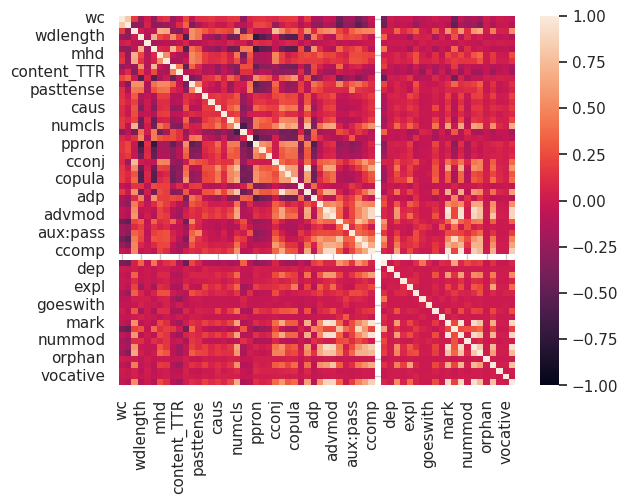

In [136]:
corr = df.select_dtypes('number').corr()
import seaborn as sns
sns.heatmap(corr, vmin=-1, vmax=1)


#Distribution of features

## distribution of features by L2 & TR

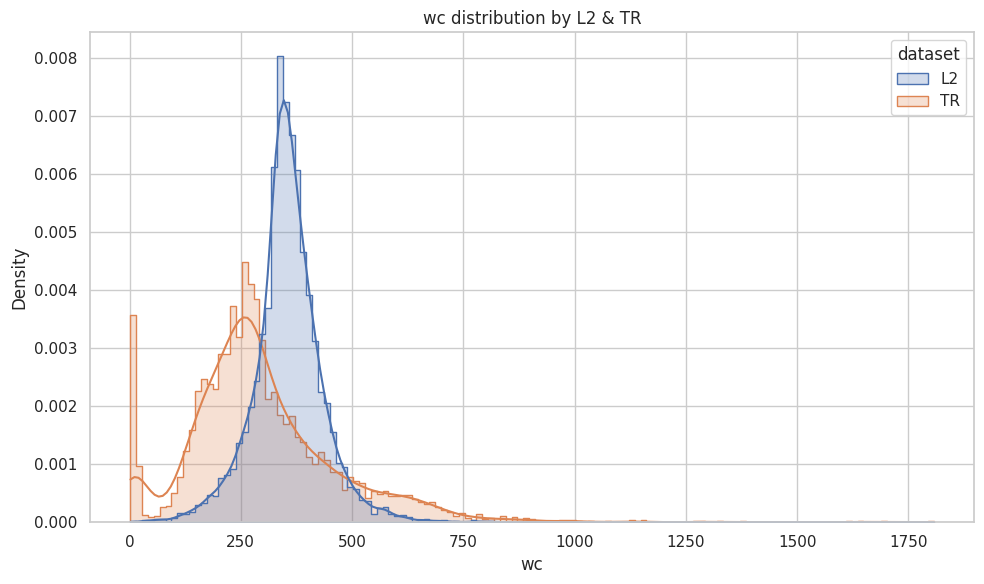

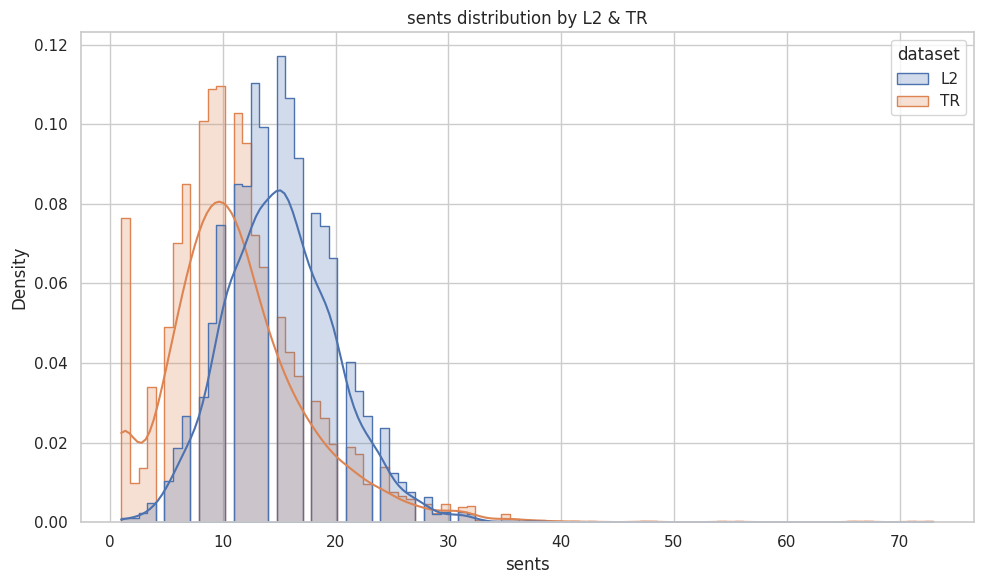

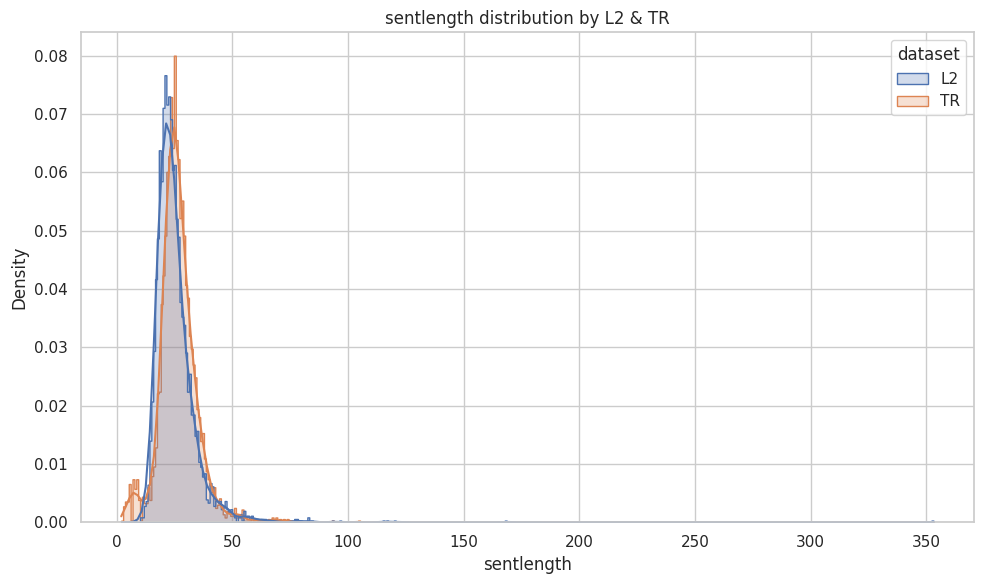

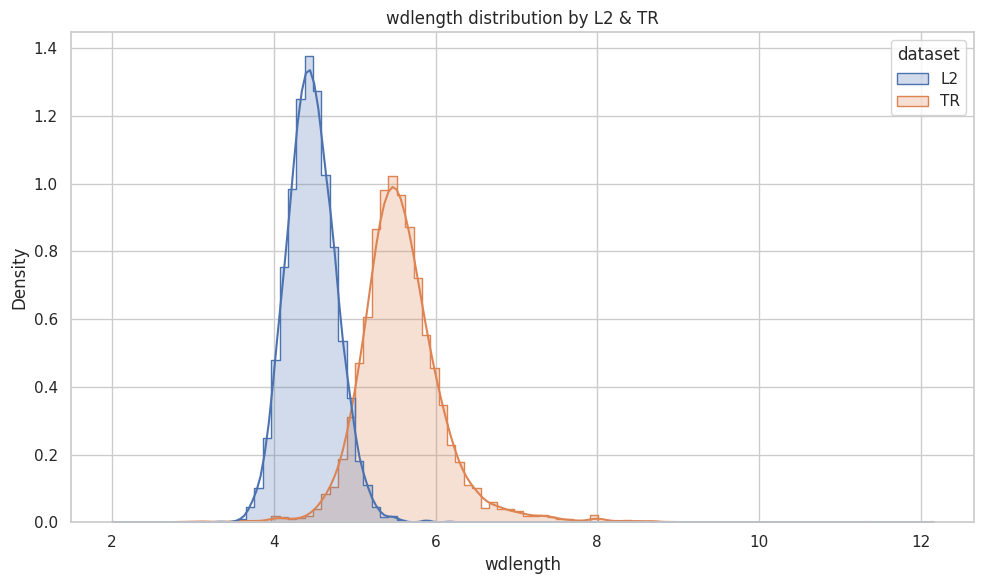

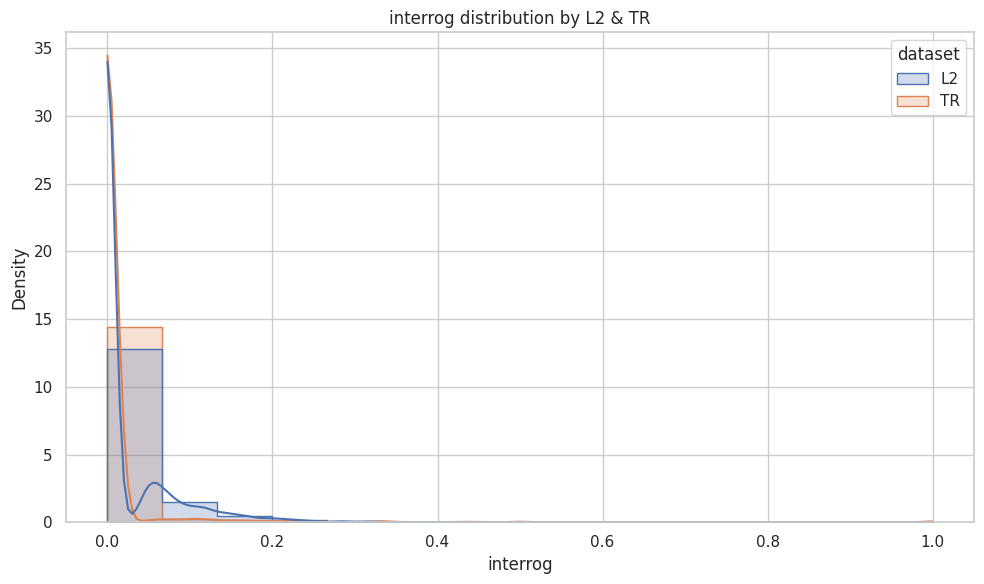

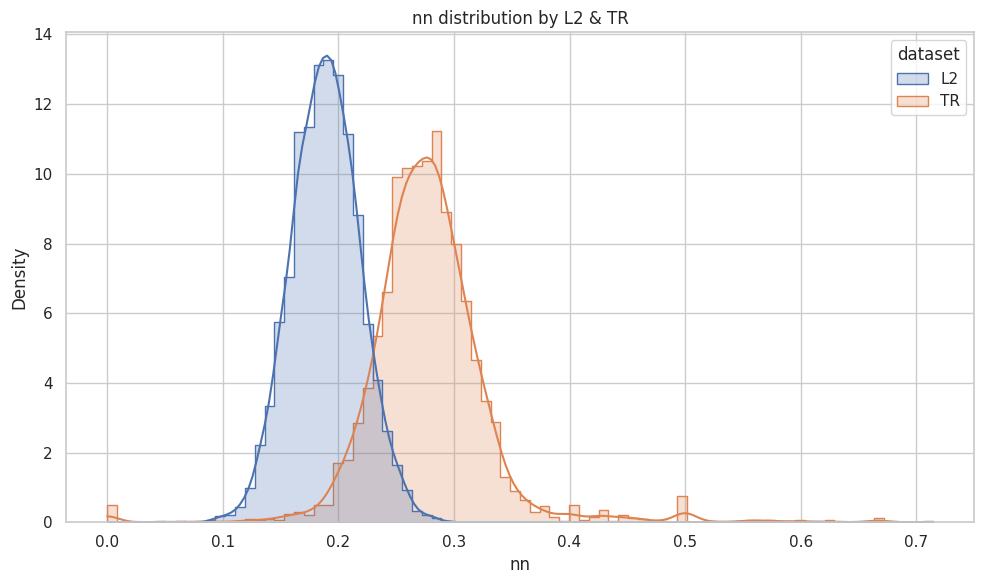

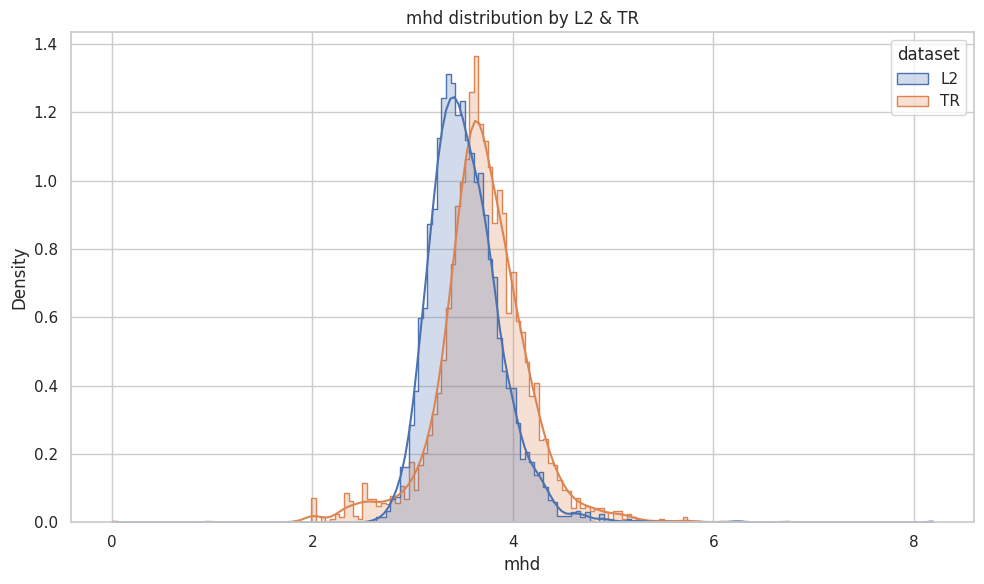

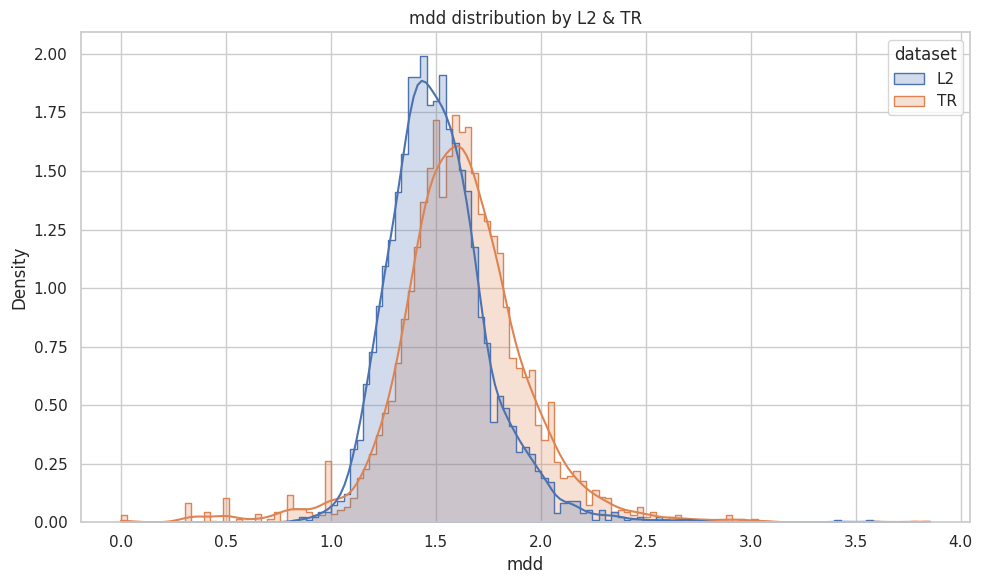

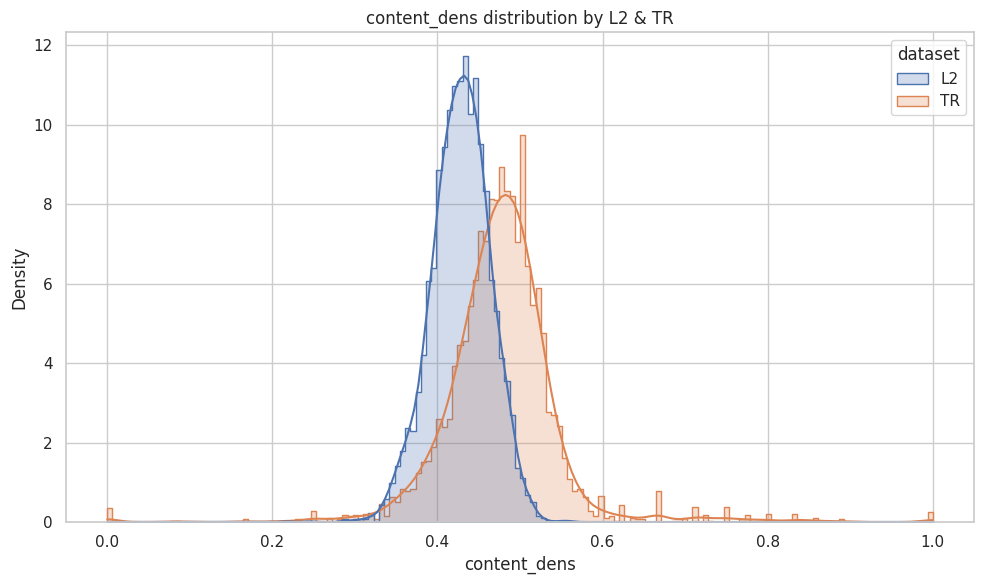

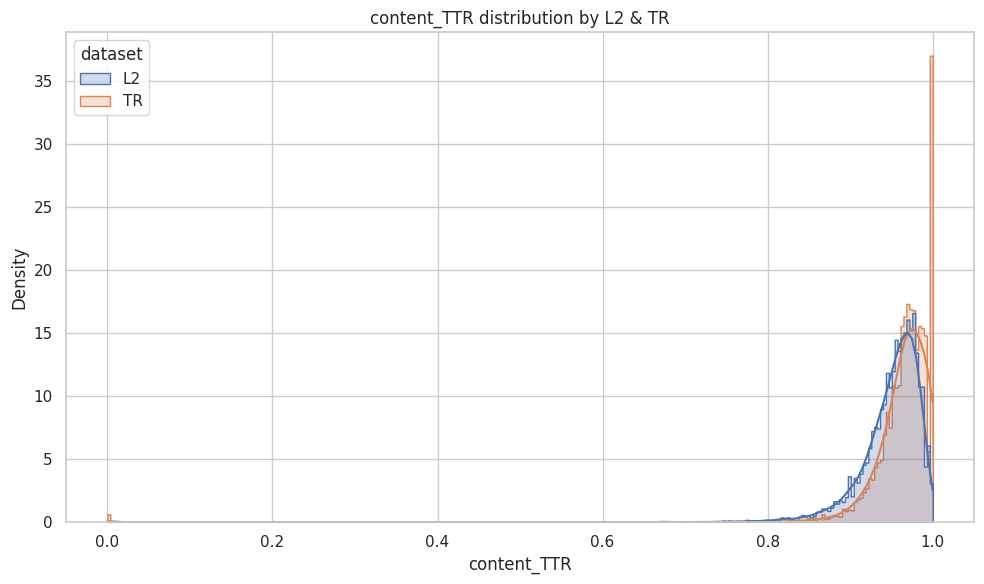

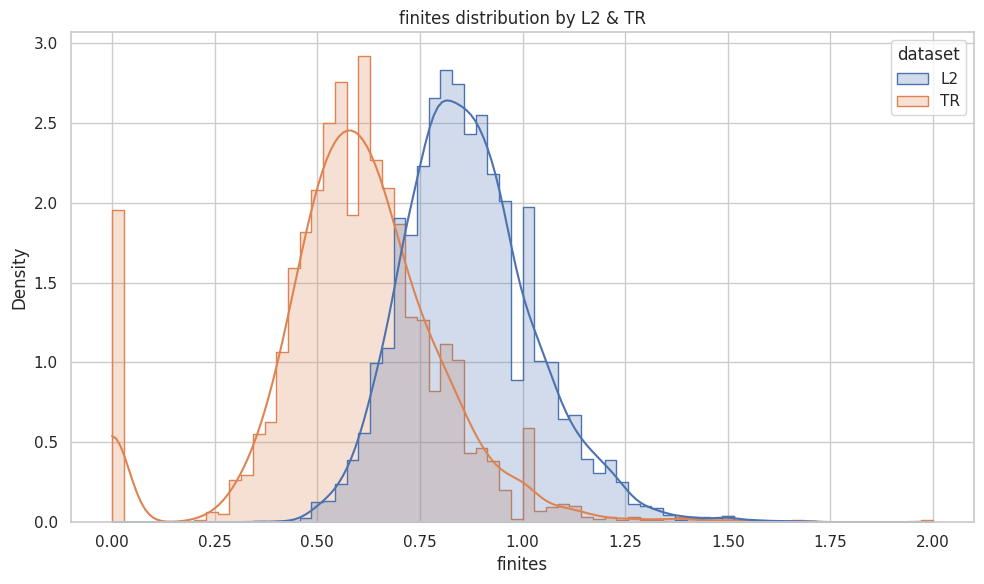

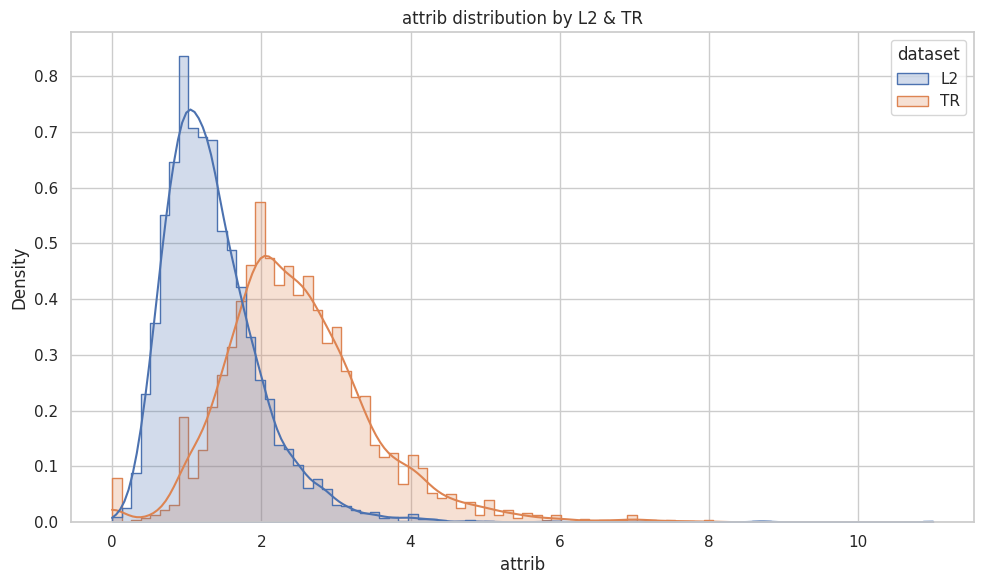

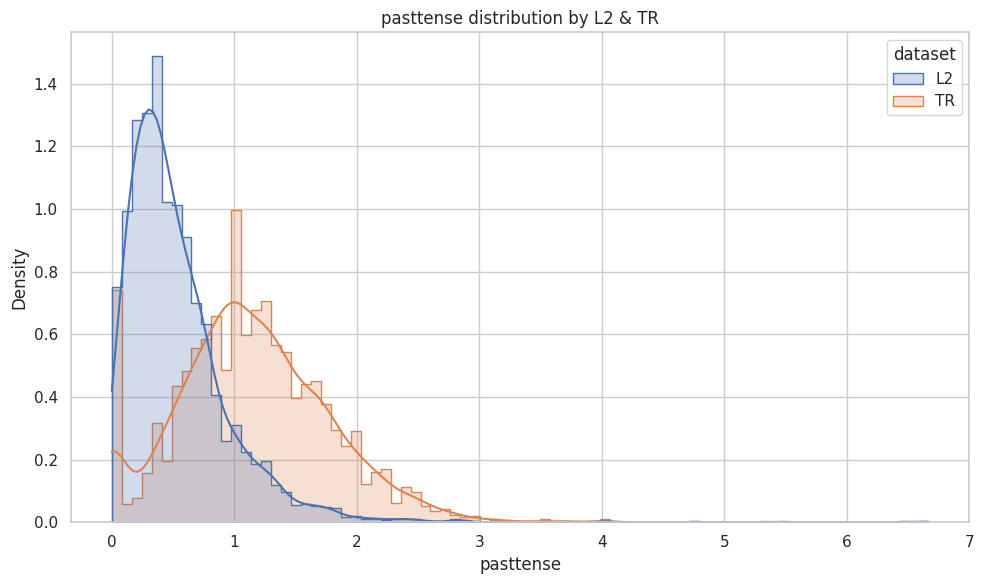

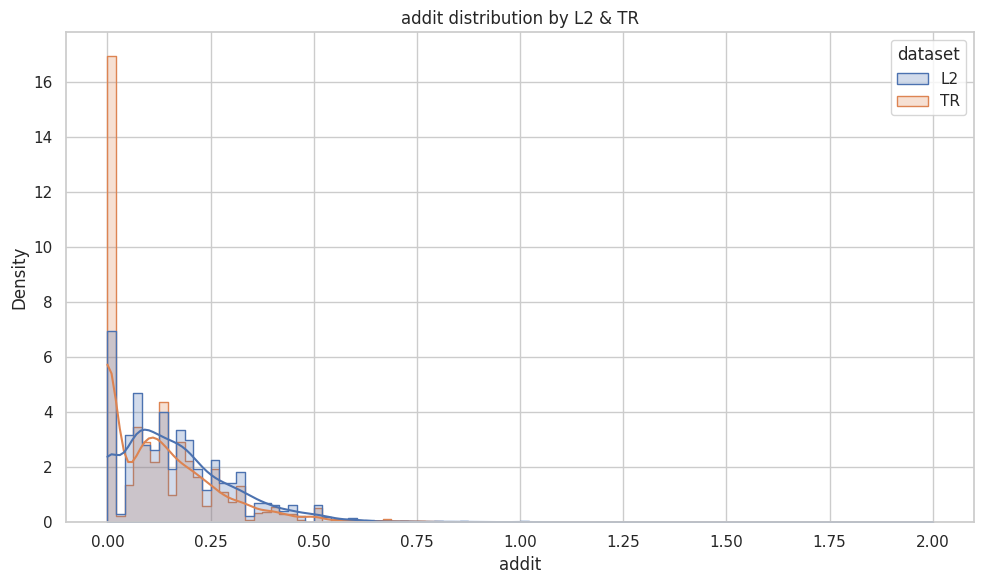

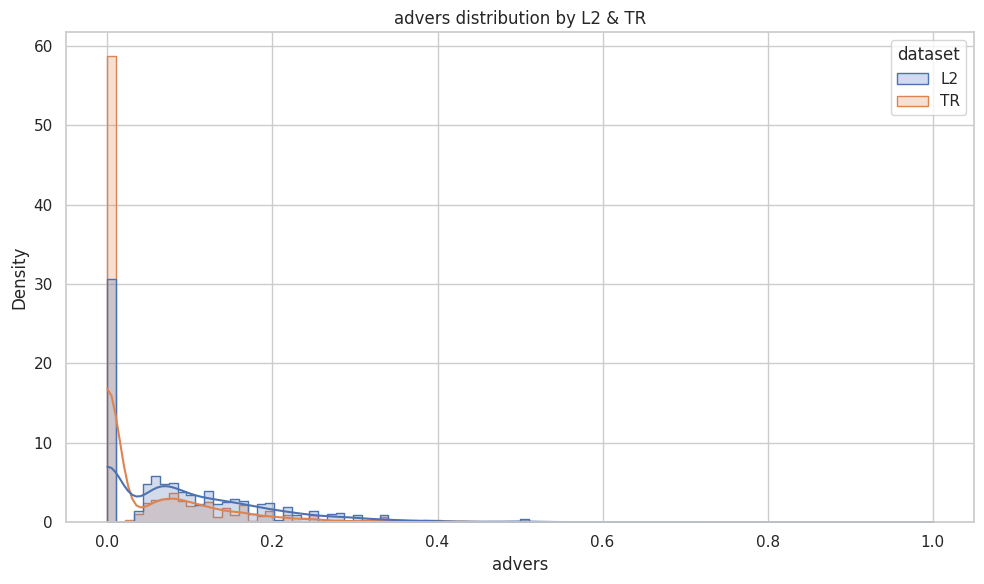

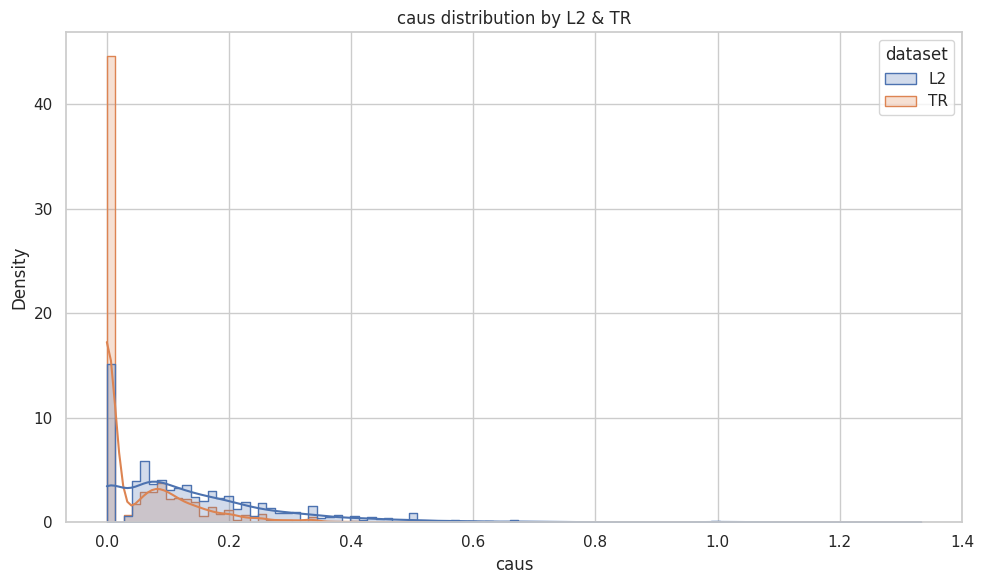

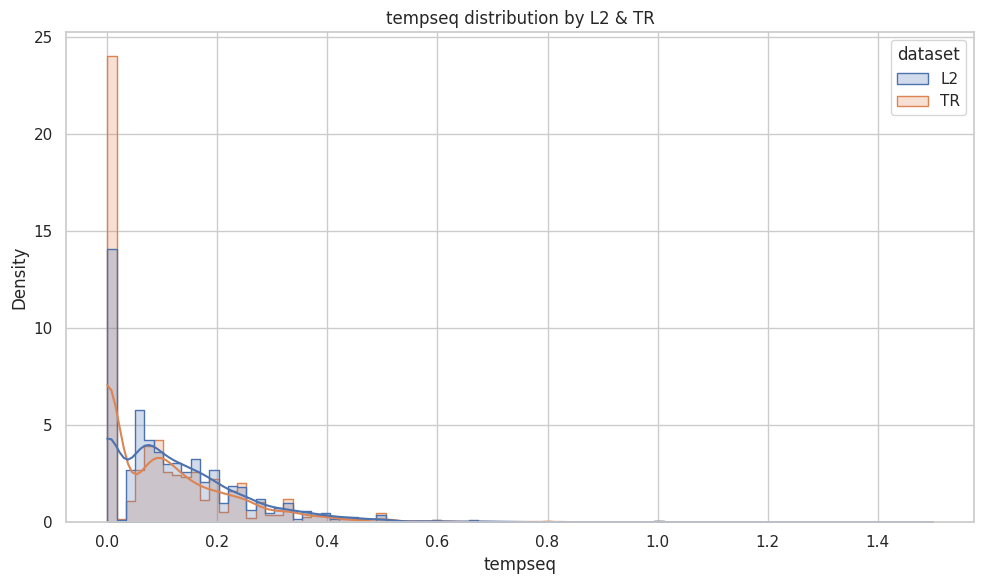

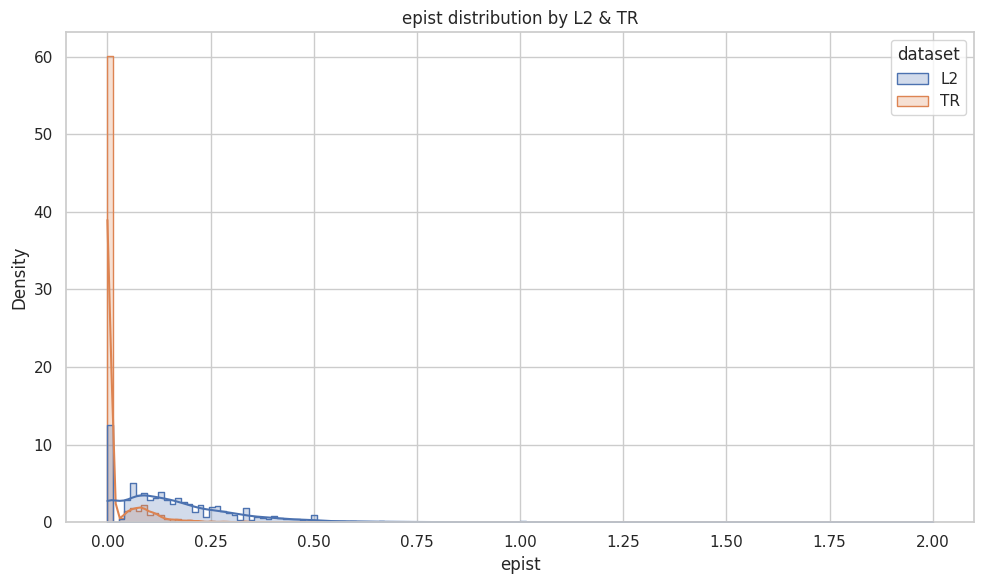

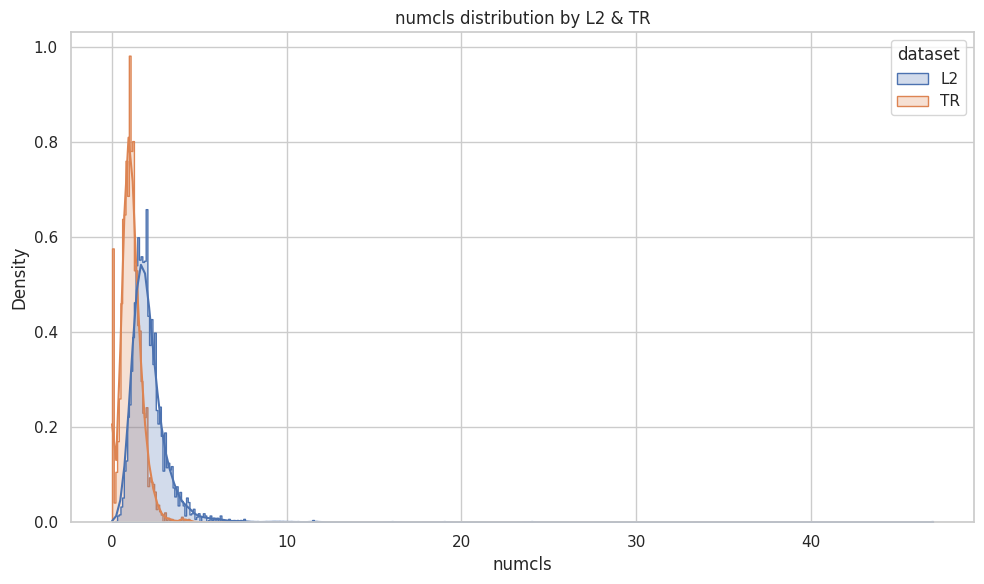

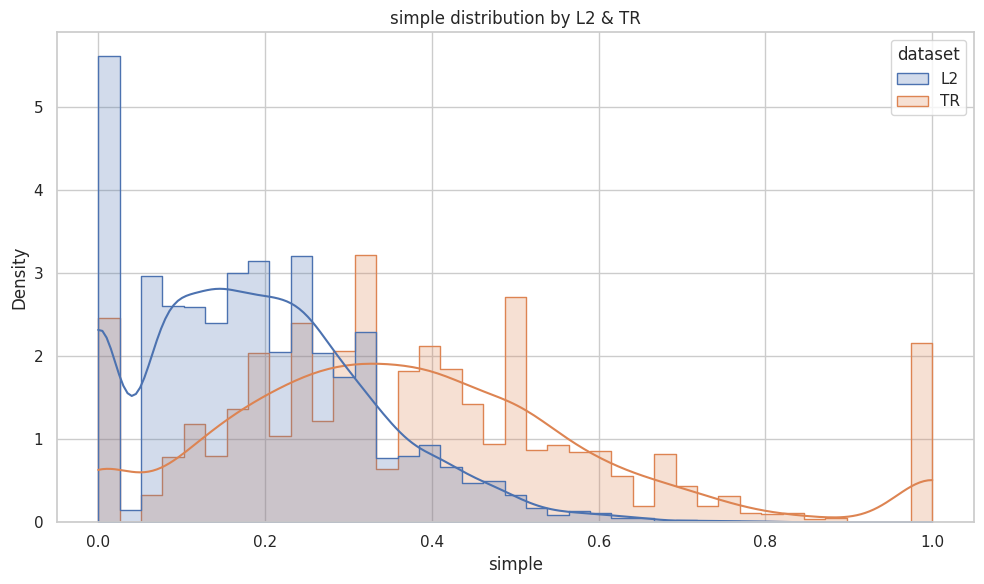

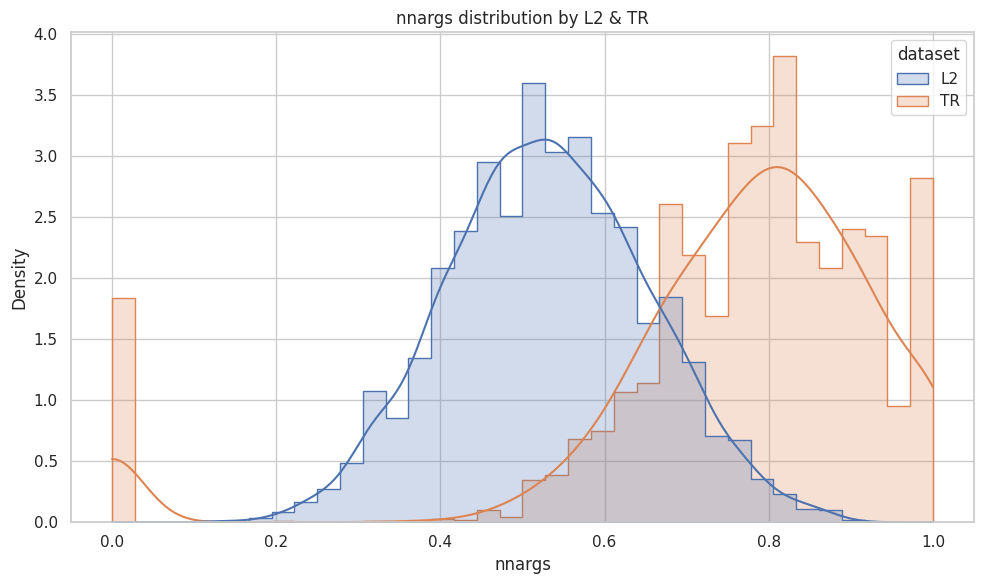

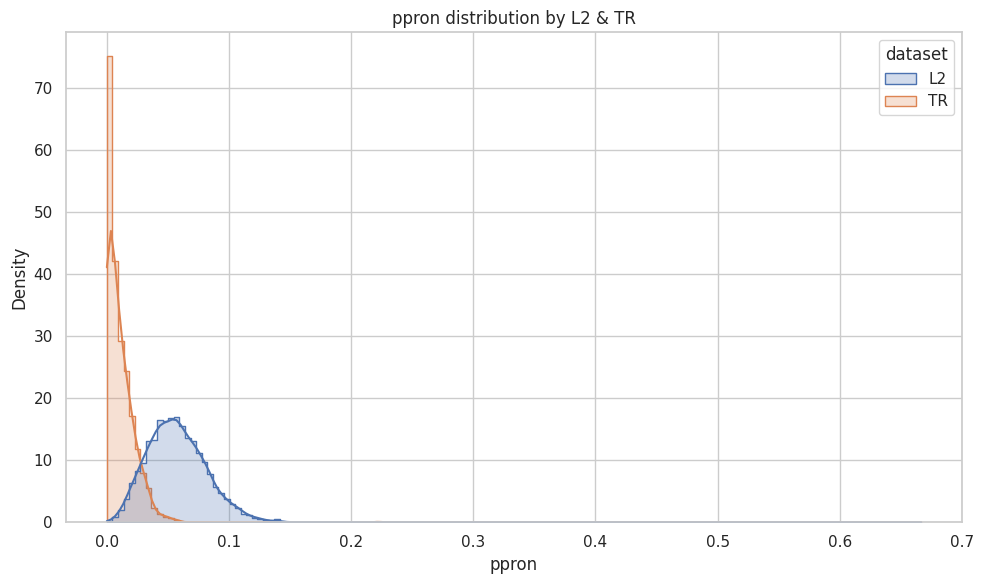

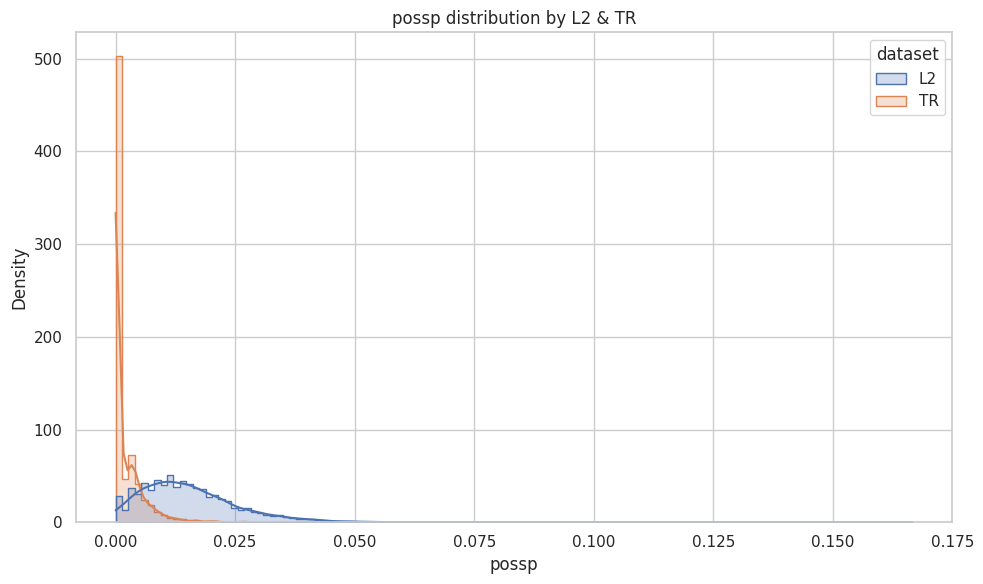

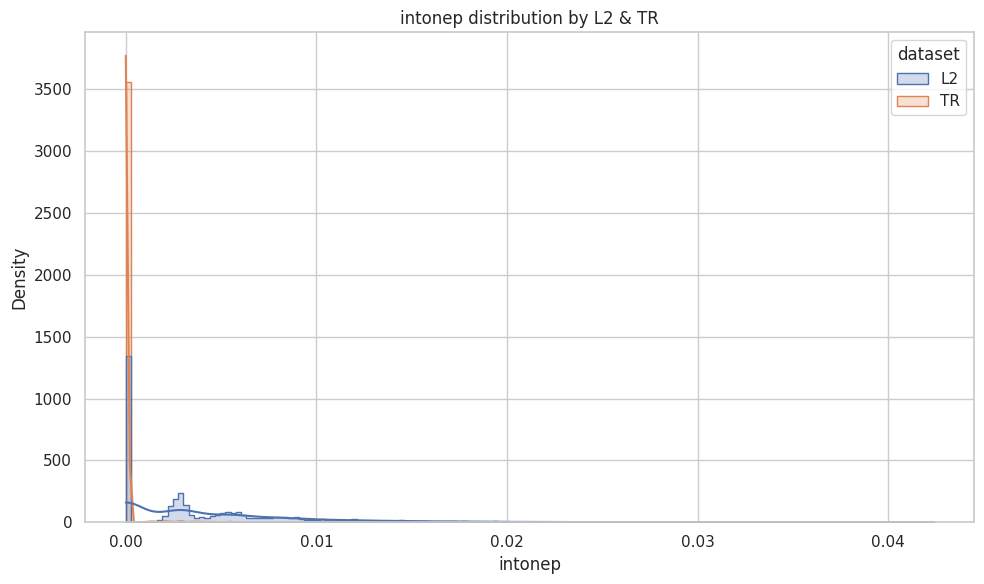

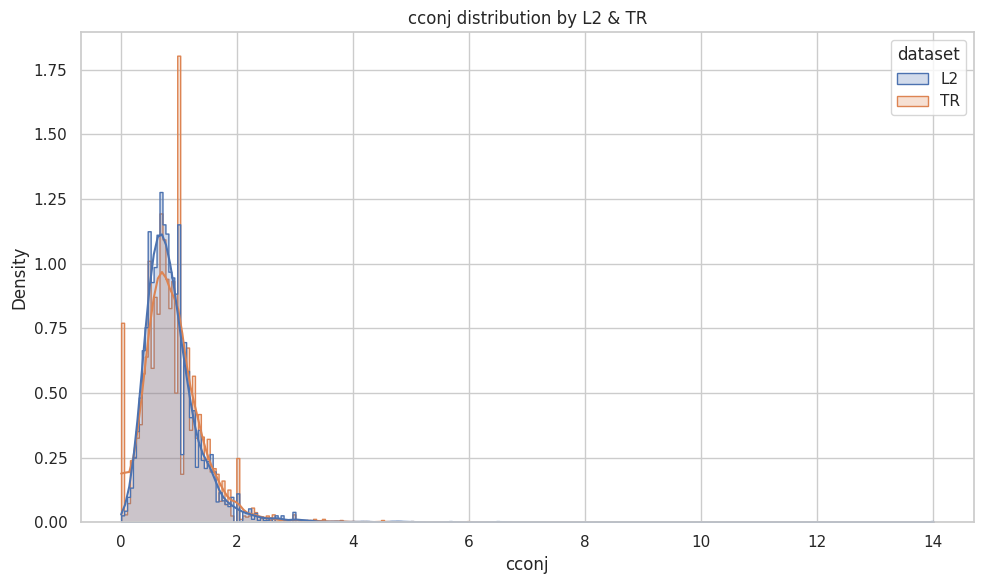

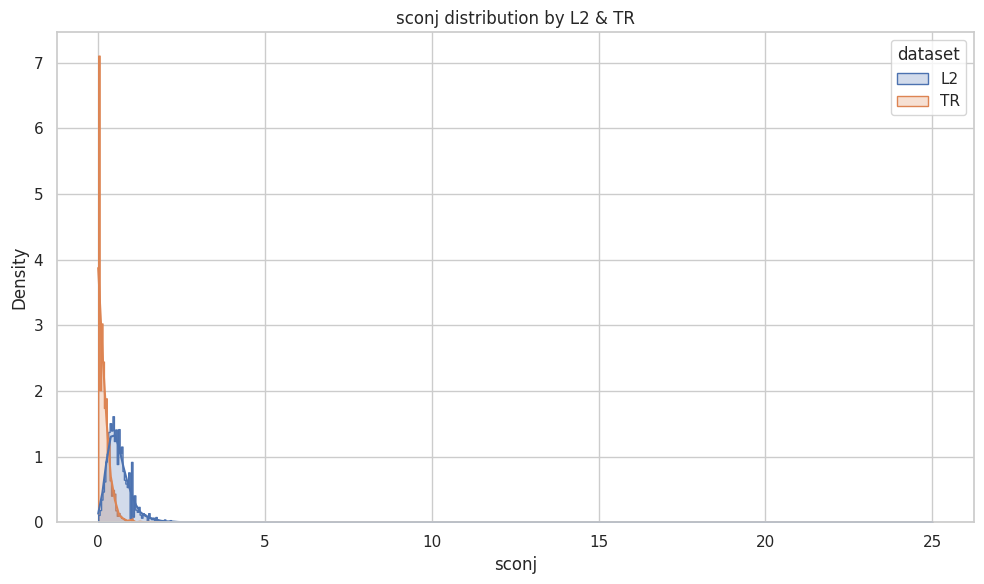

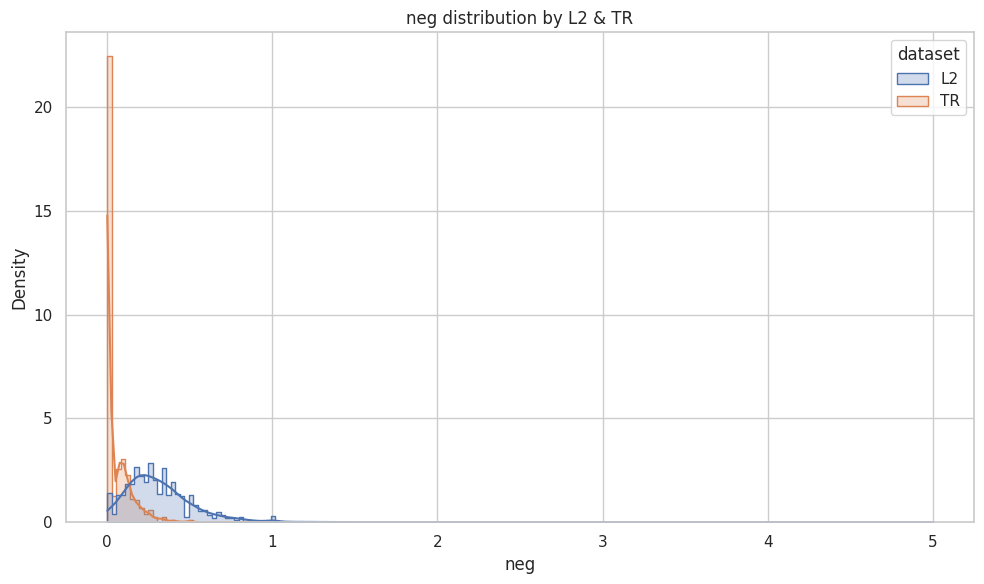

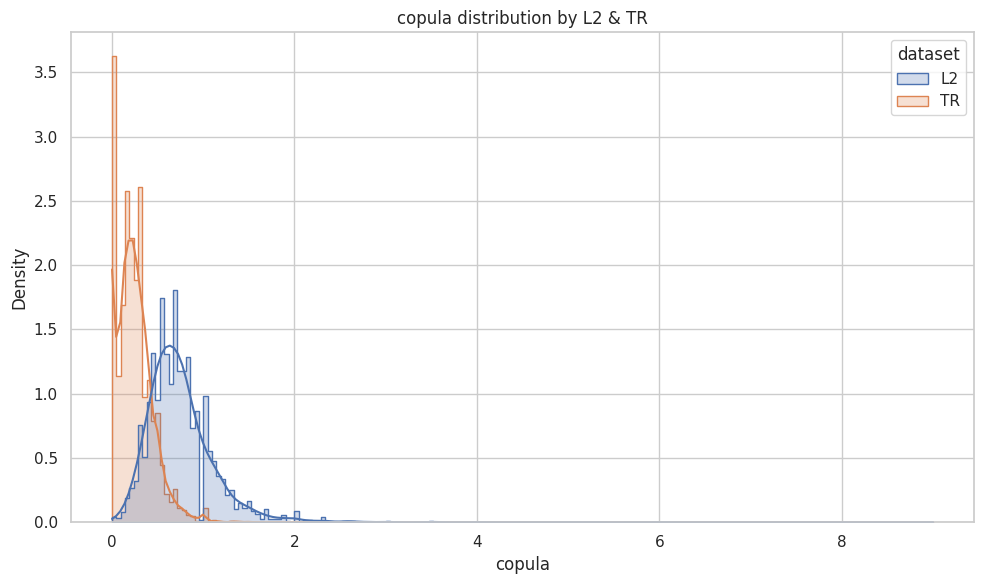

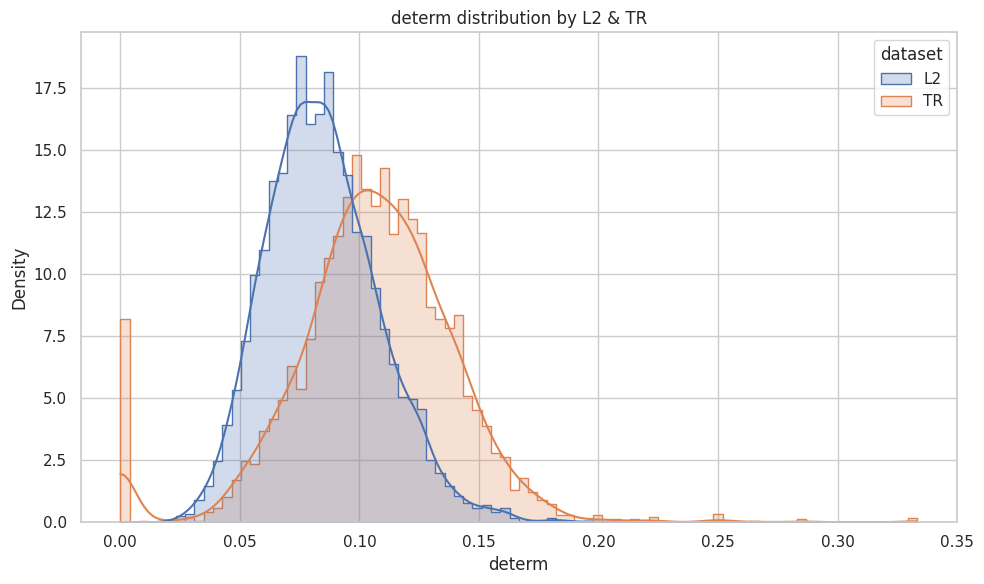

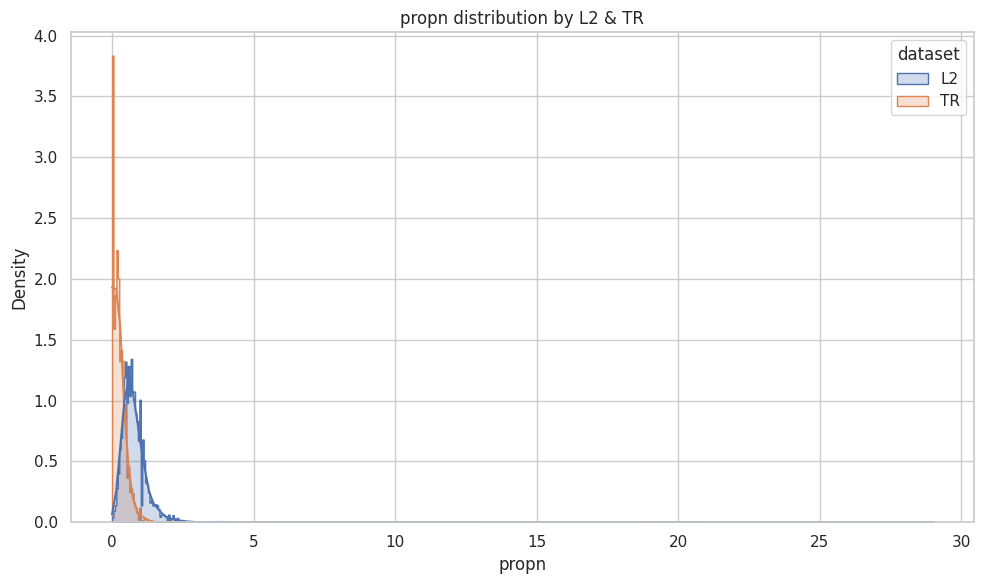

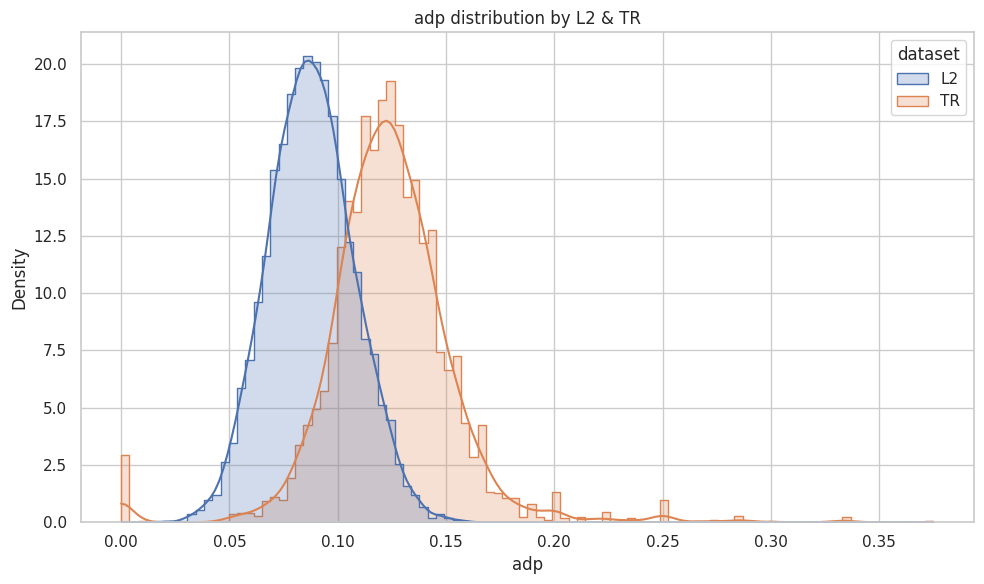

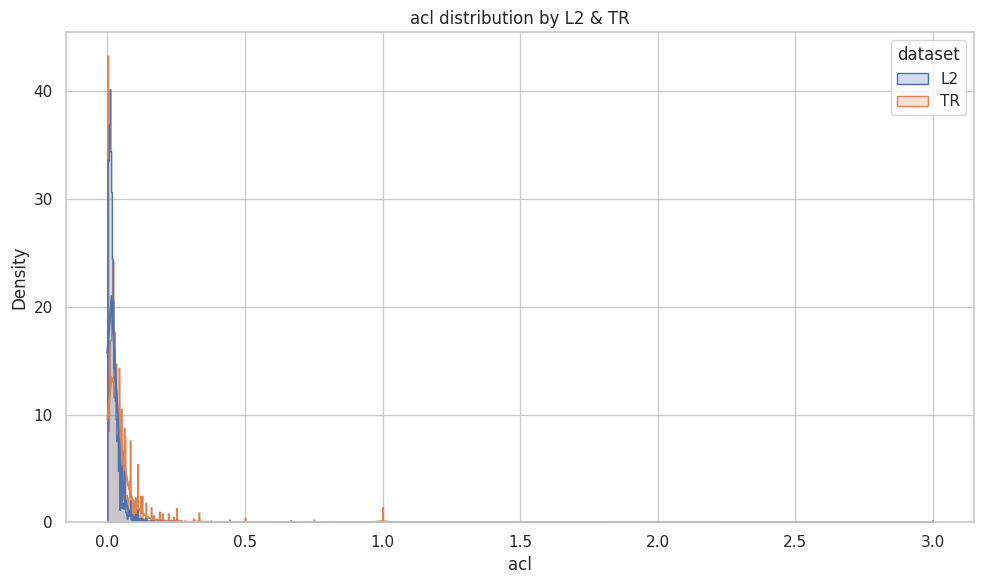

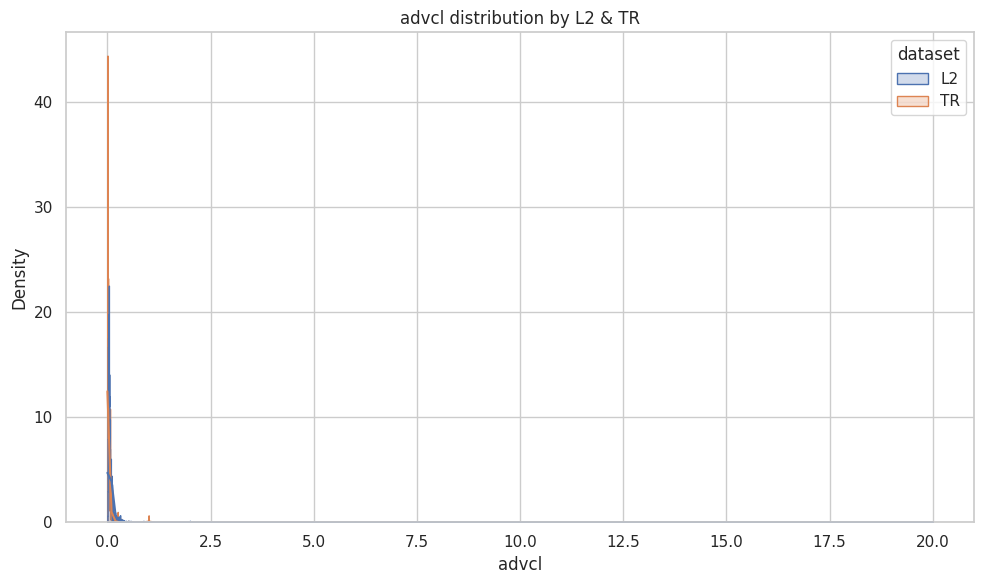

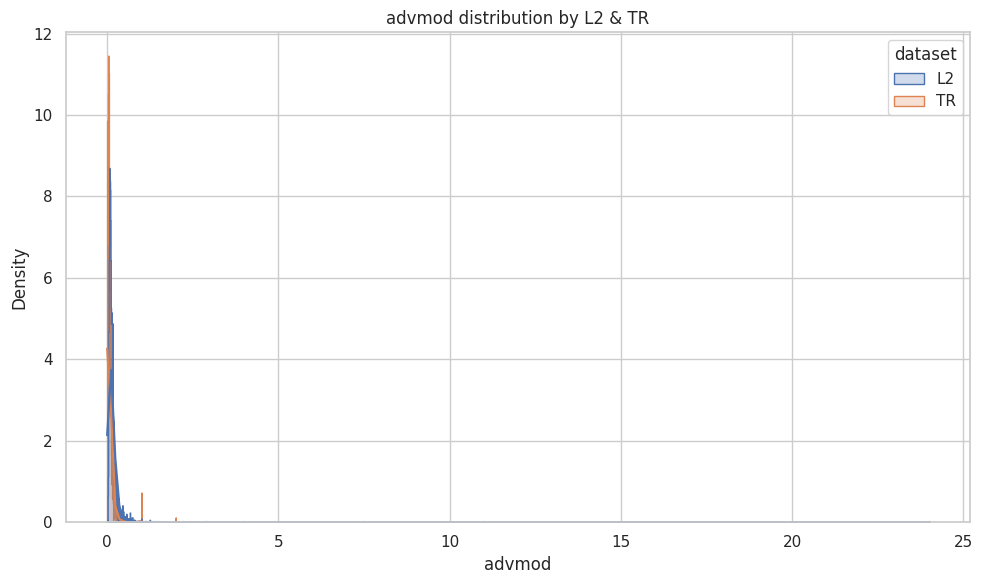

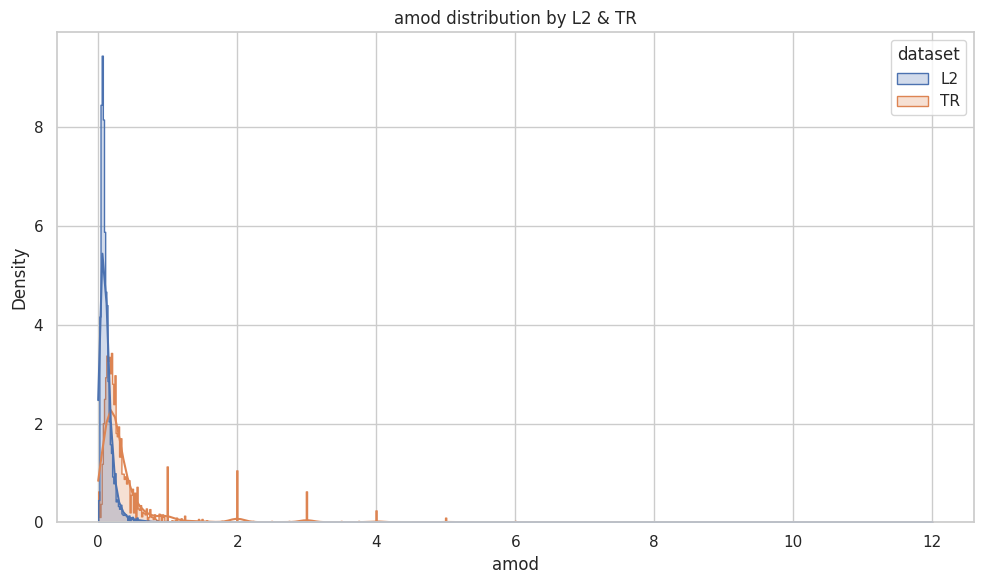

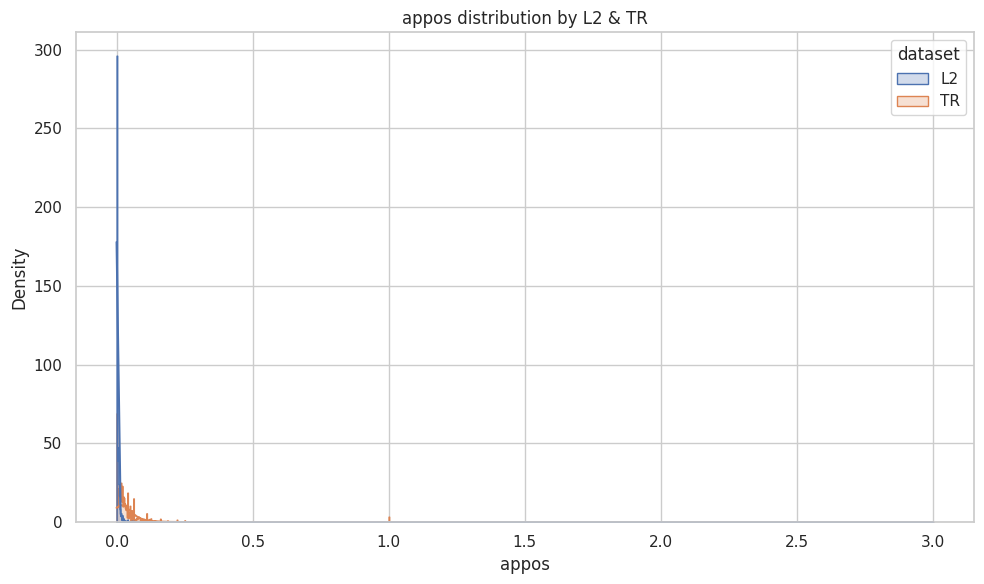

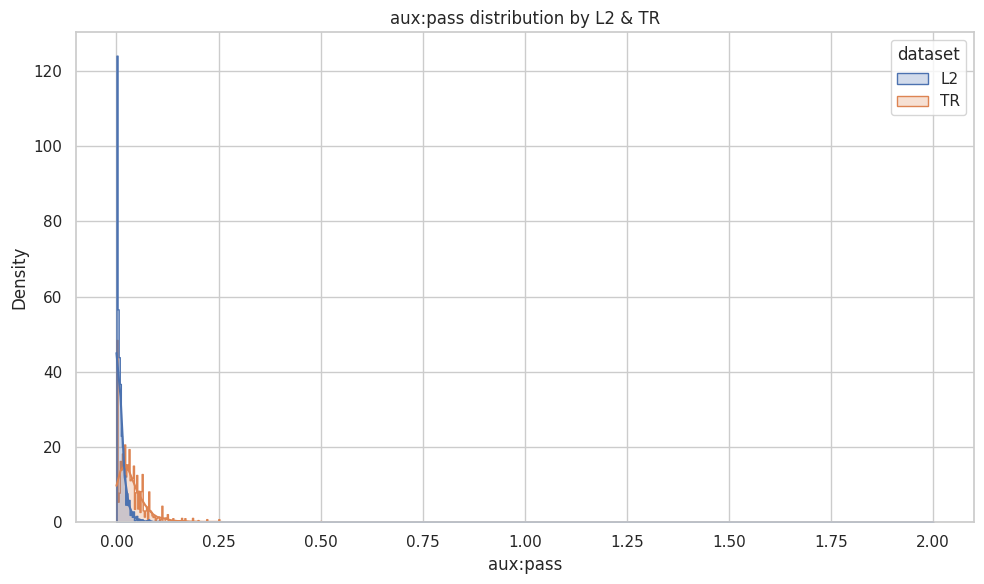

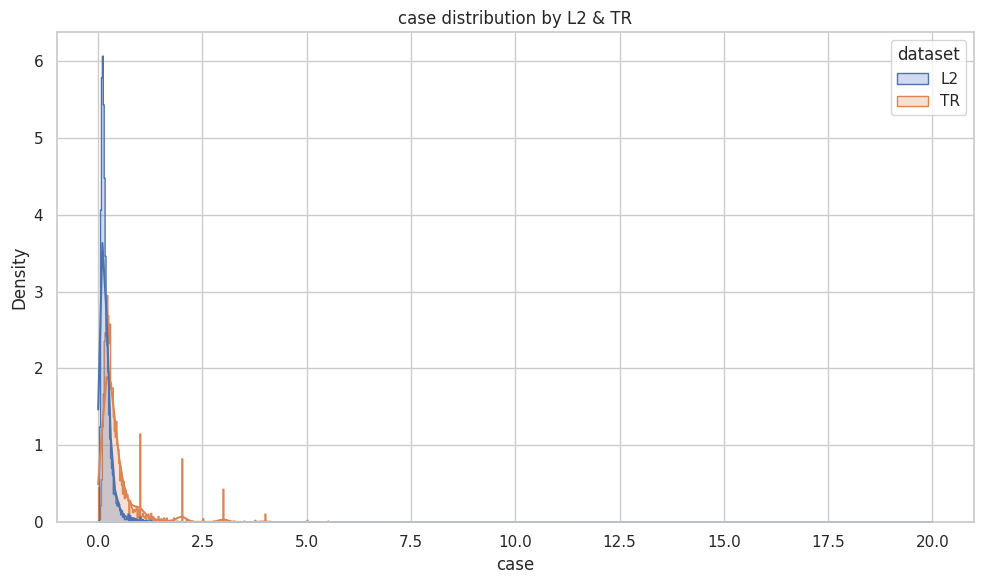

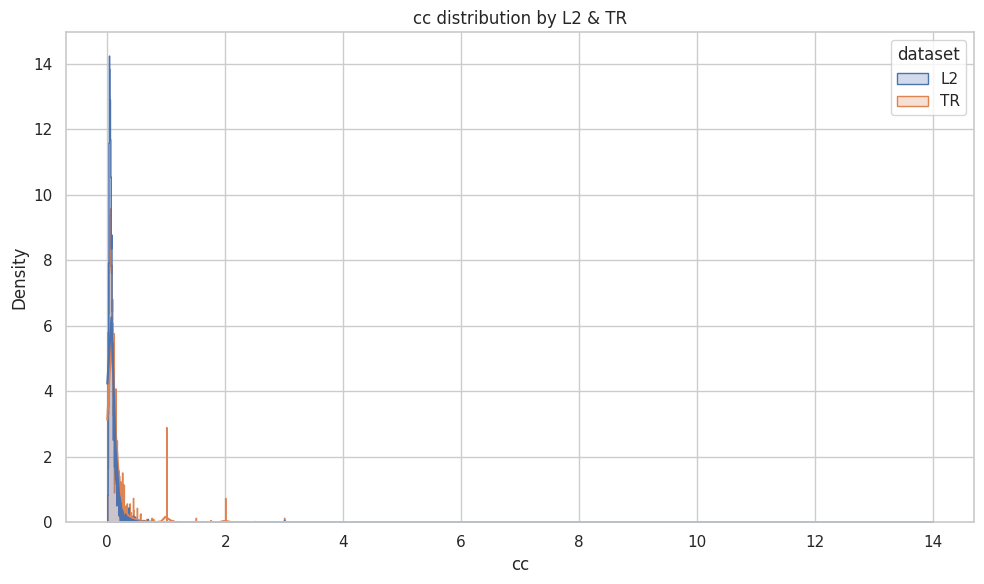

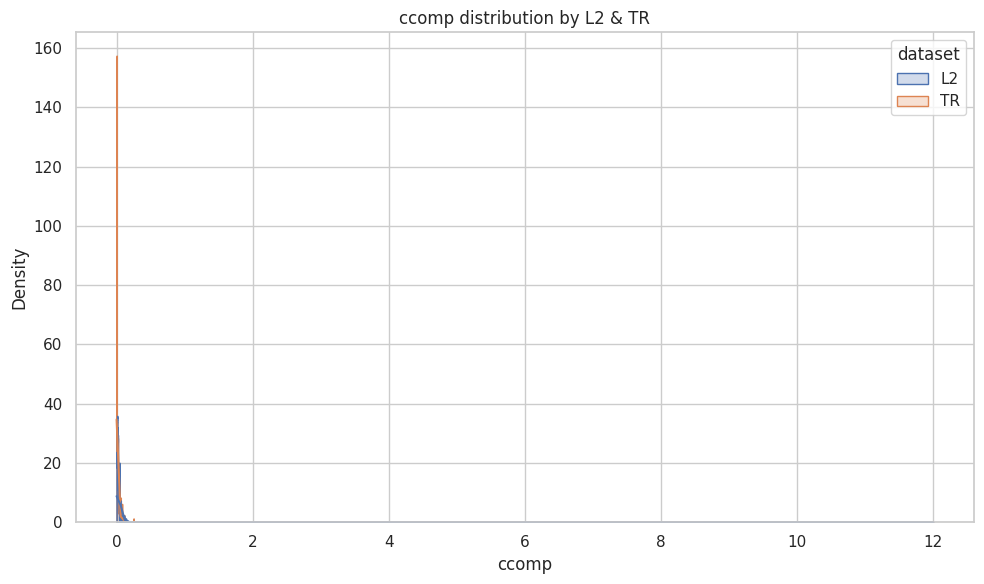

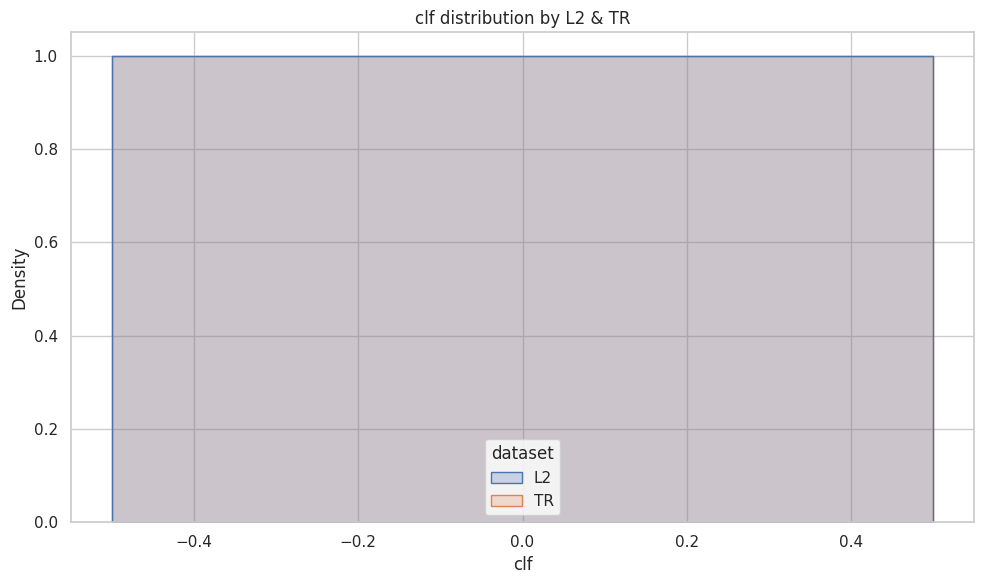

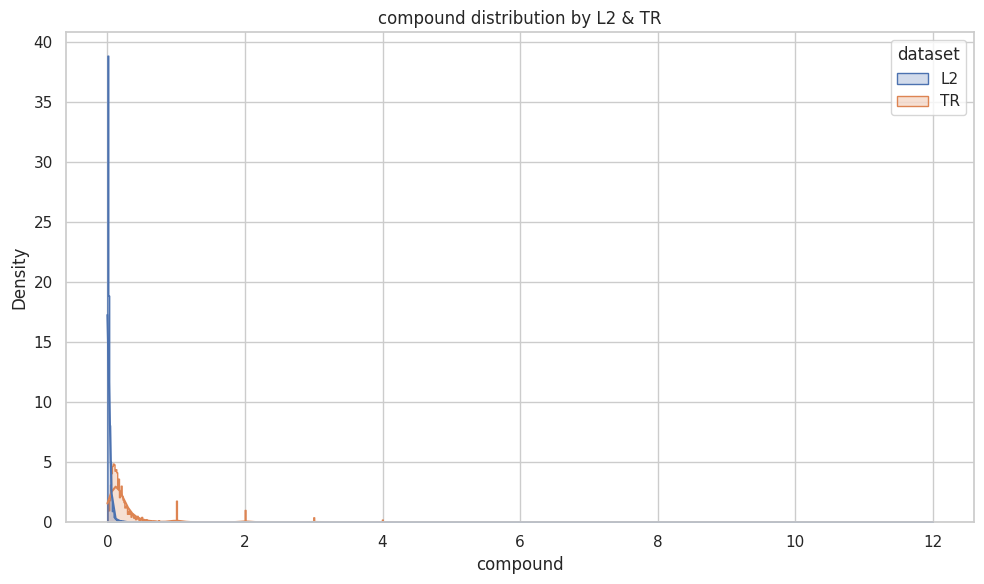

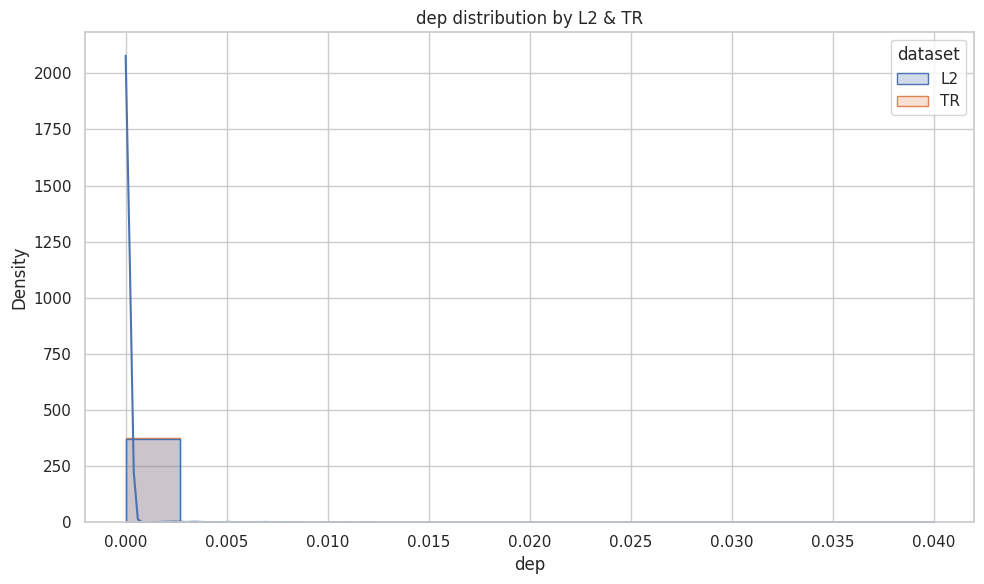

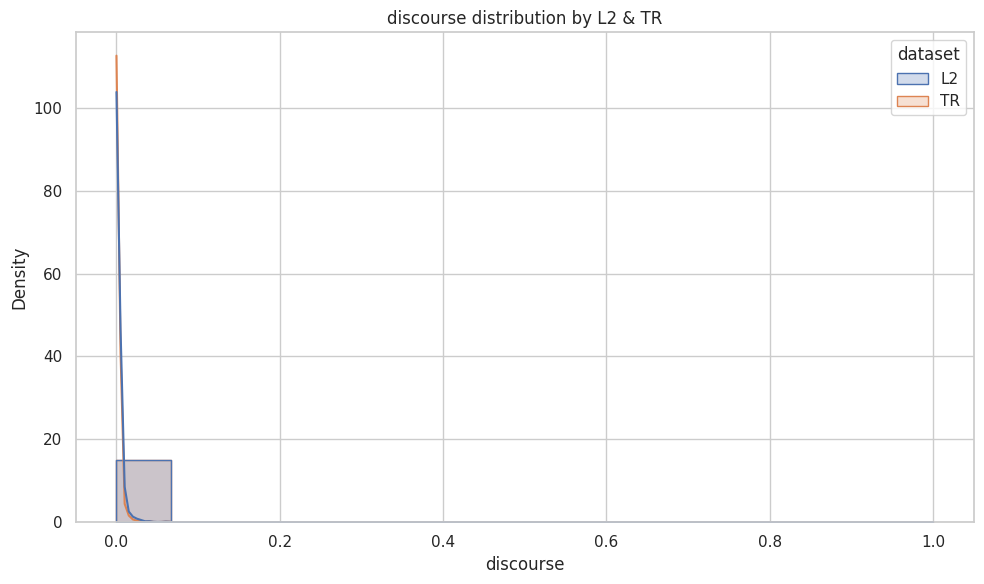

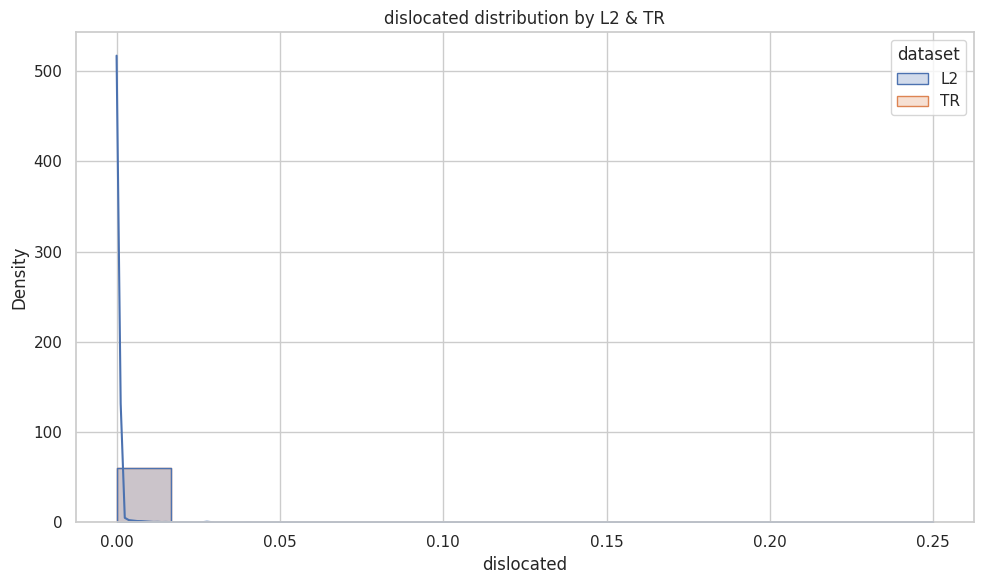

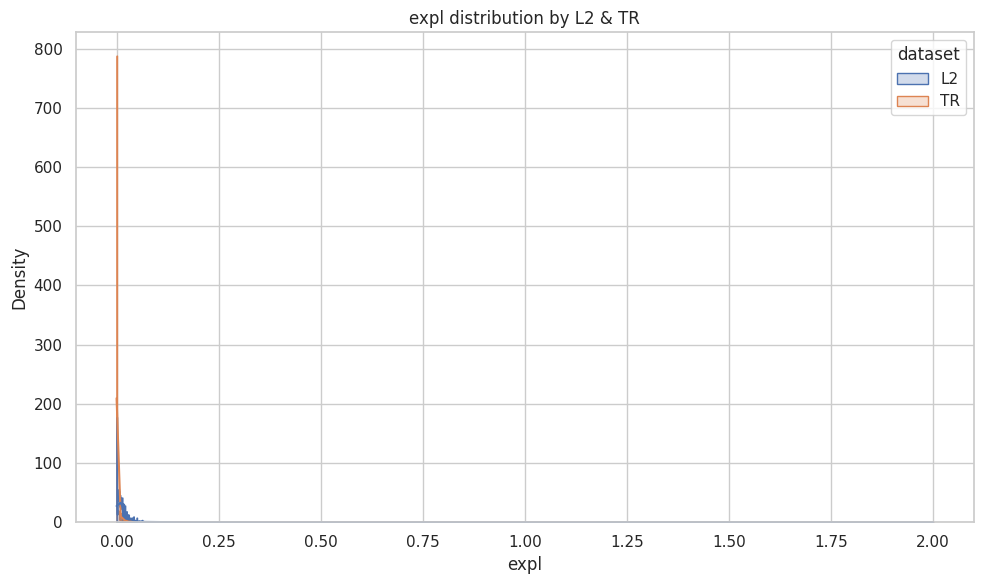

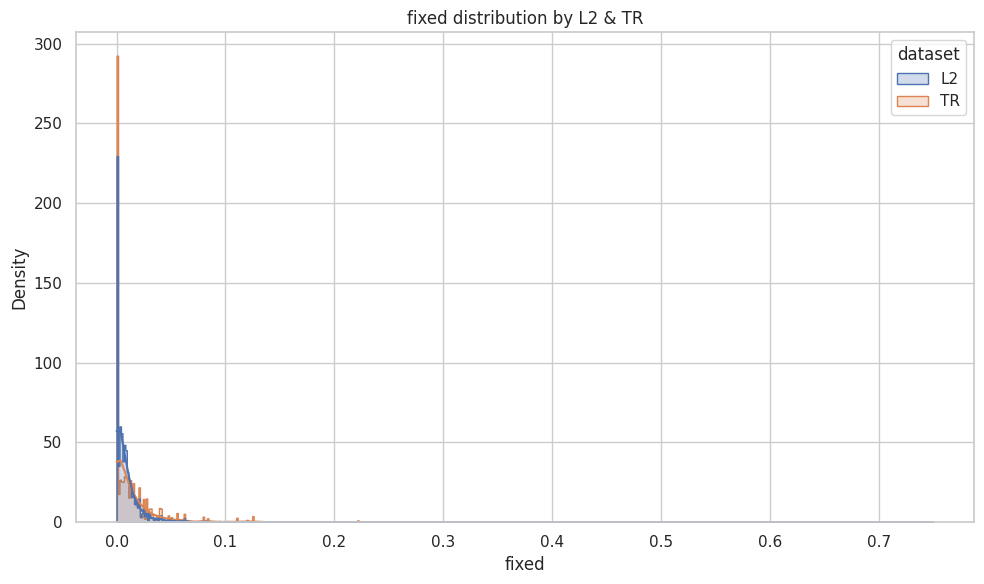

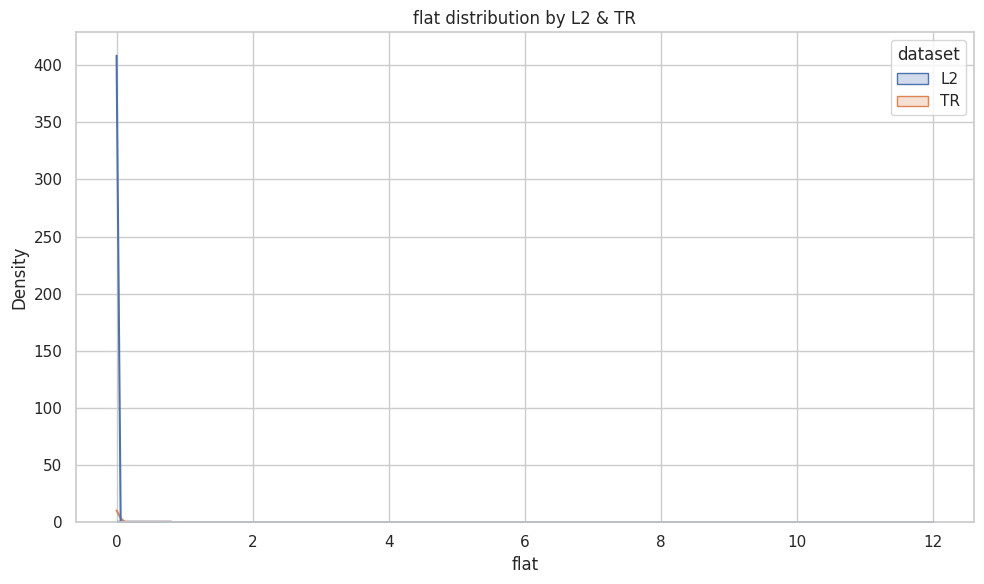

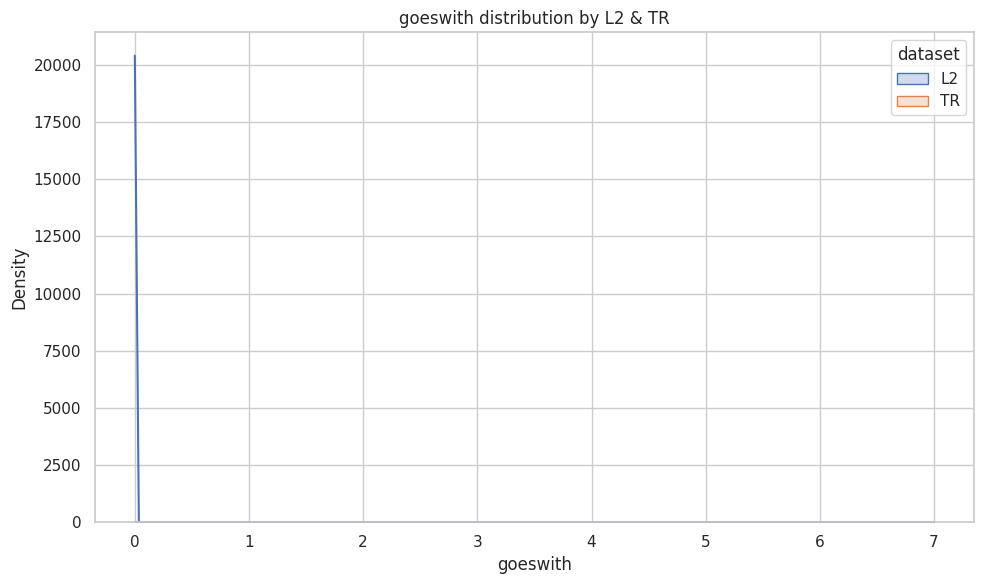

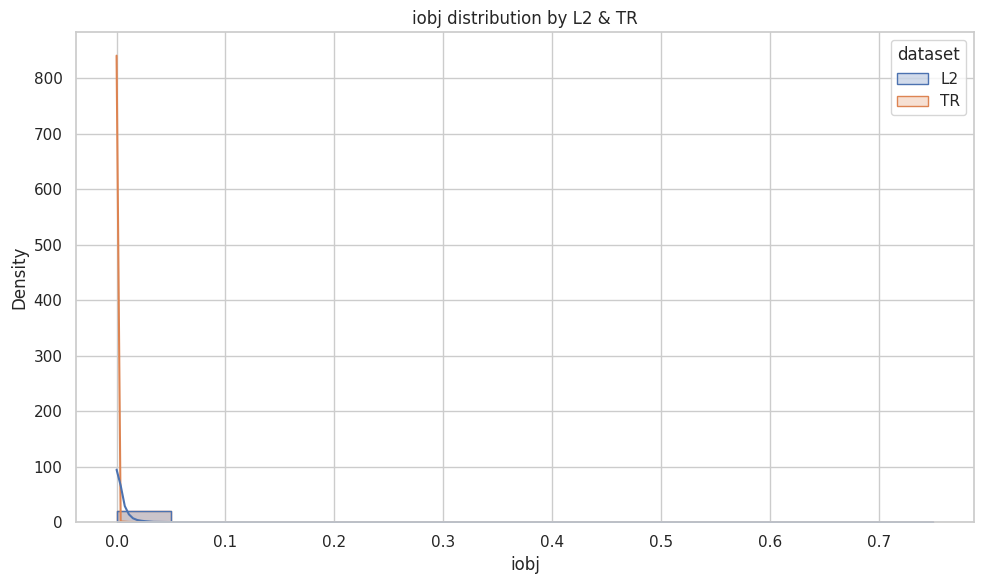

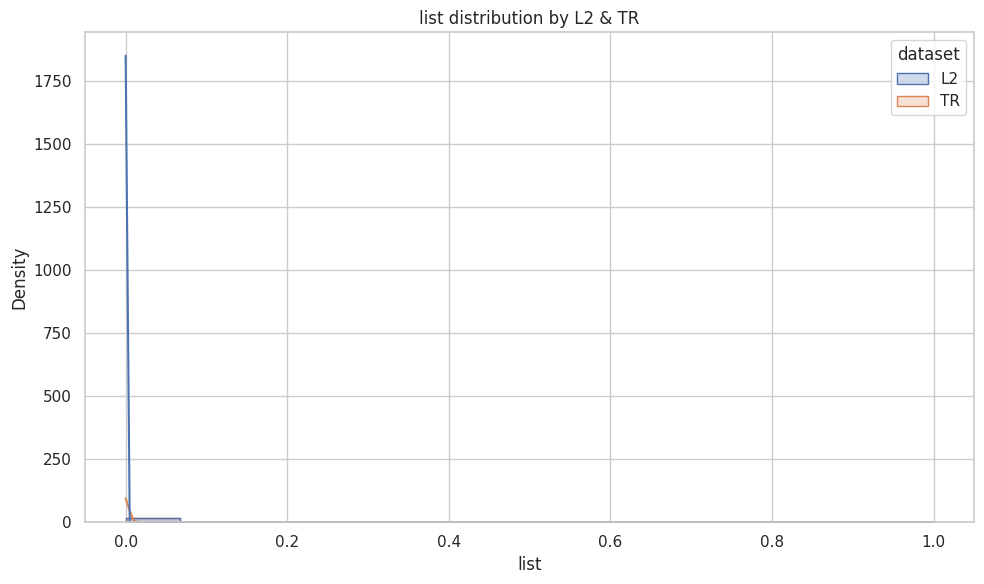

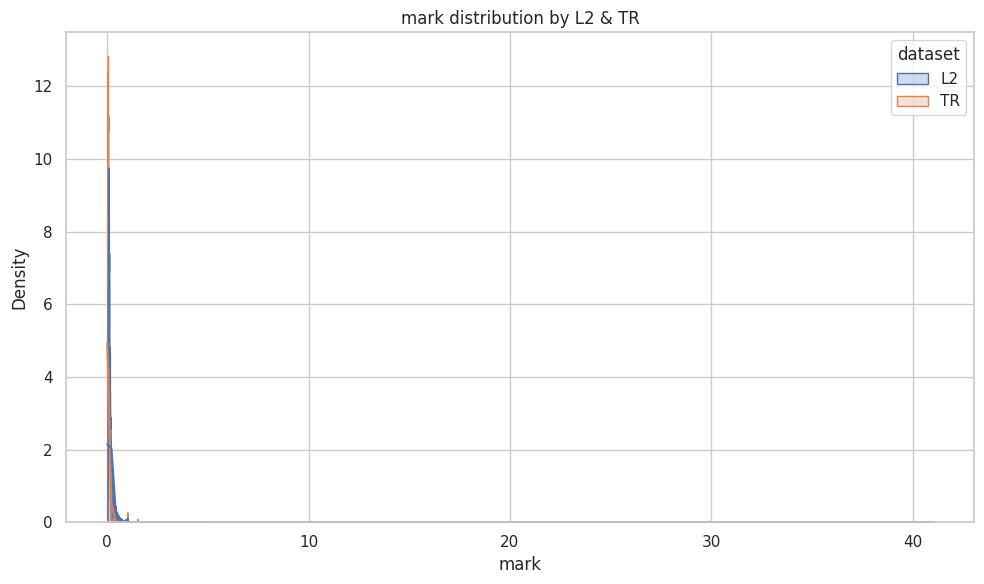

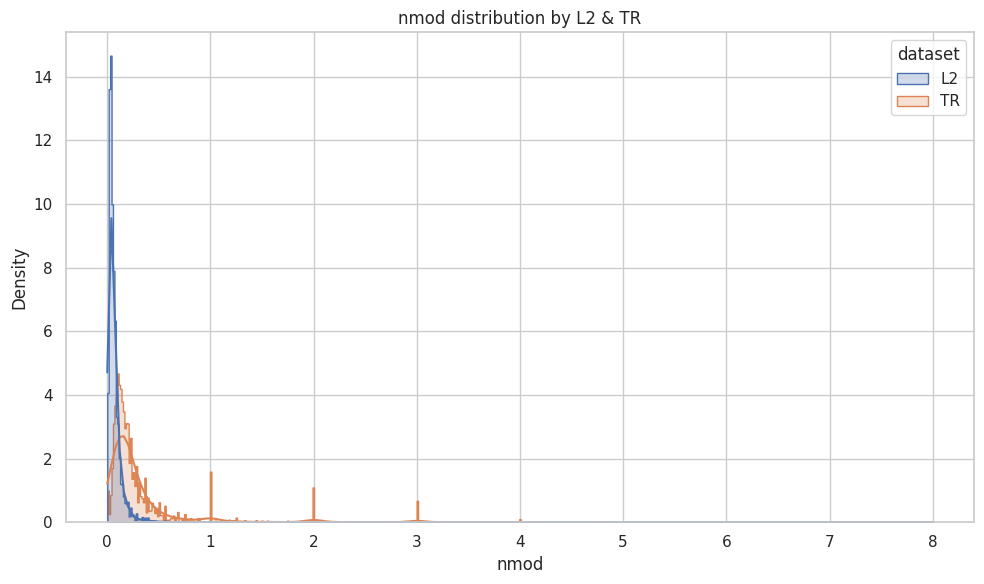

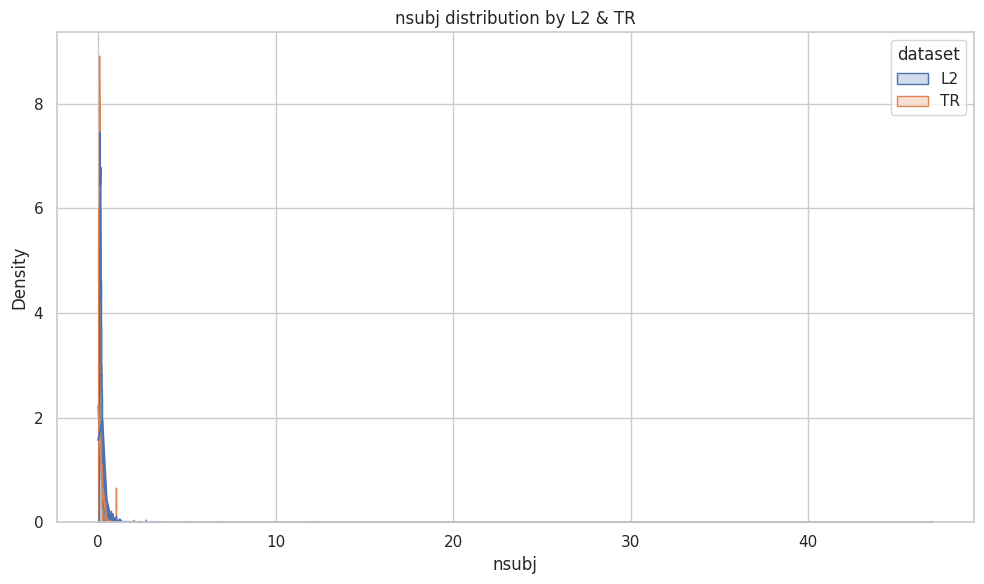

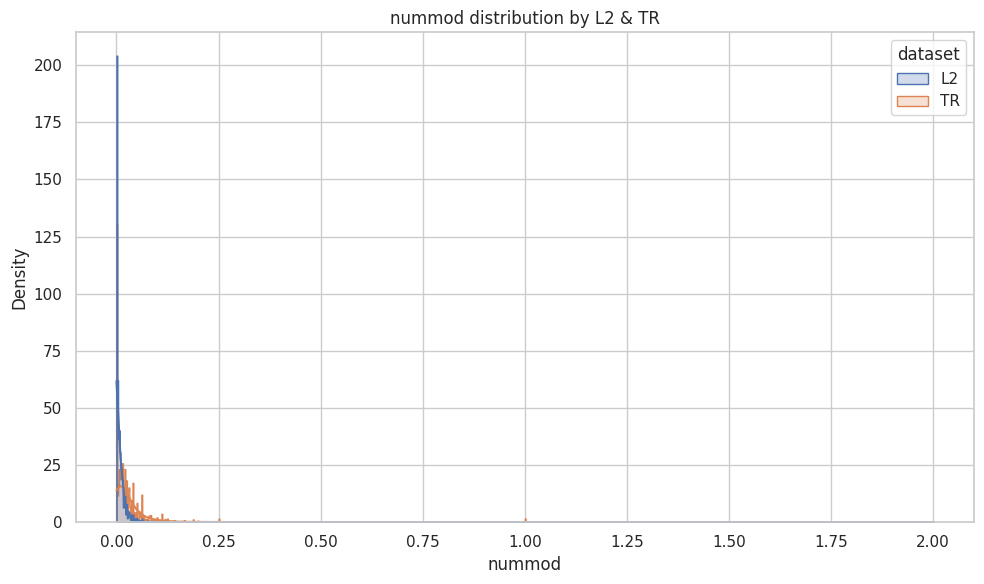

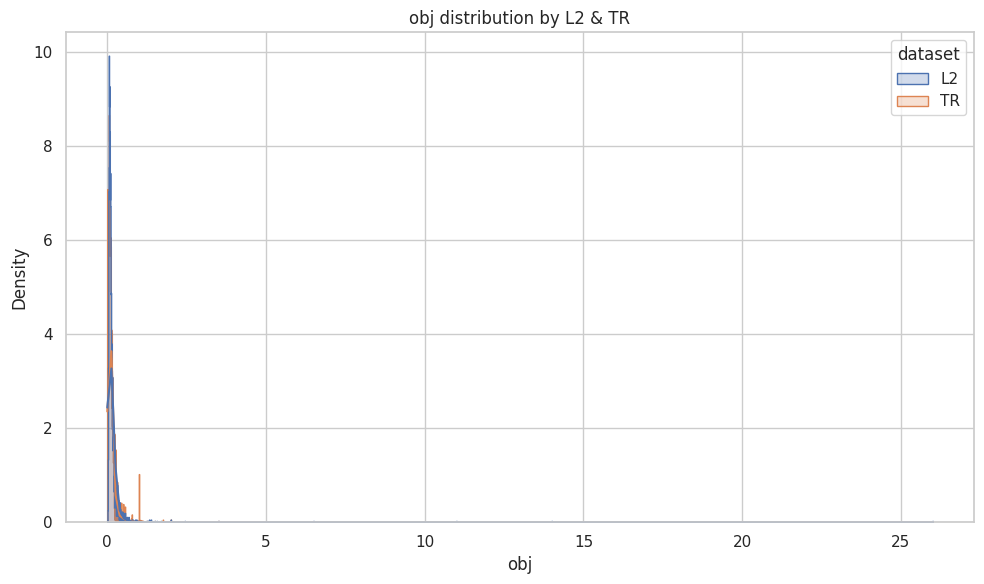

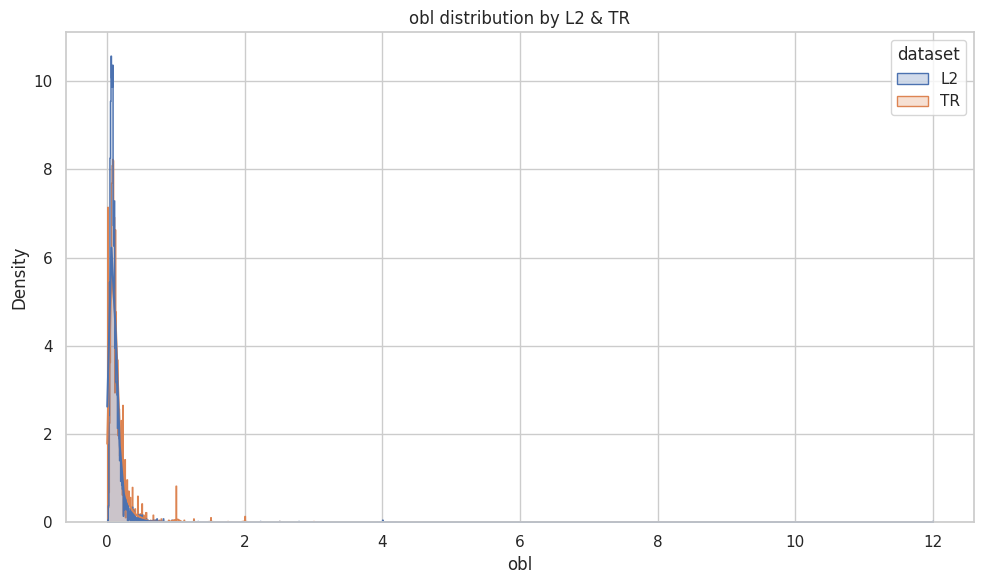

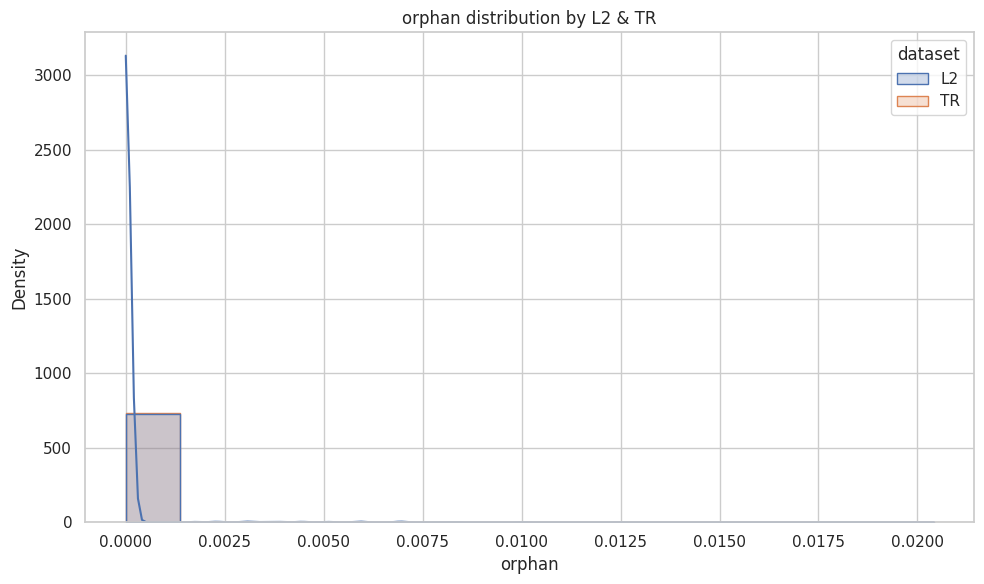

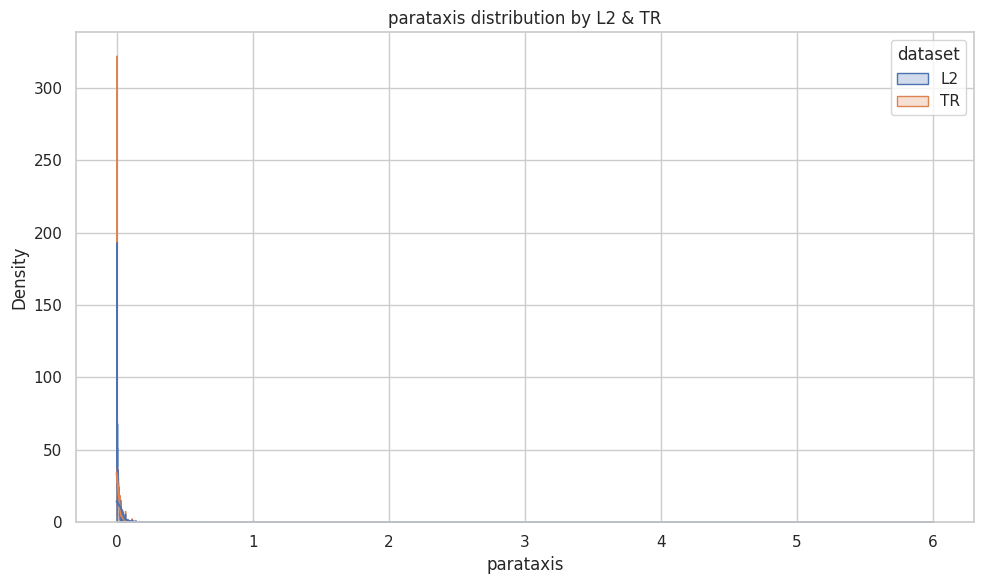

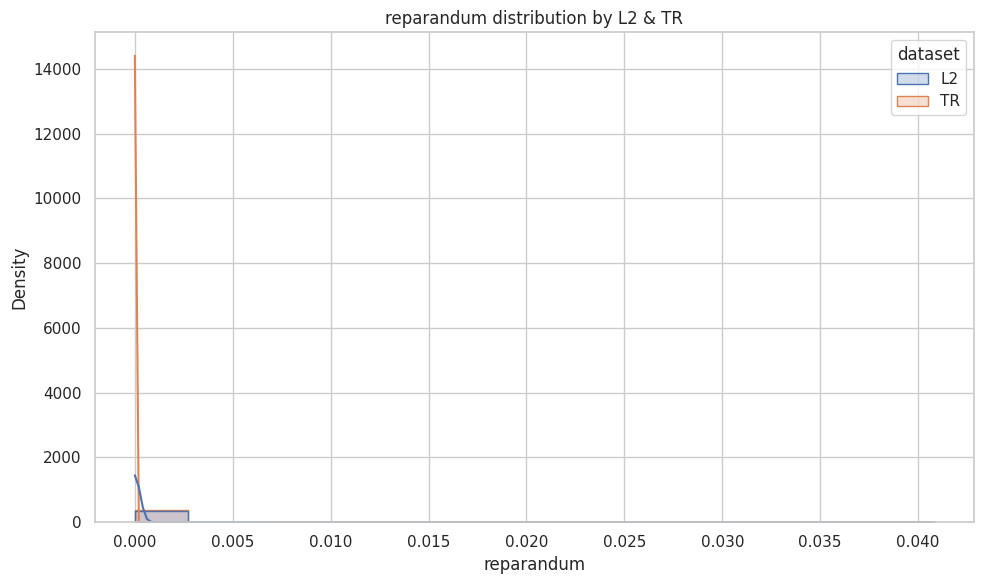

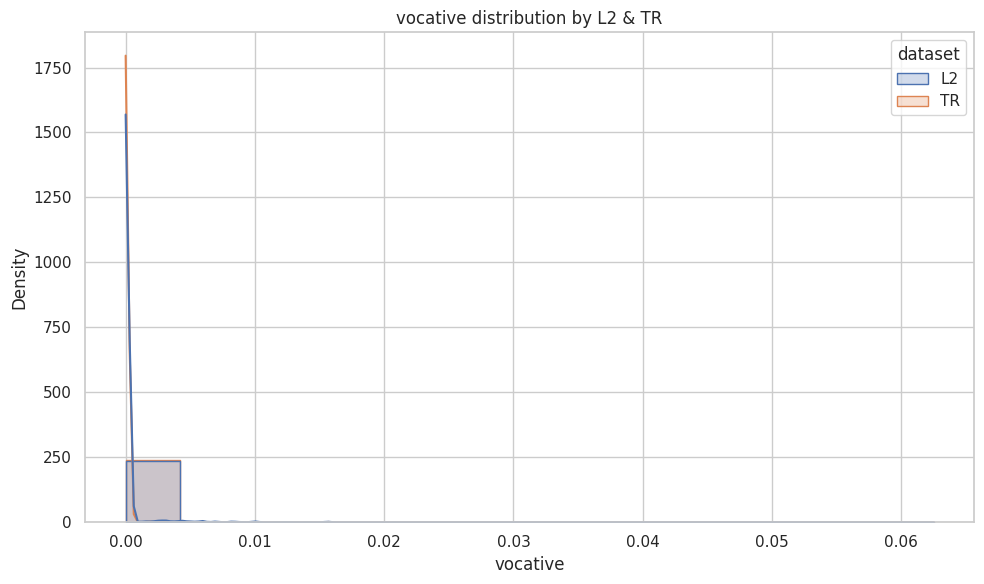

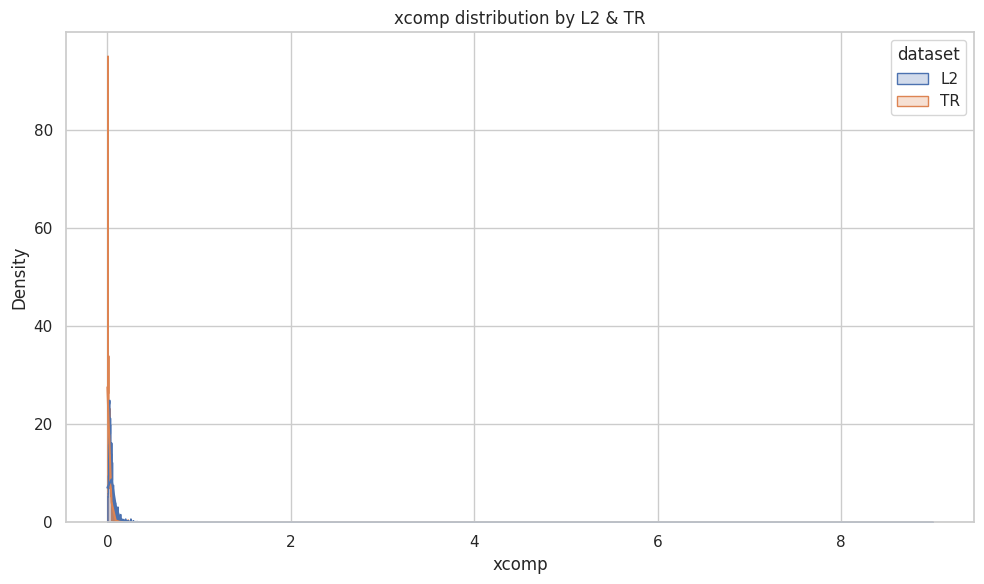

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# numeric columns
num_cols = df.select_dtypes(include='number').columns

# only the languages you want
dataset_groups = ["L2","TR"]

for col in num_cols:
    plt.figure(figsize=(10, 6))
    try:
      sns.histplot(
          data=df[df["dataset"].isin(dataset_groups)],
          x=col,
          hue="dataset",
          kde=True,
          element="step",
          stat="density",
          common_norm=False,
          label = dataset_groups
      )
    except:
      sns.histplot(
          data=df[df["dataset"].isin(dataset_groups)],
          x=col,
          hue="dataset",
          element="step",
          stat="density",
          common_norm=False,
          label = dataset_groups
      )

    plt.title(f"{col} distribution by L2 & TR")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()


##Distribution of features by L1

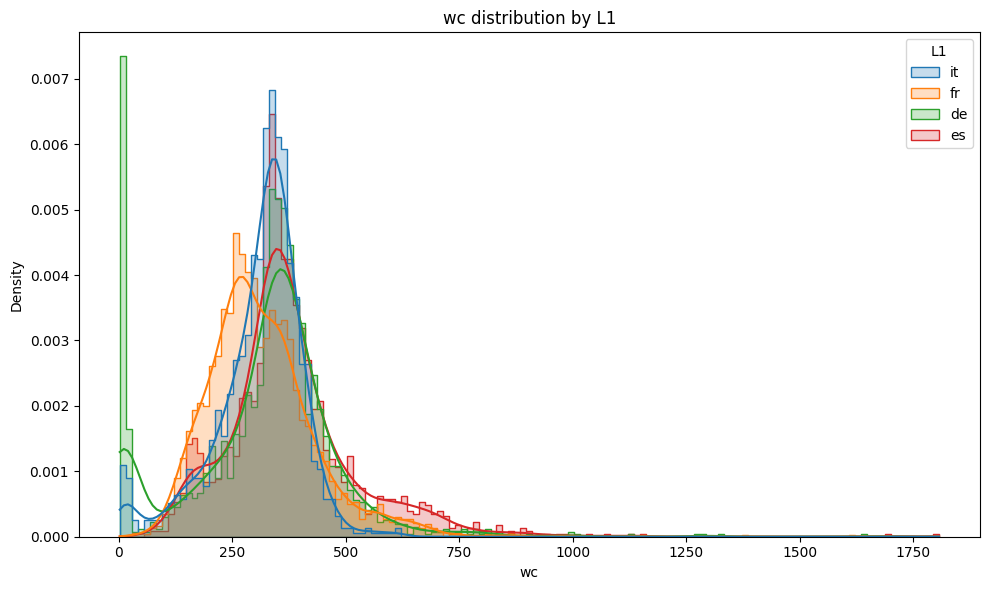

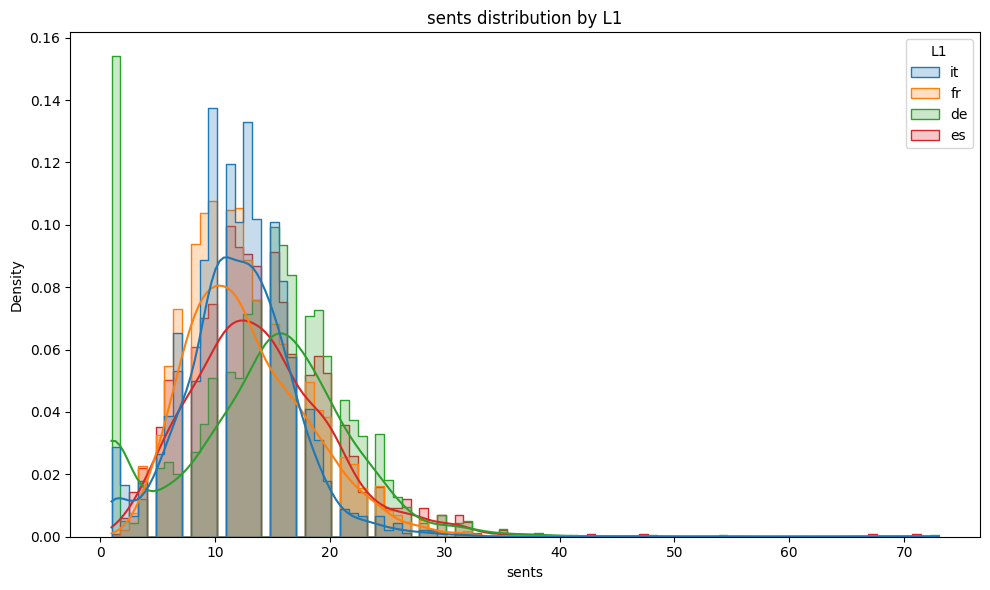

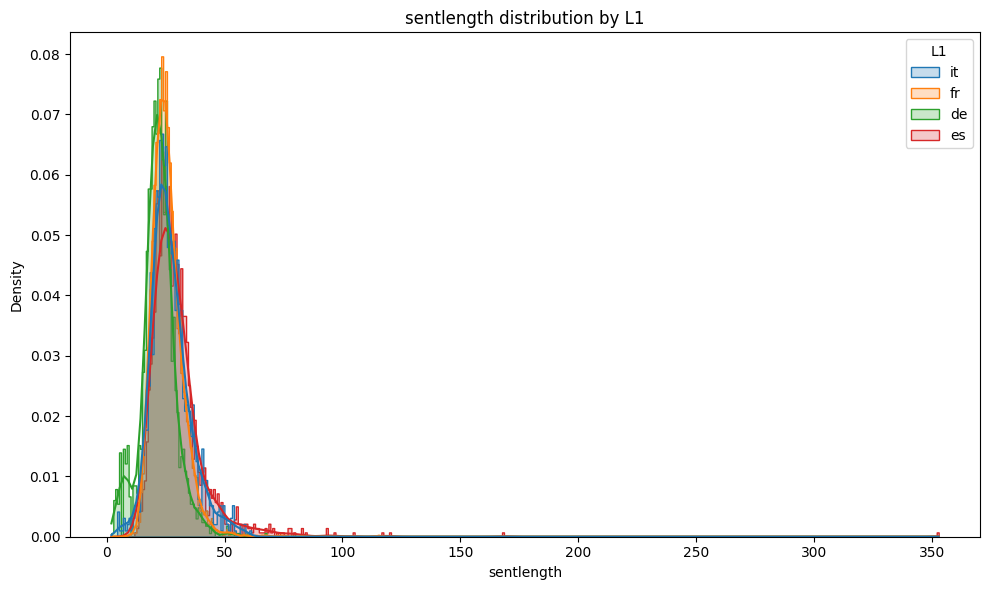

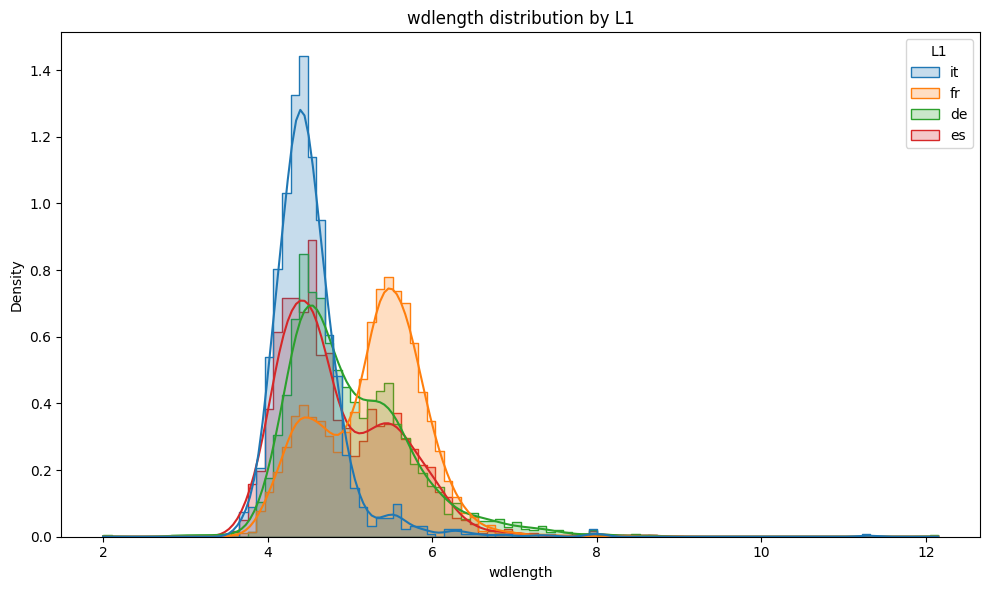

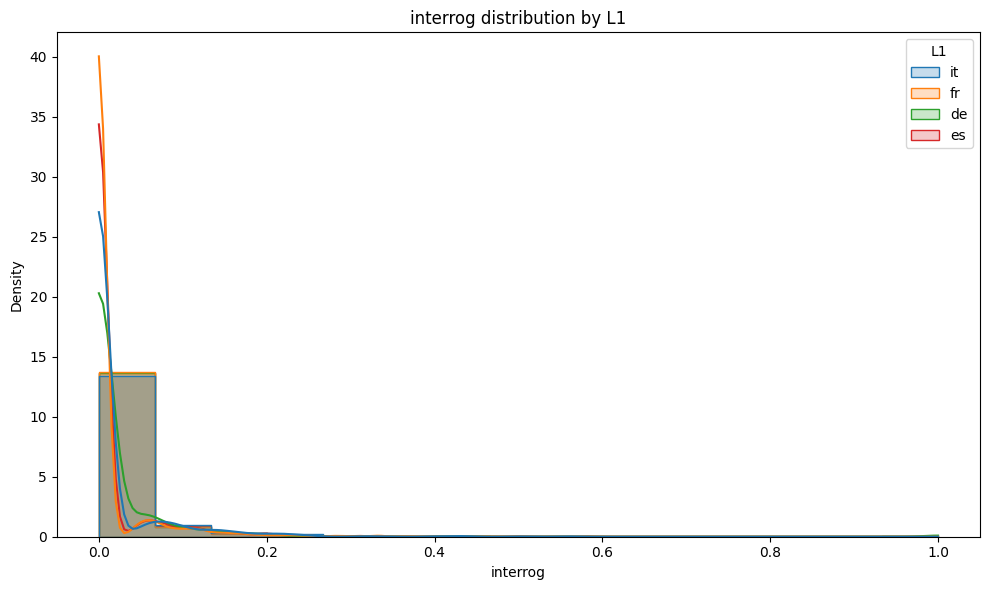

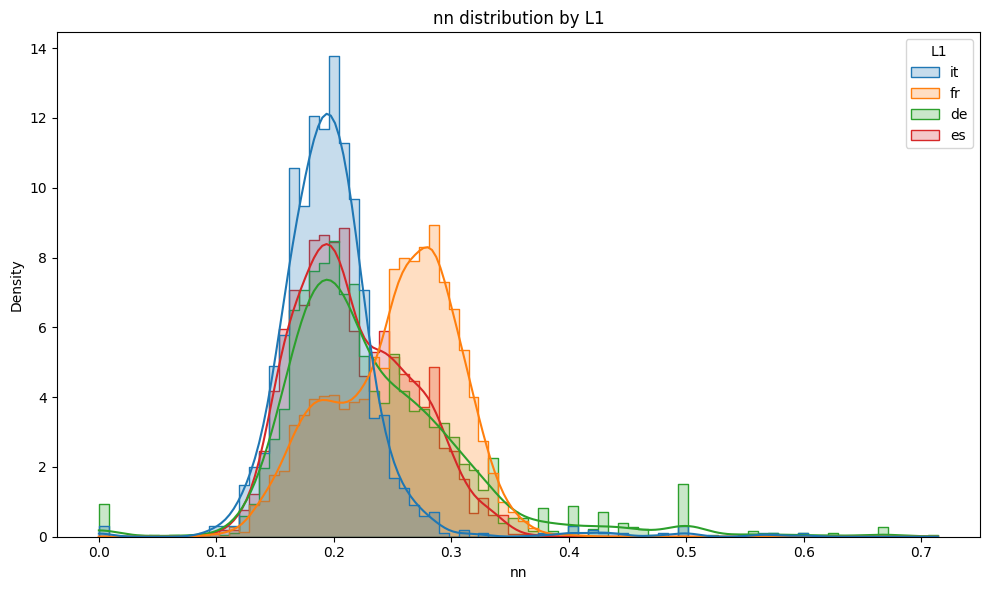

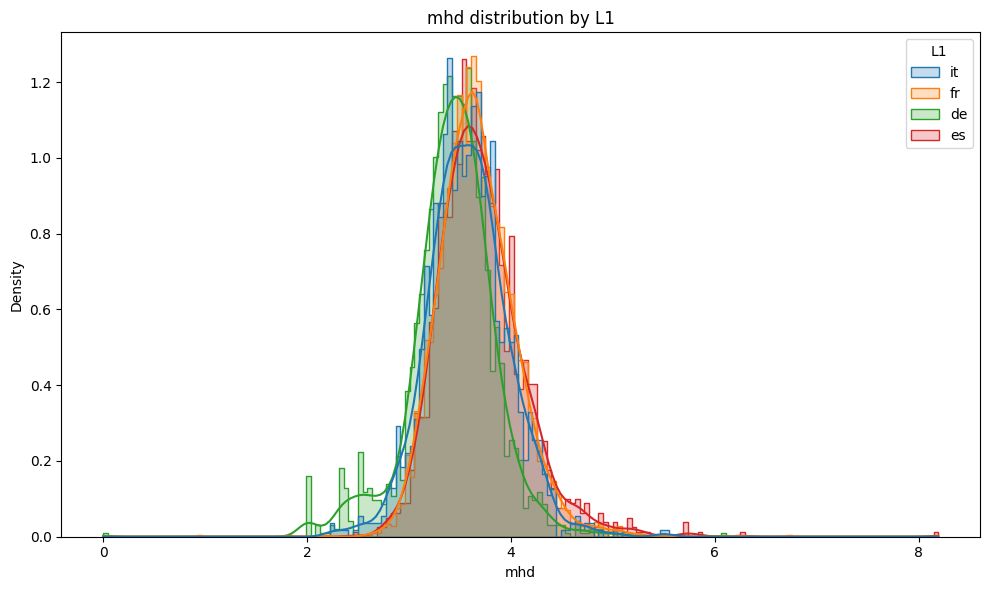

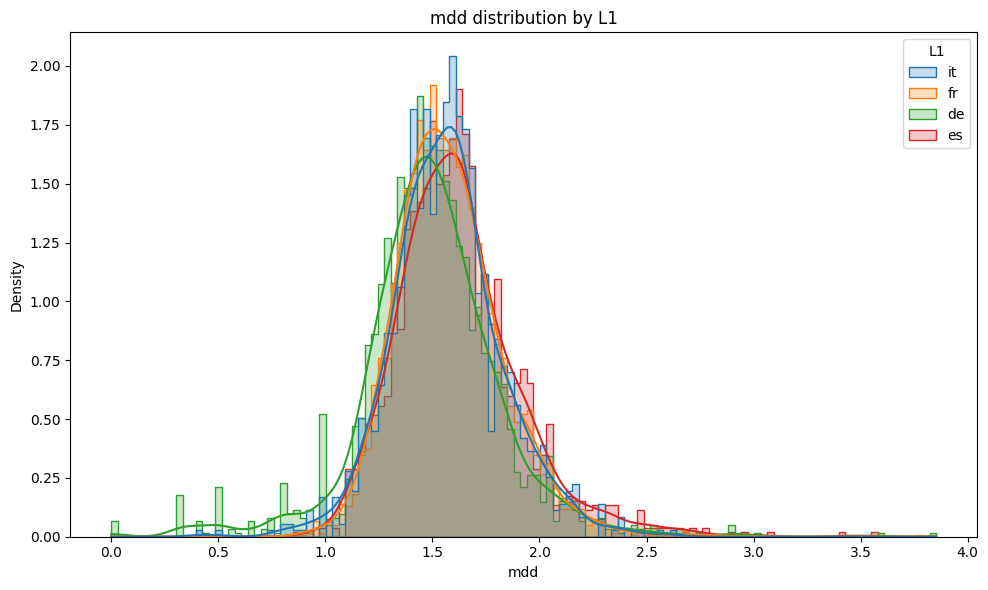

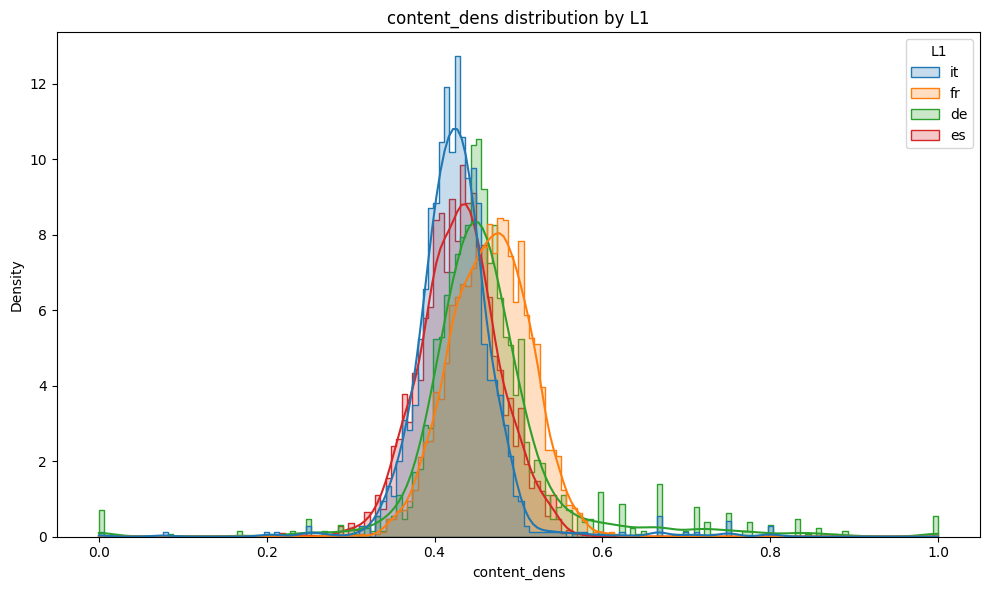

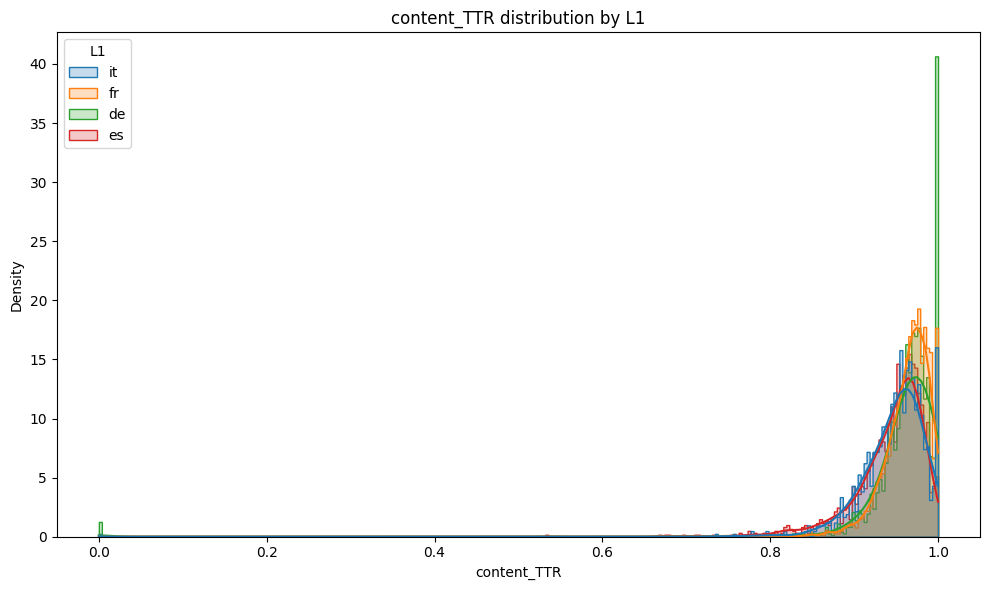

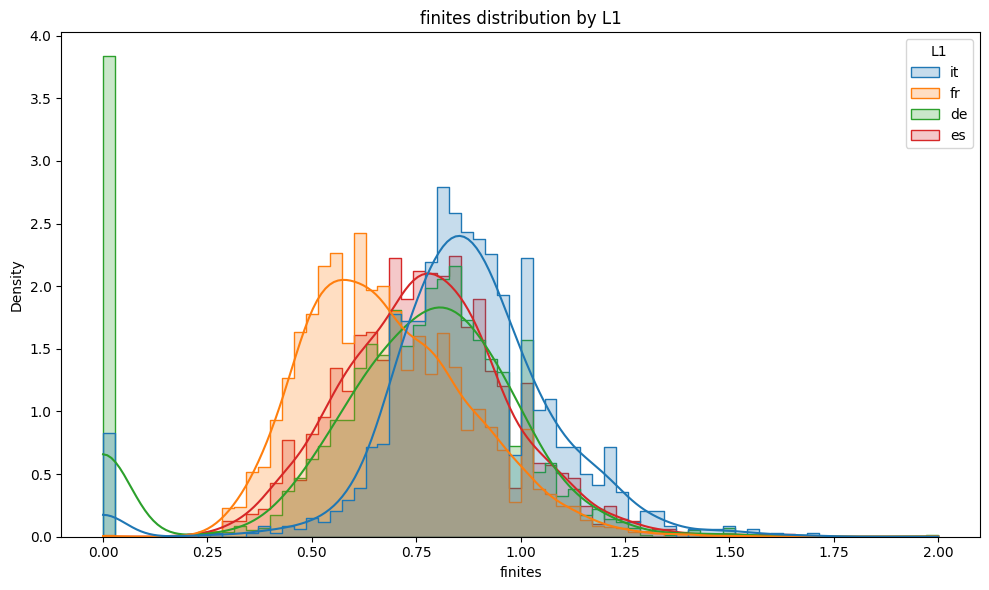

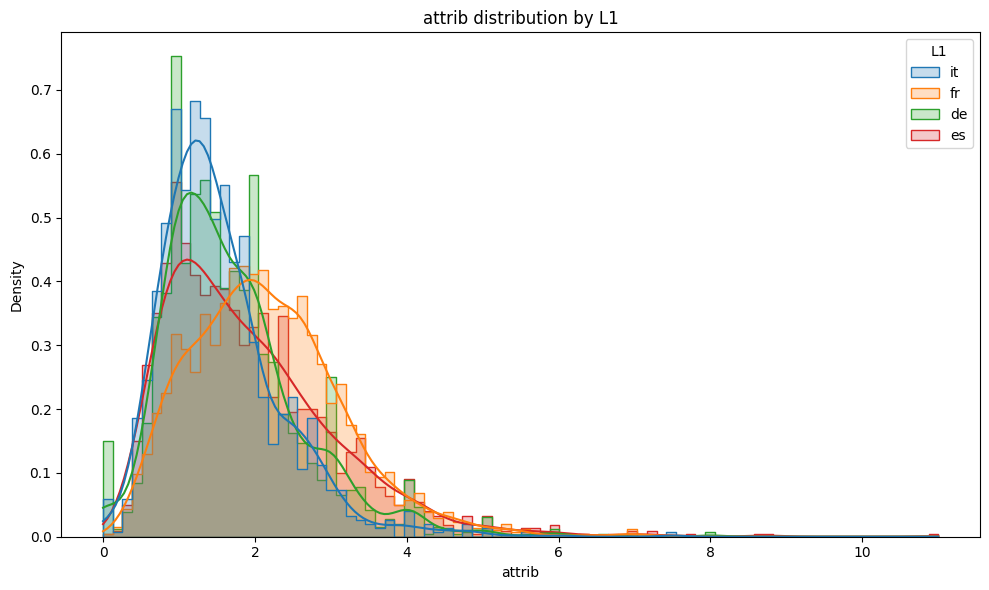

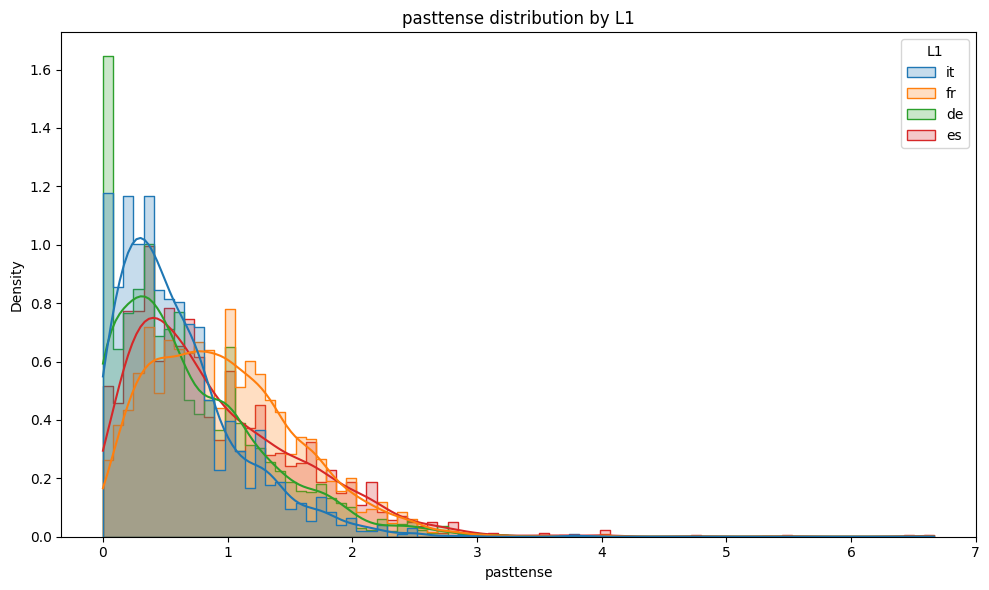

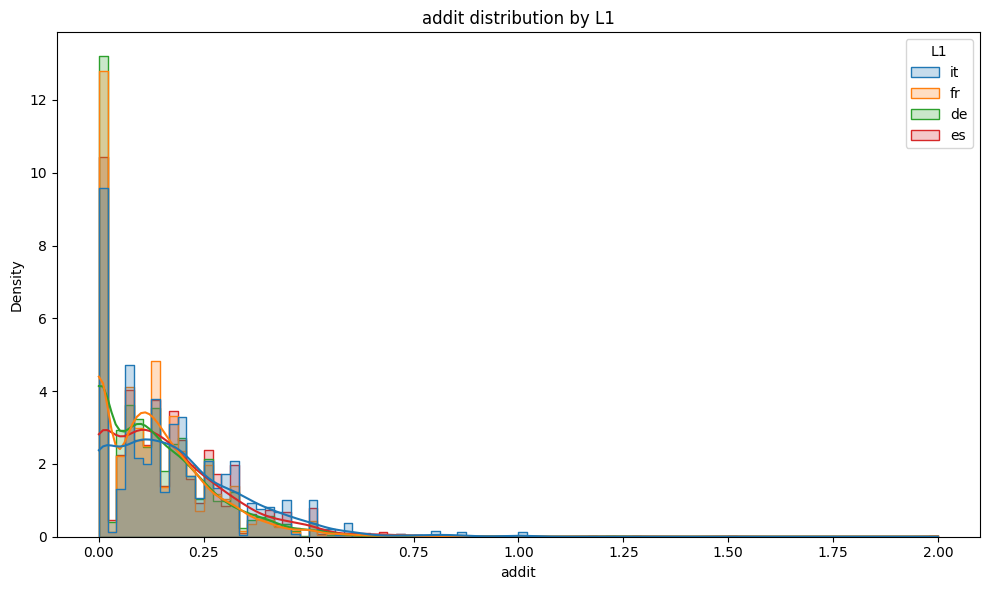

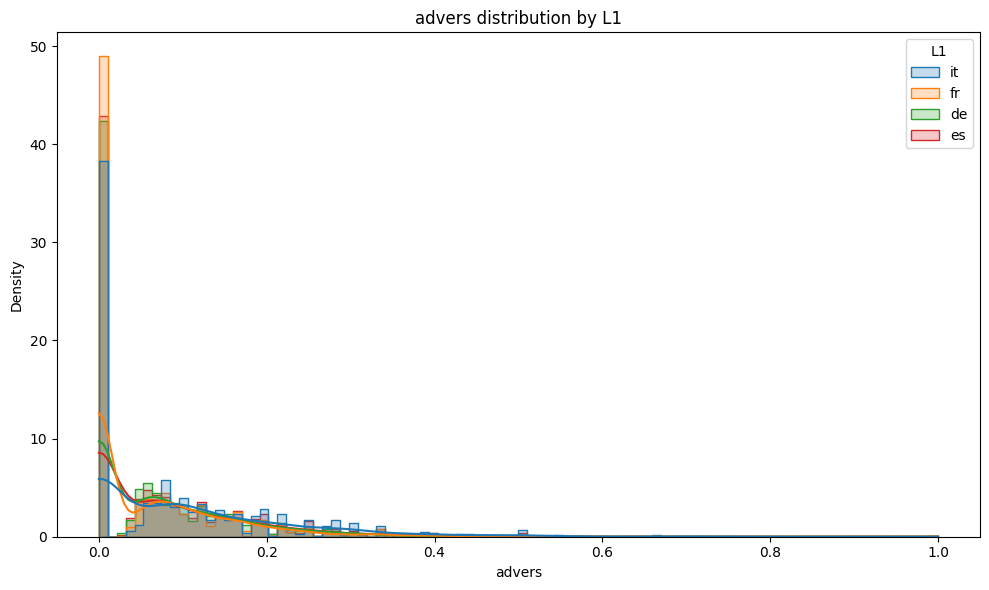

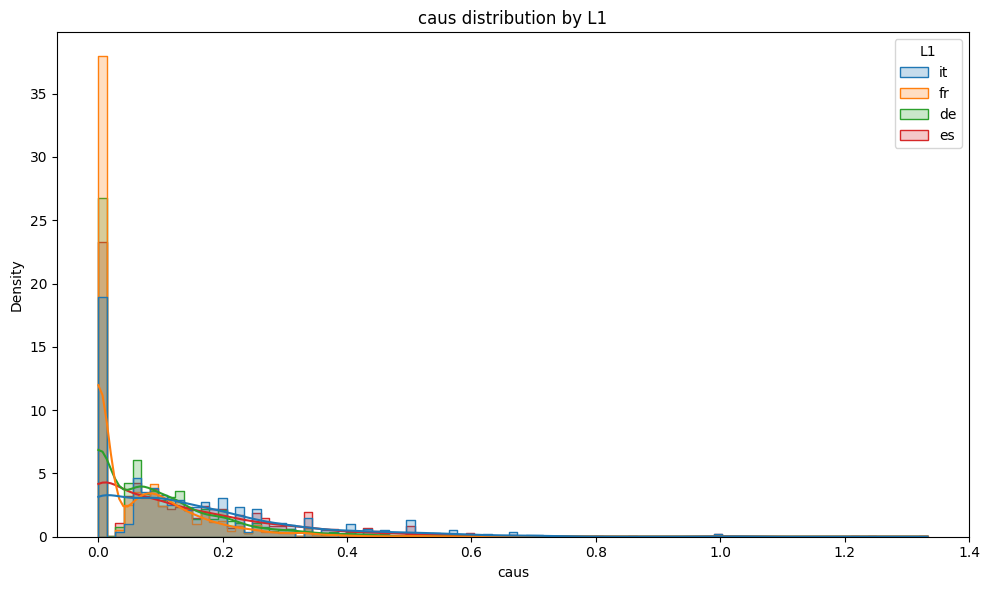

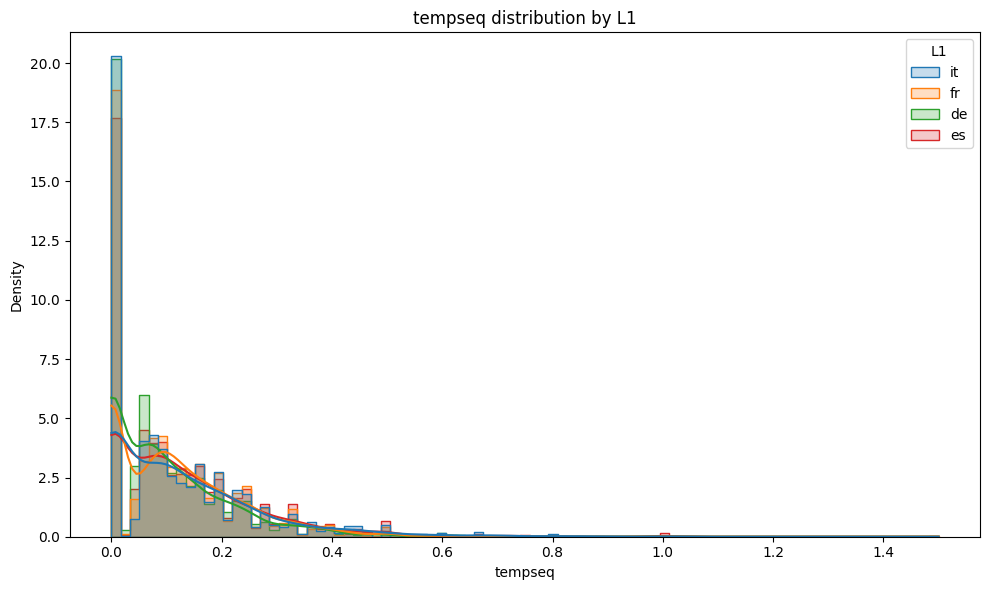

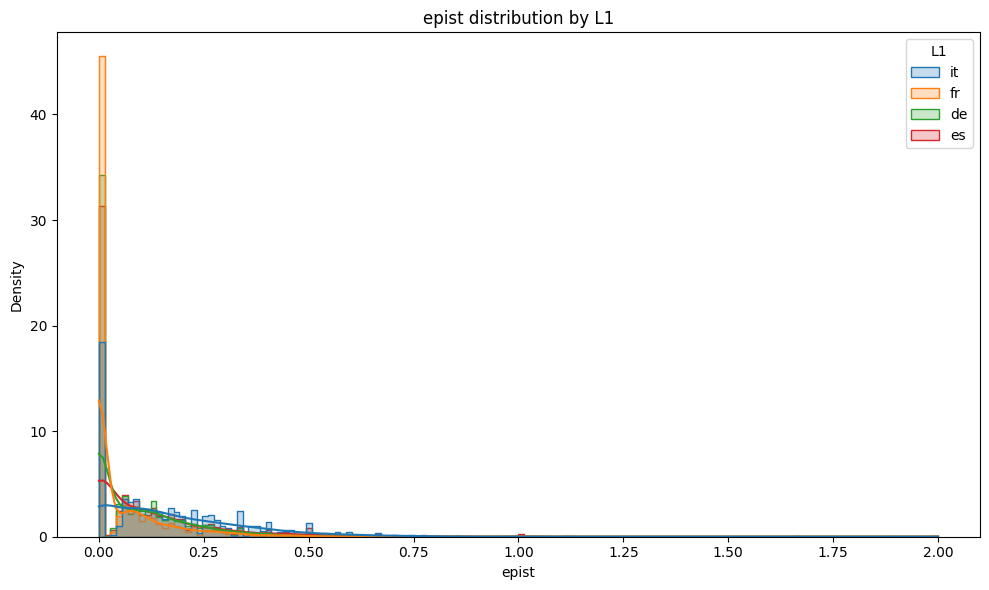

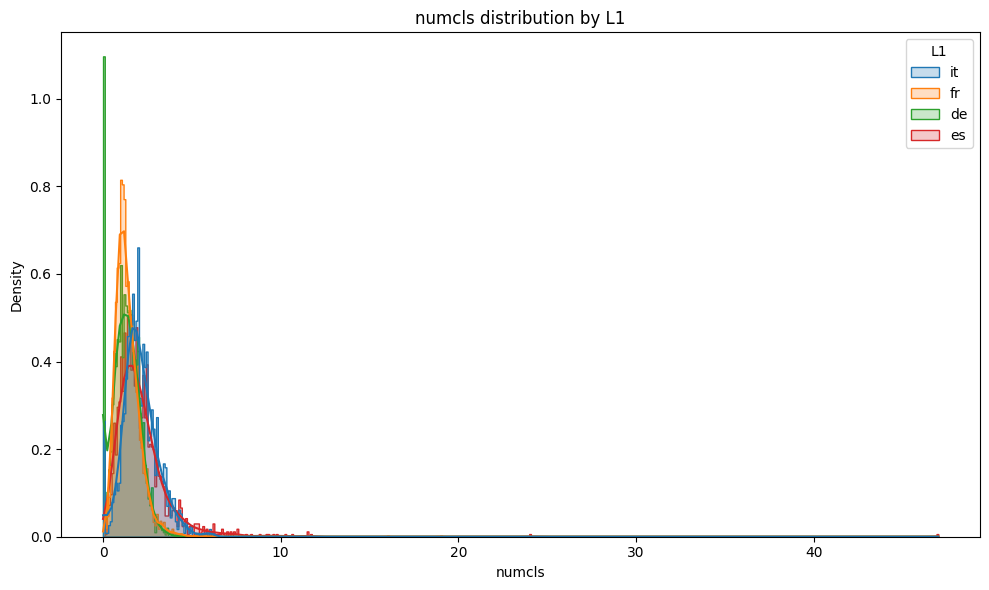

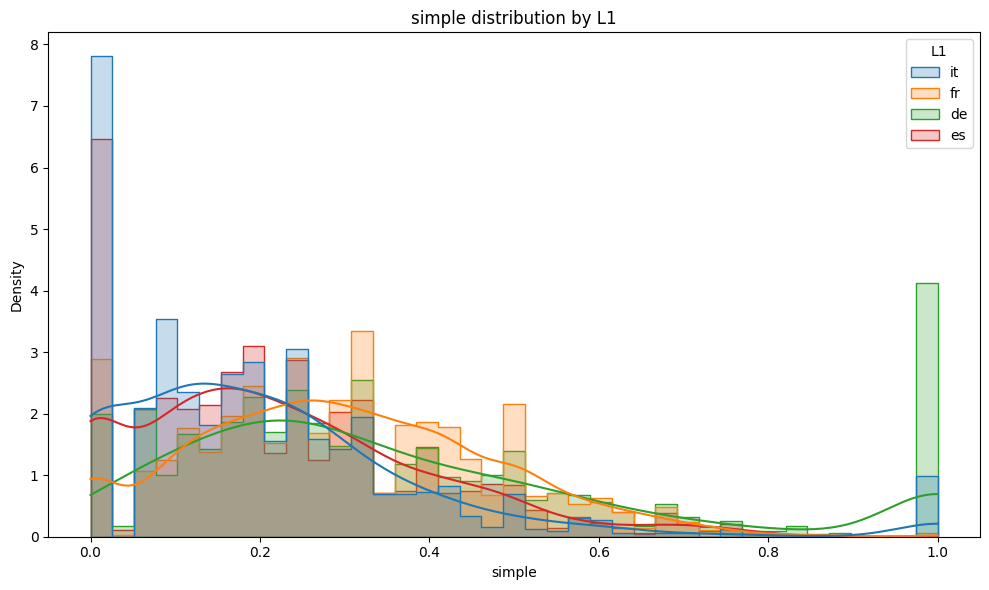

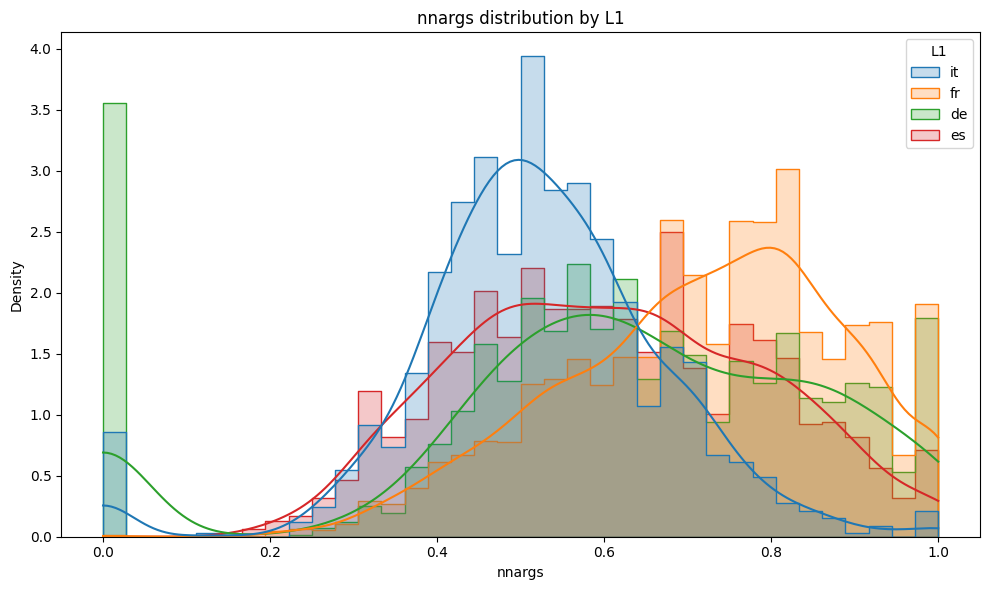

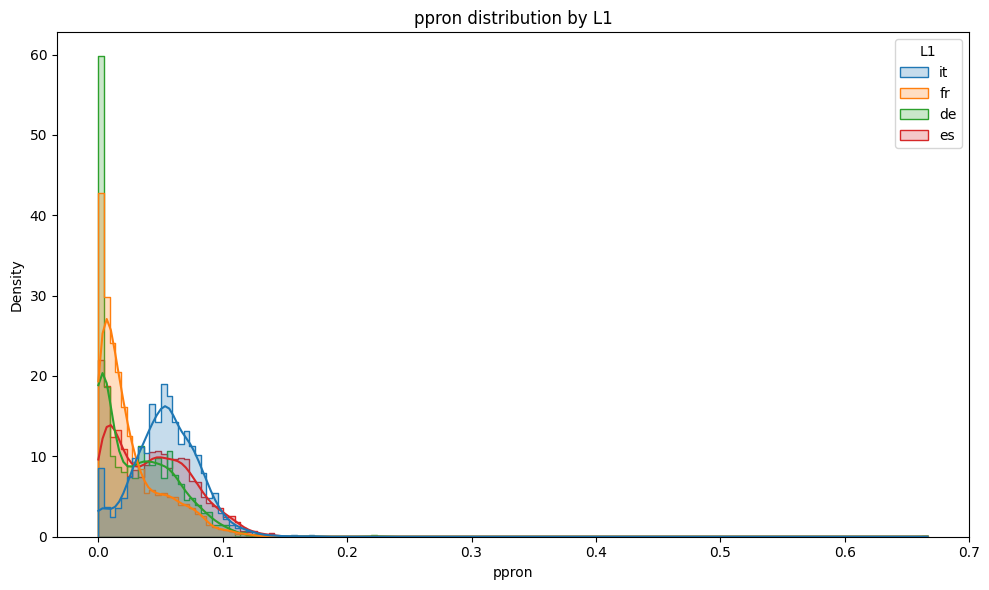

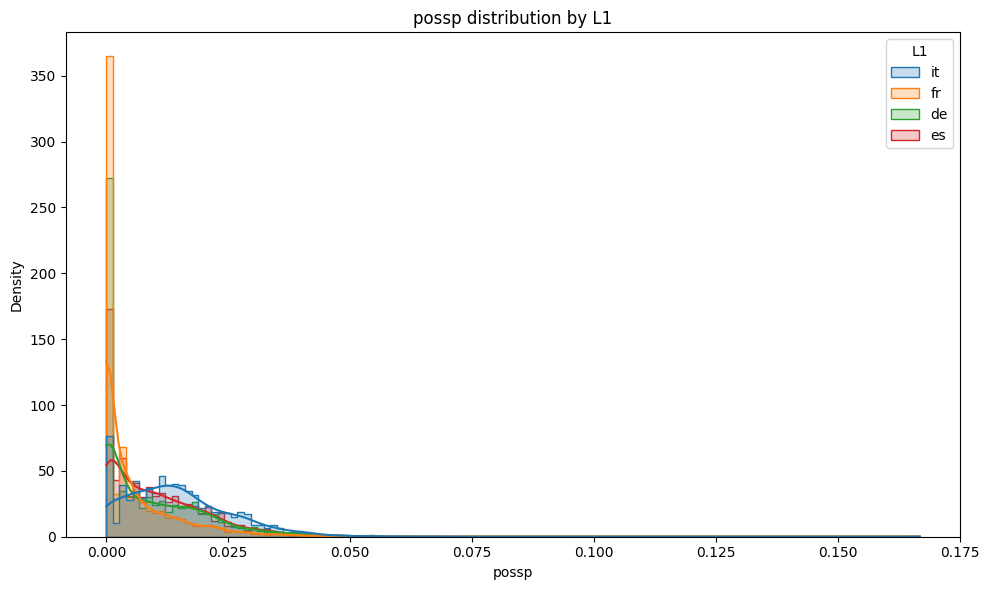

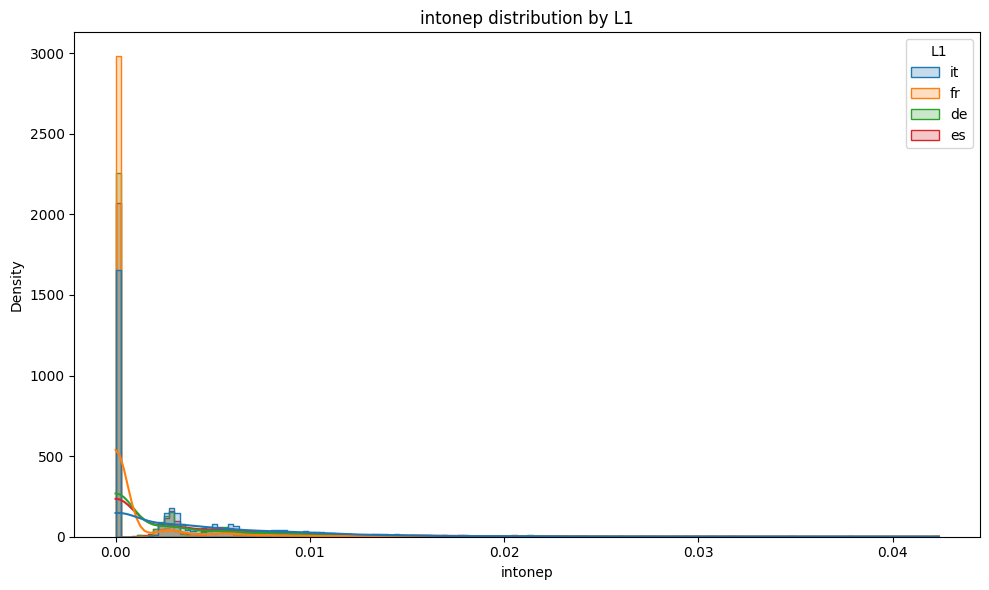

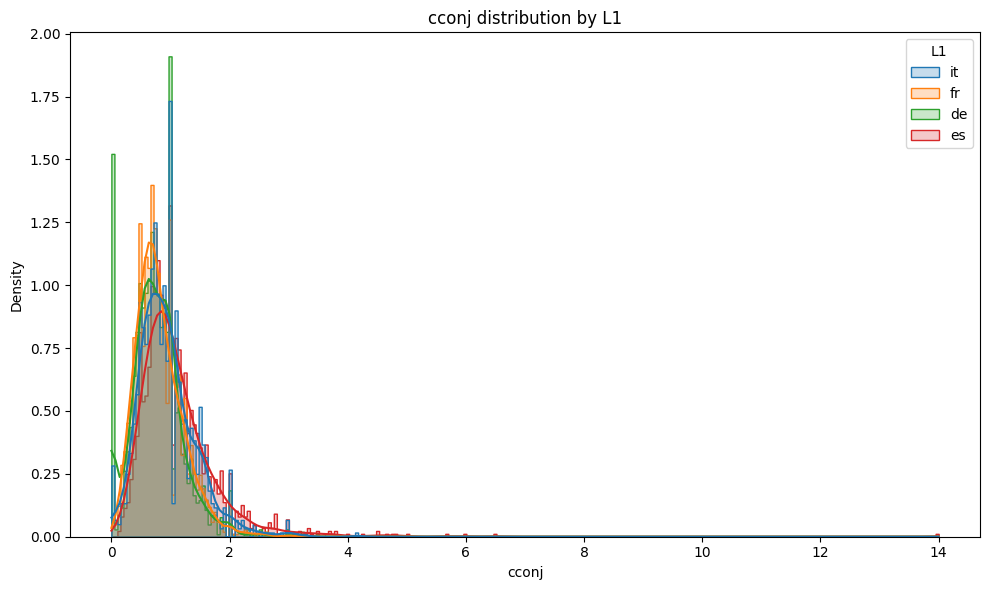

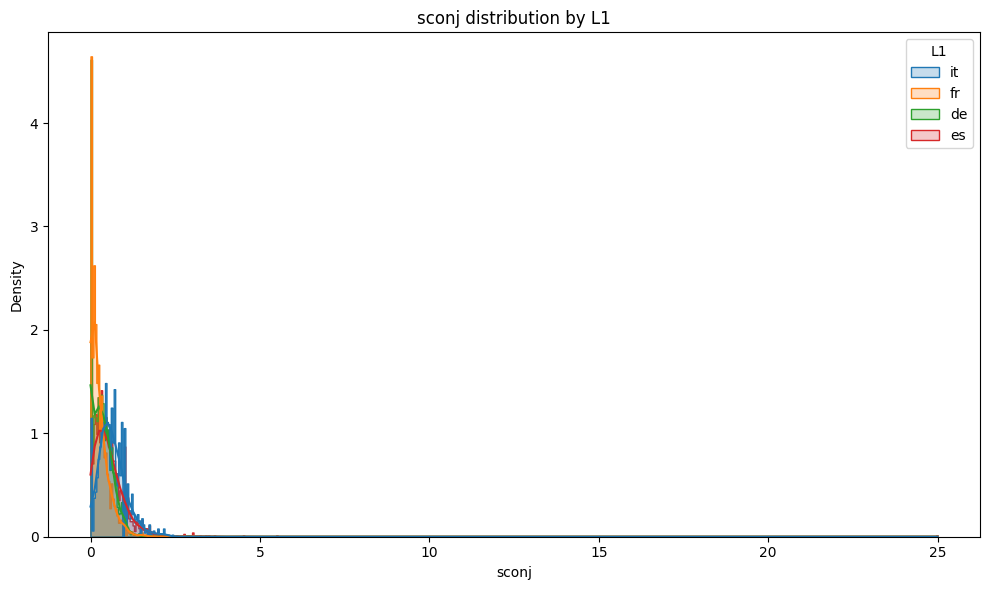

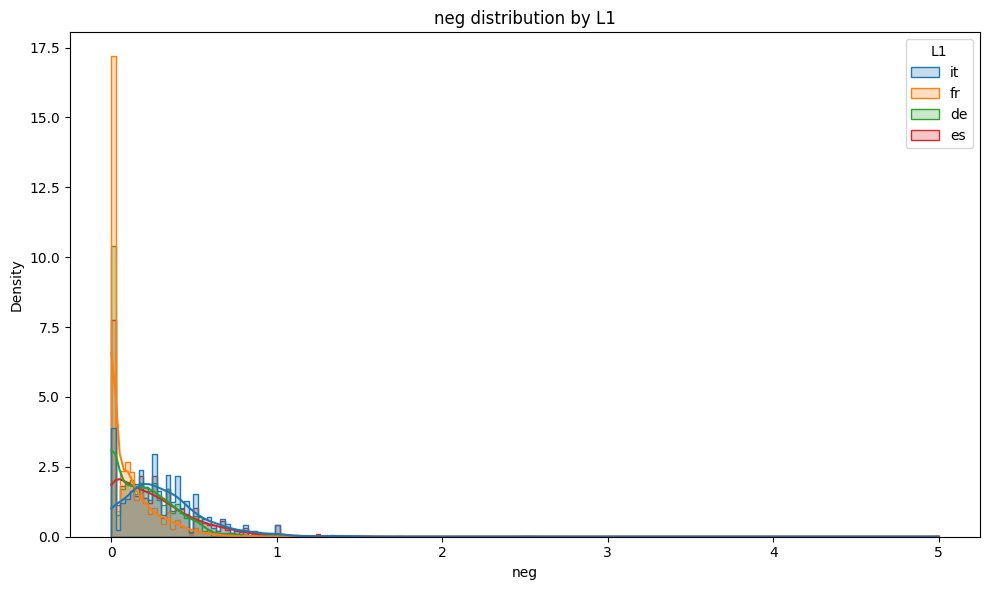

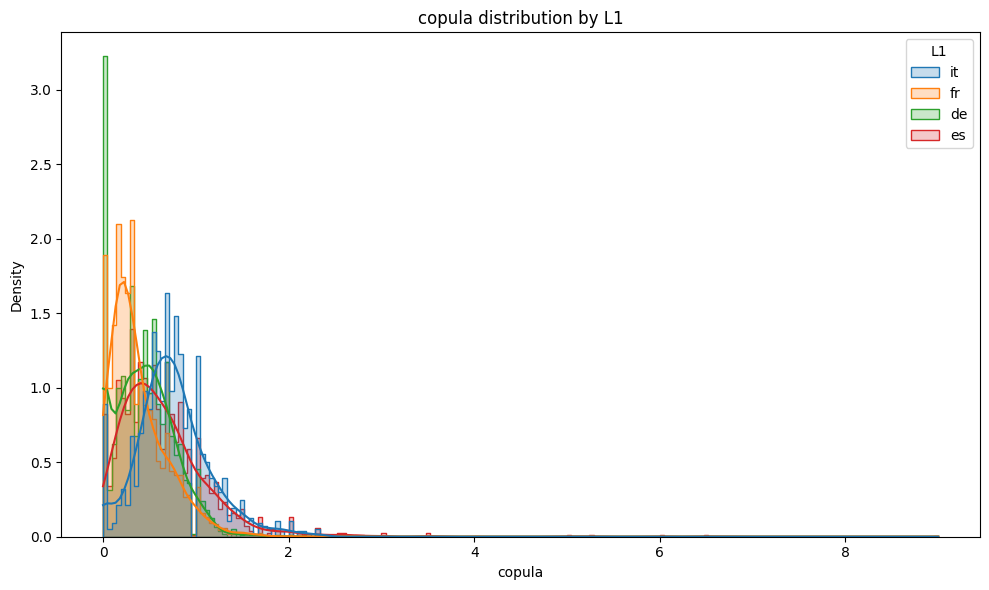

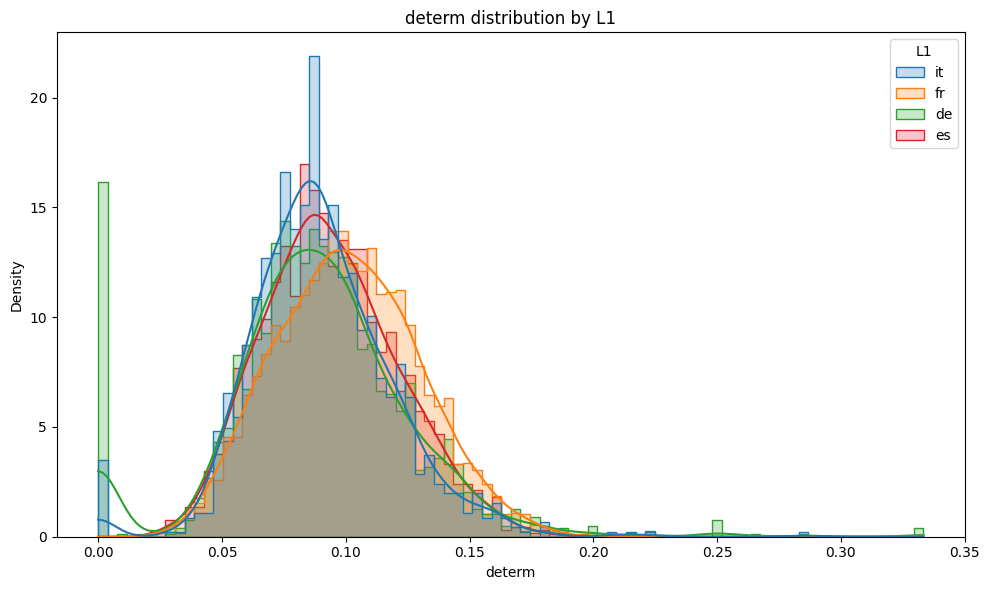

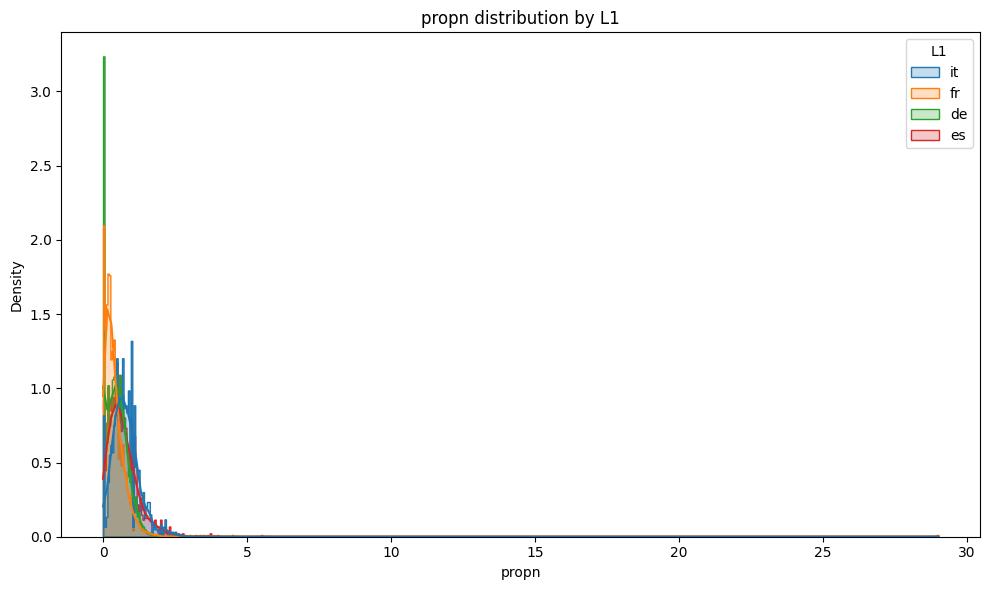

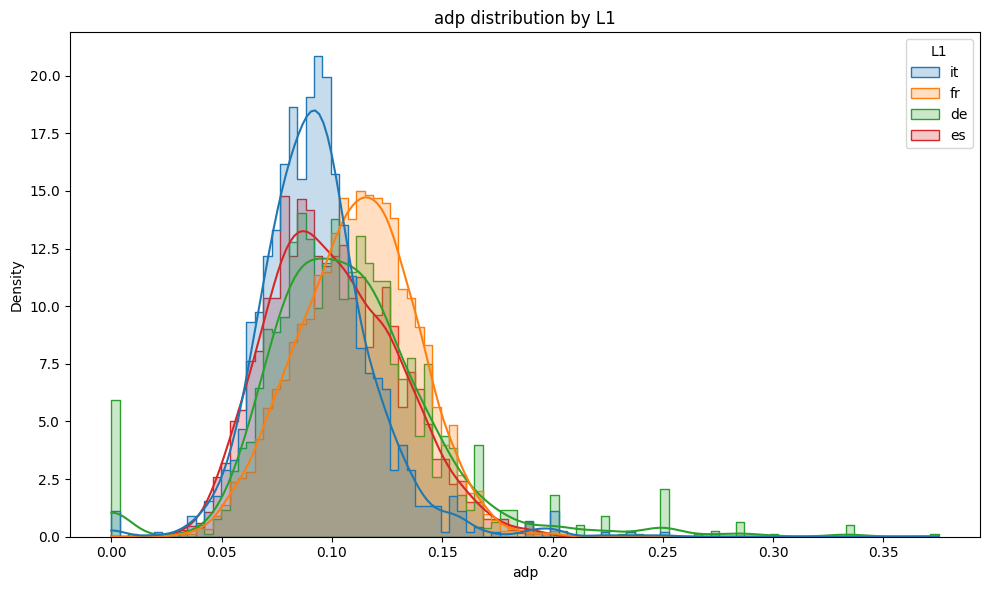

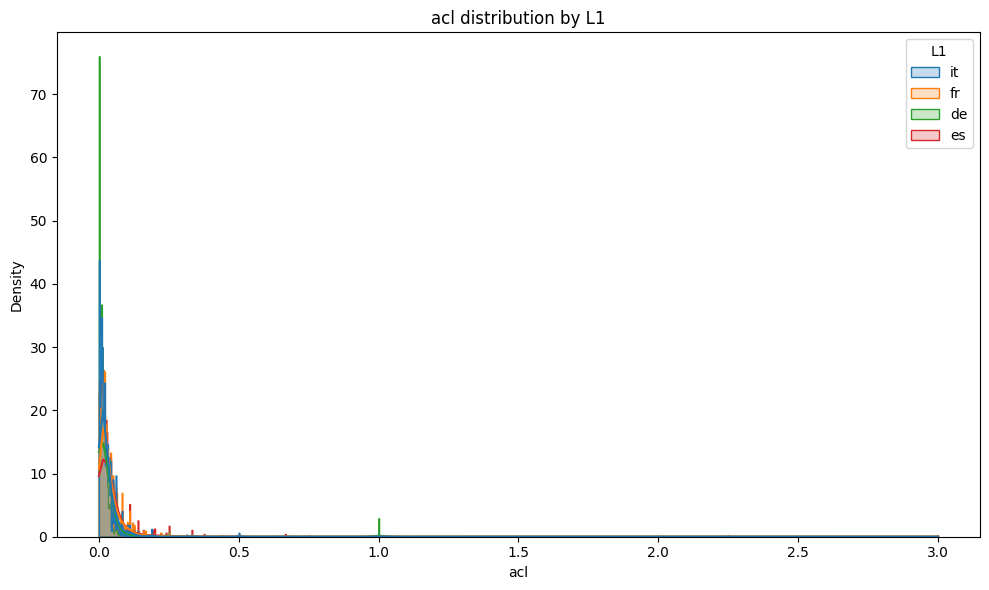

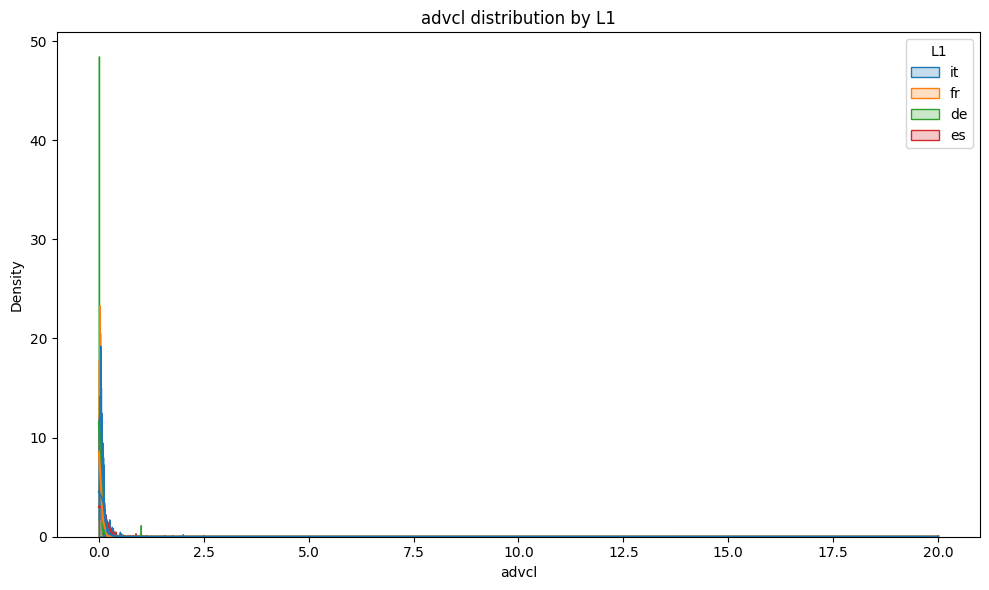

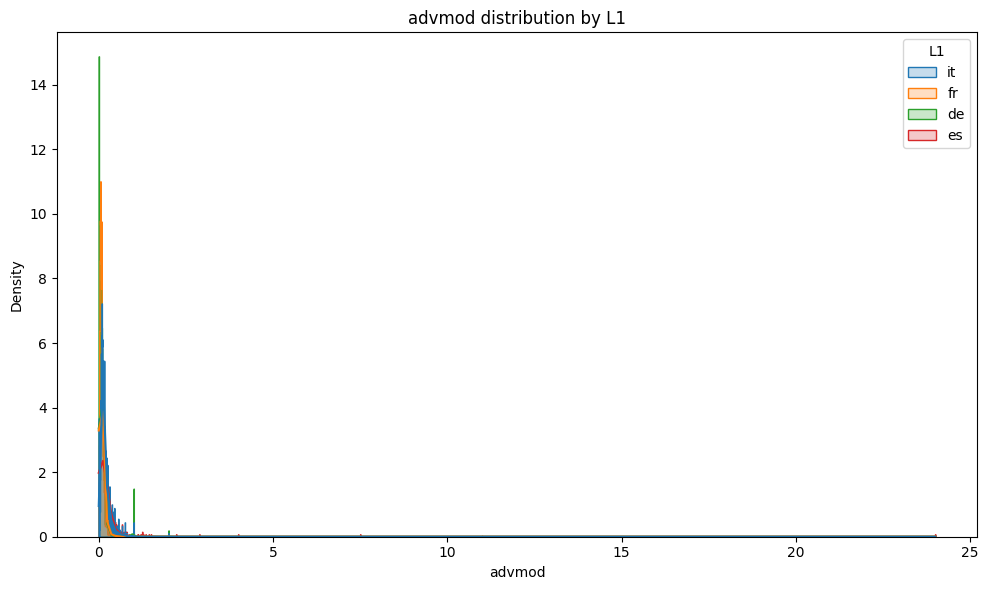

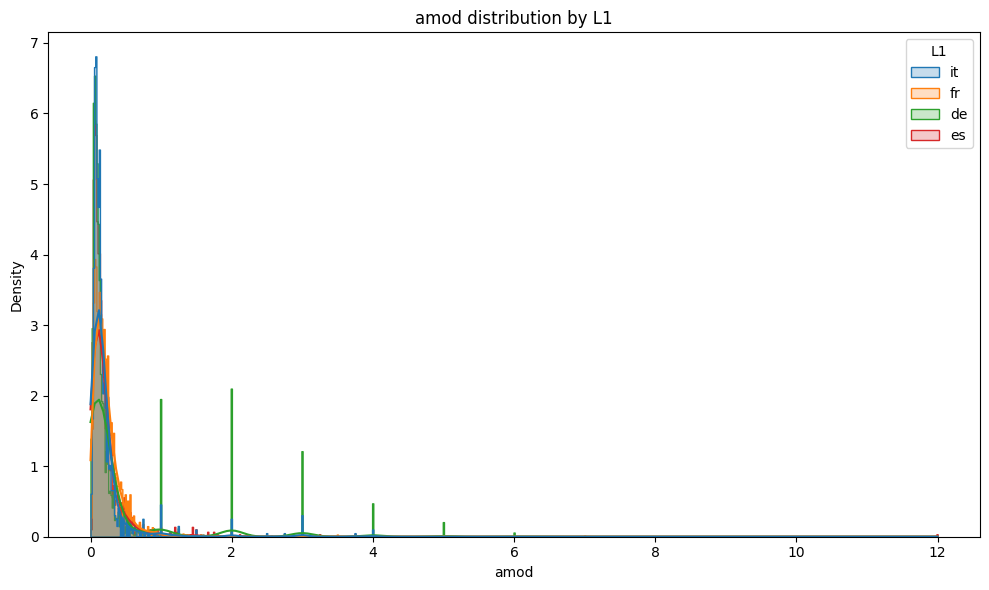

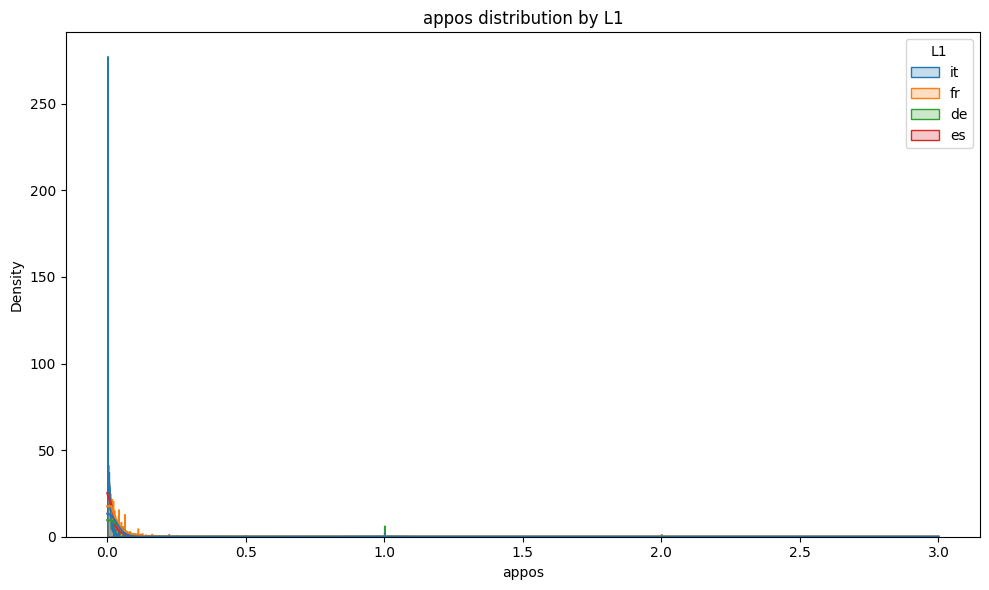

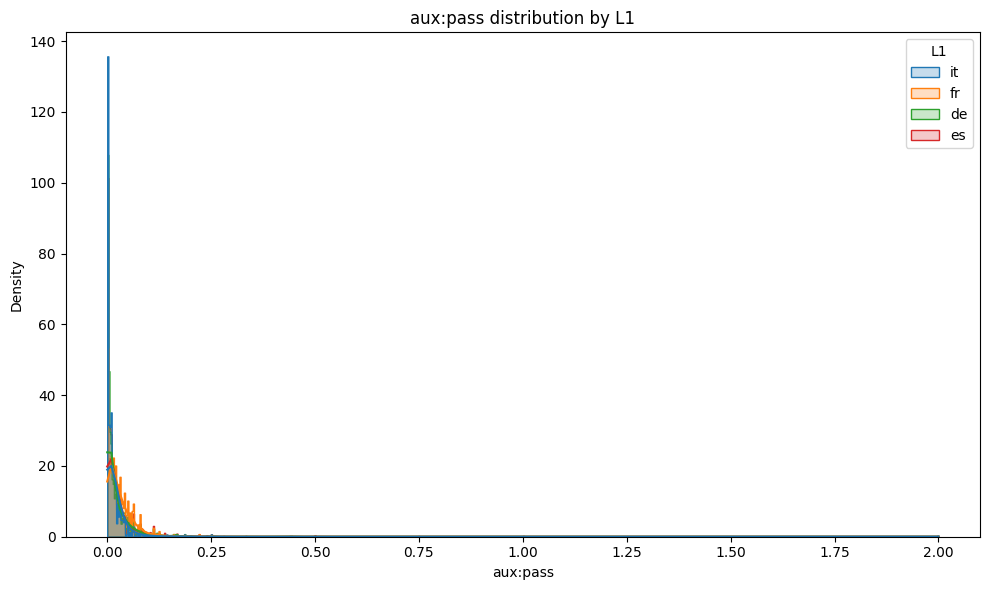

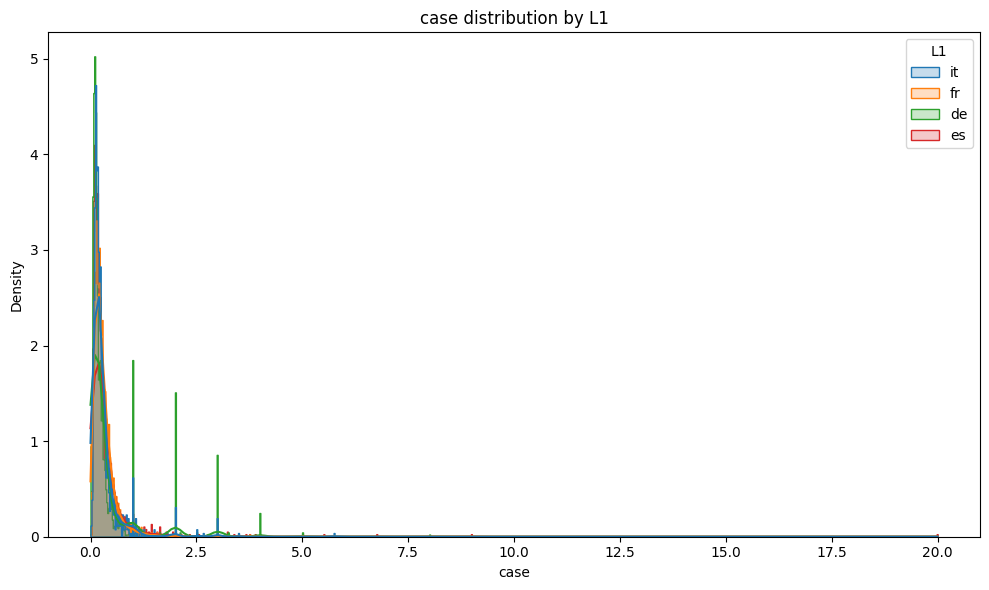

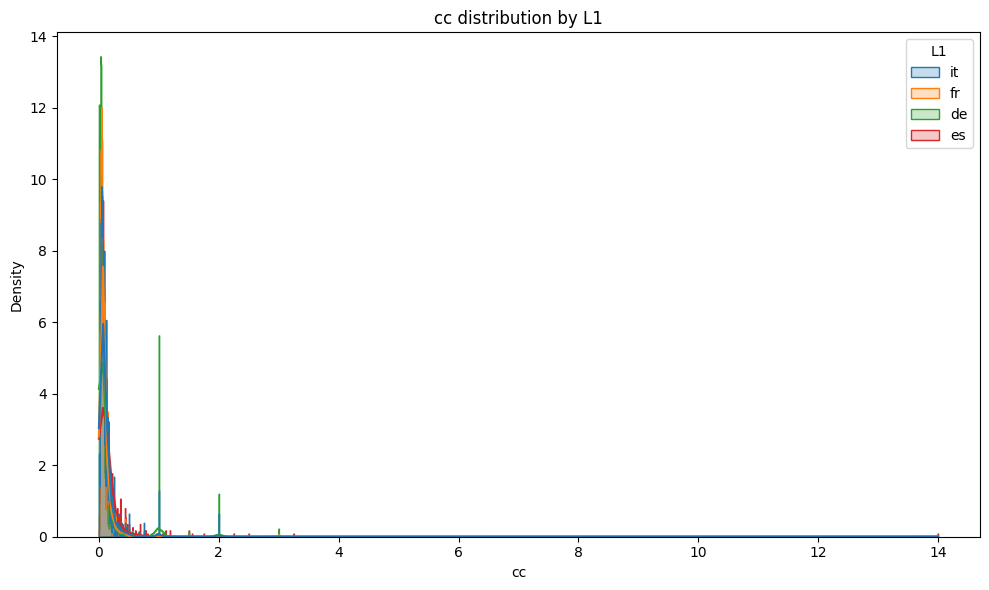

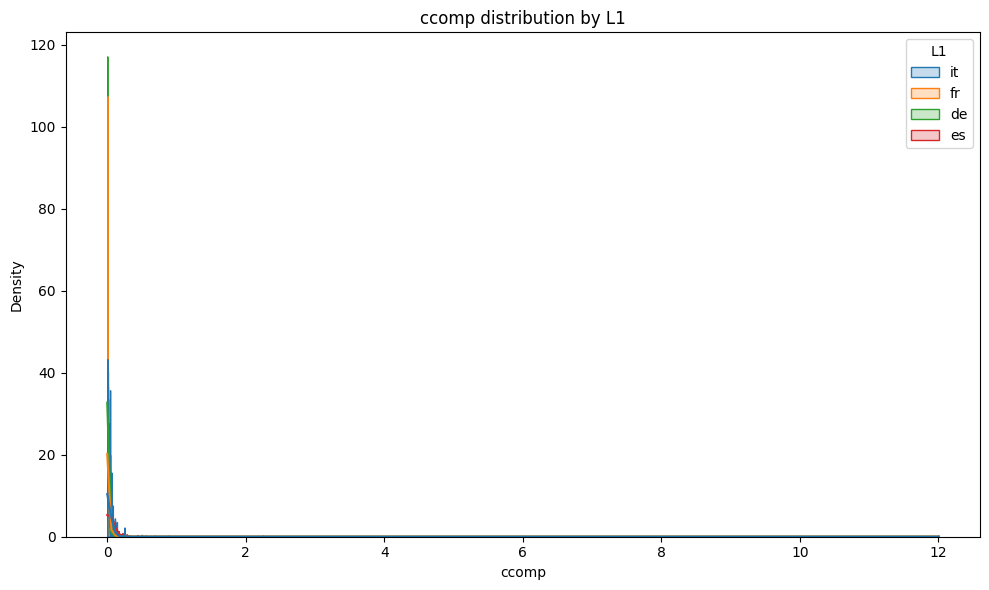

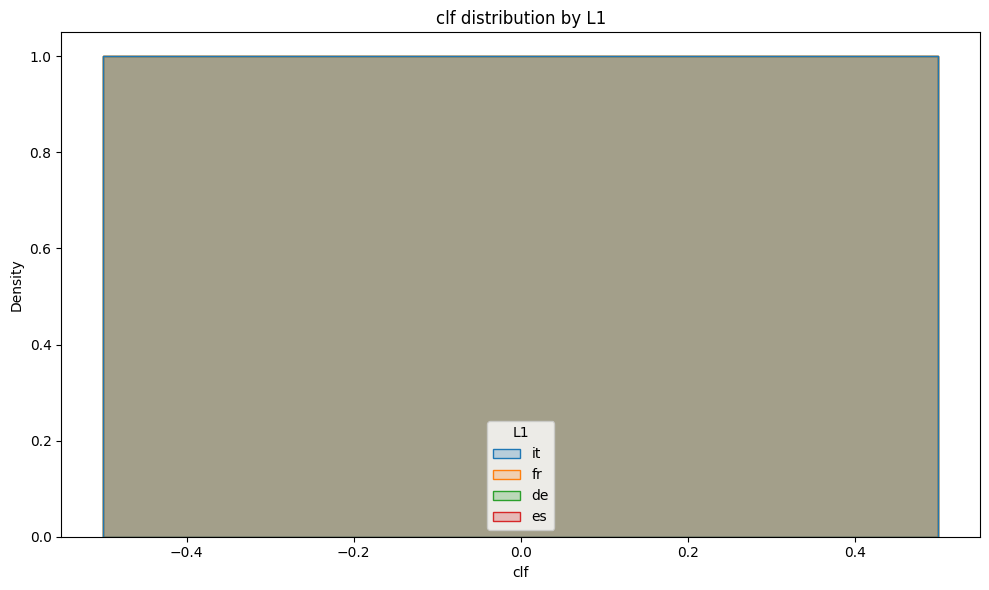

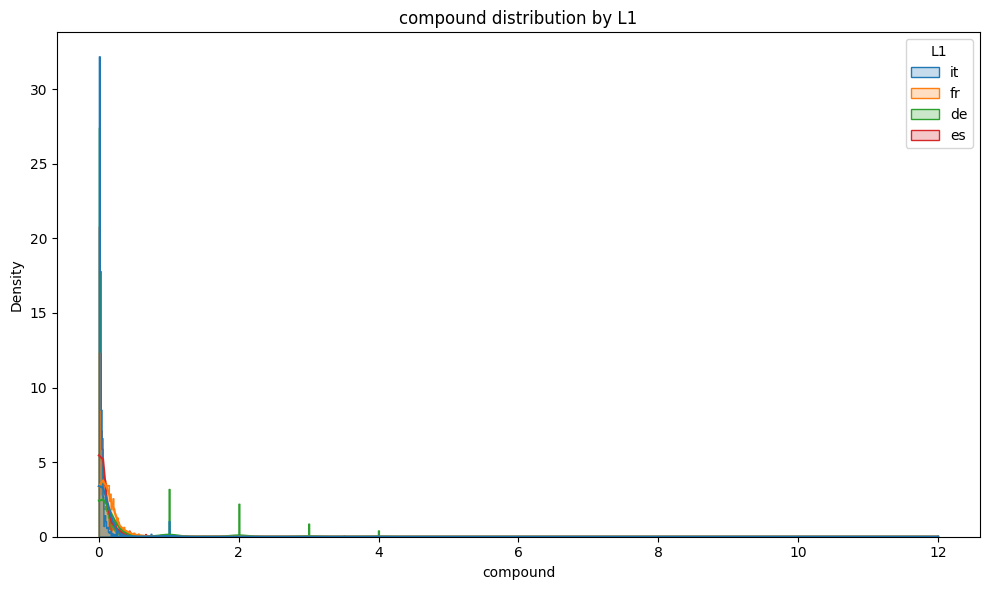

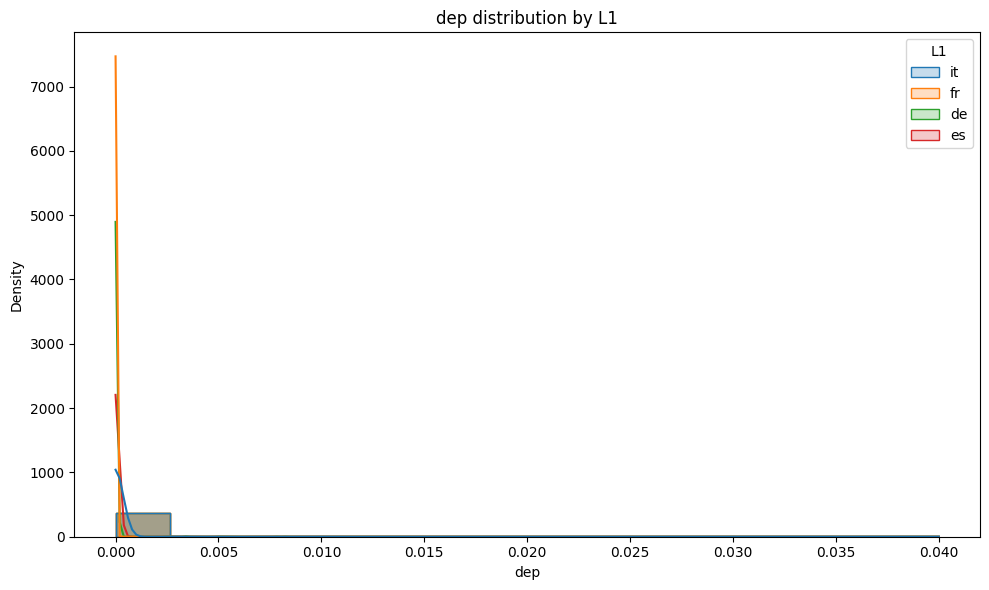

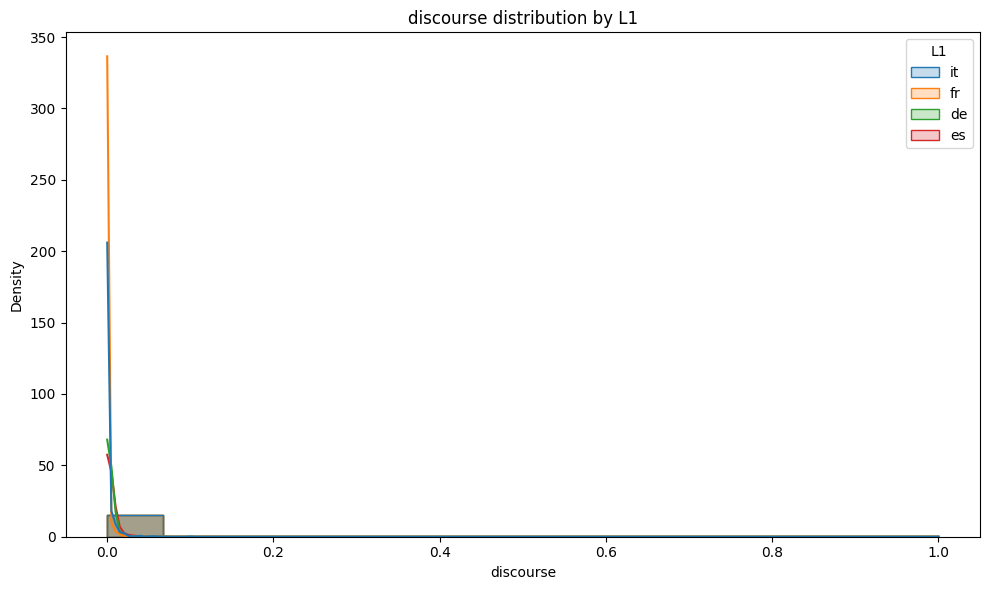

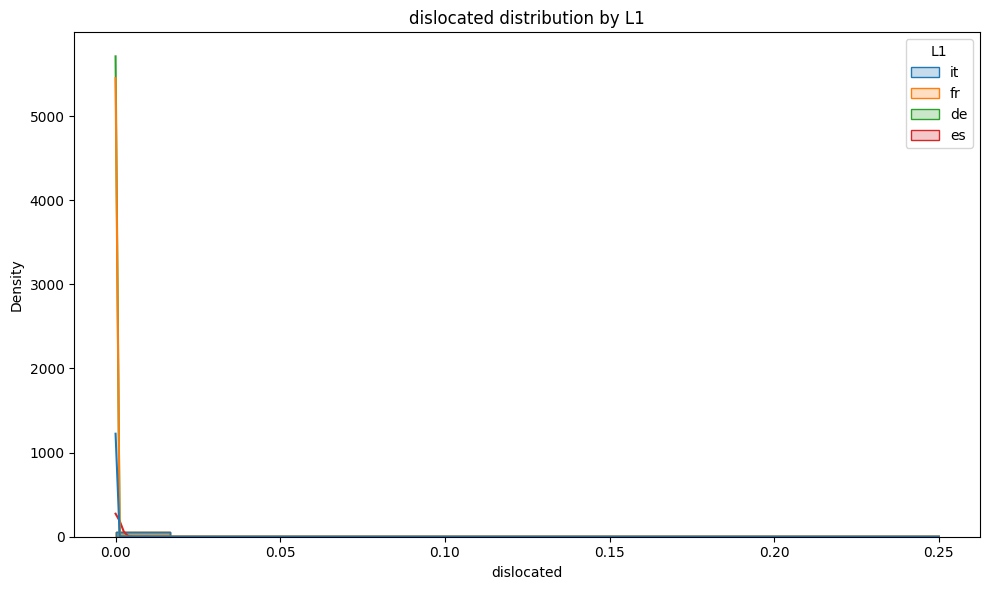

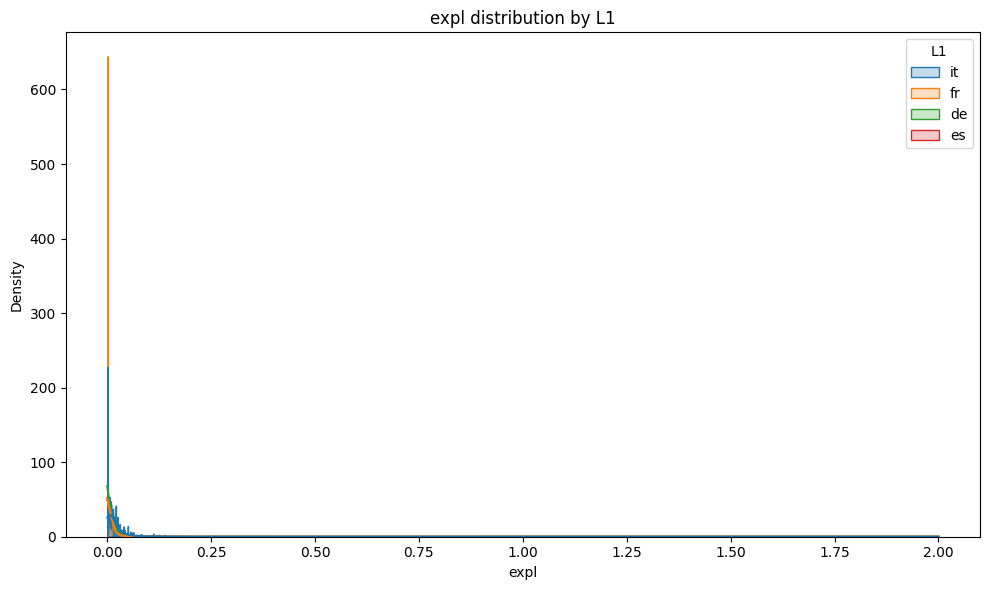

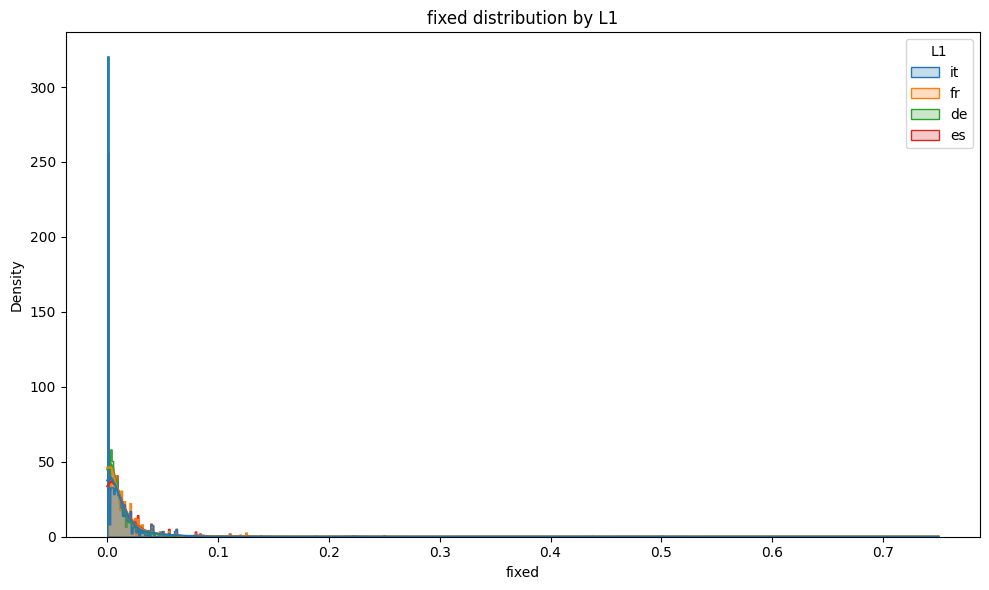

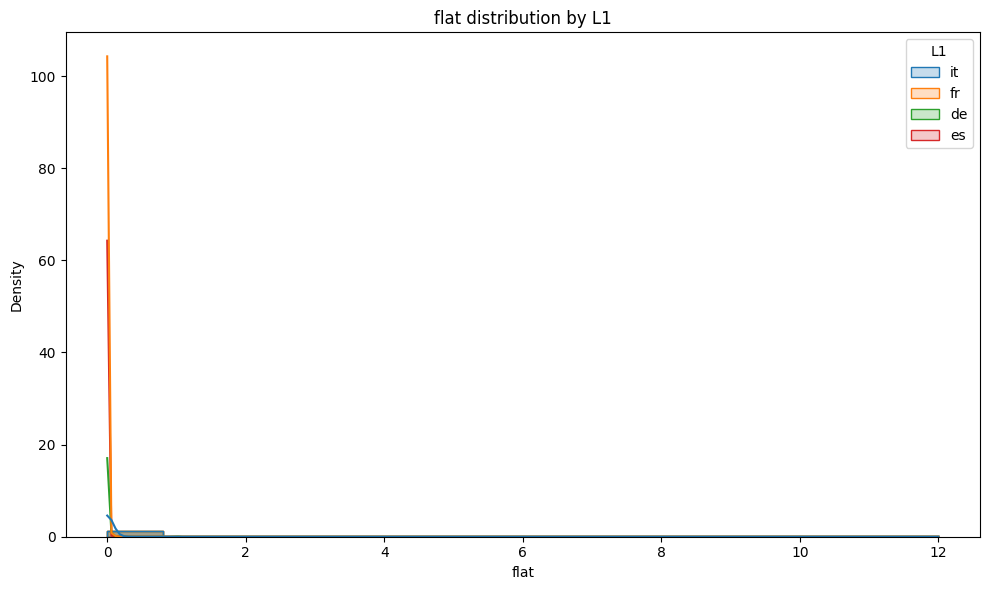

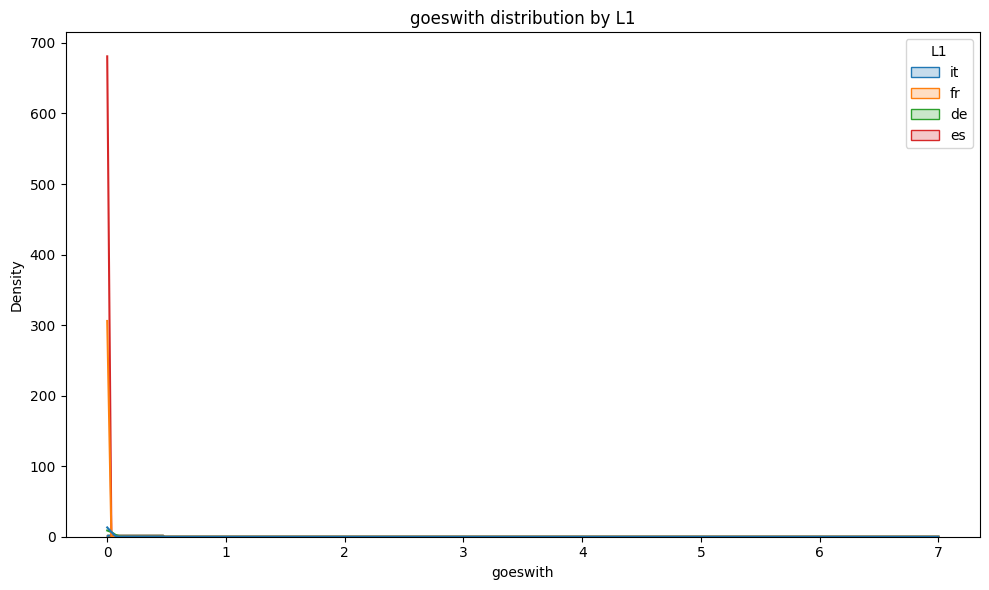

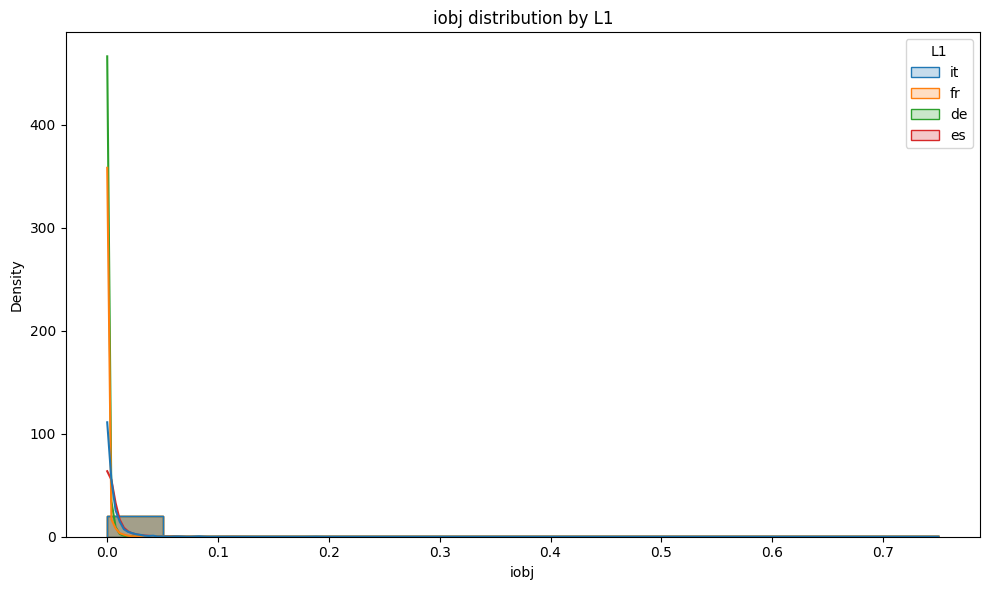

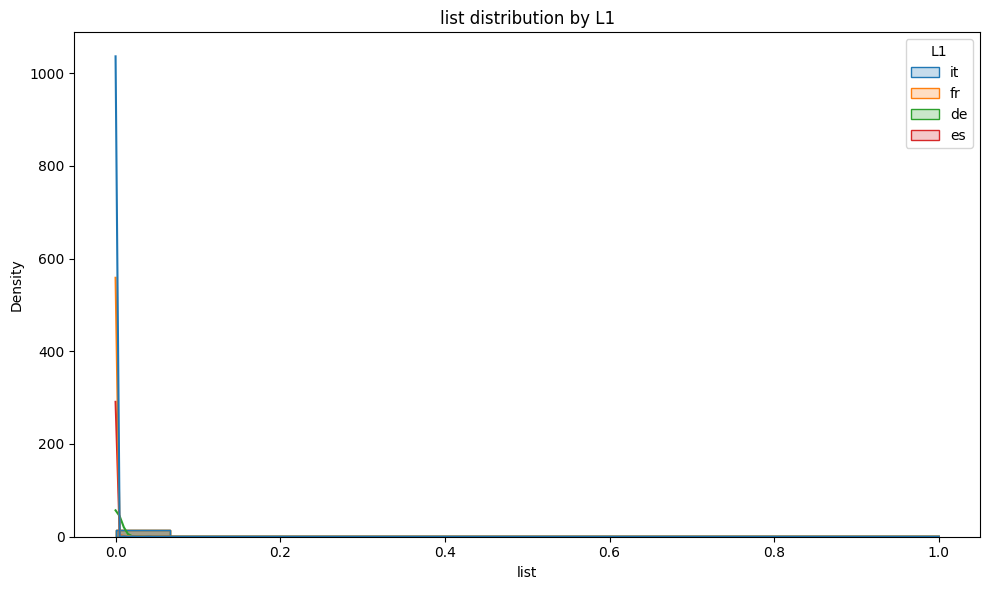

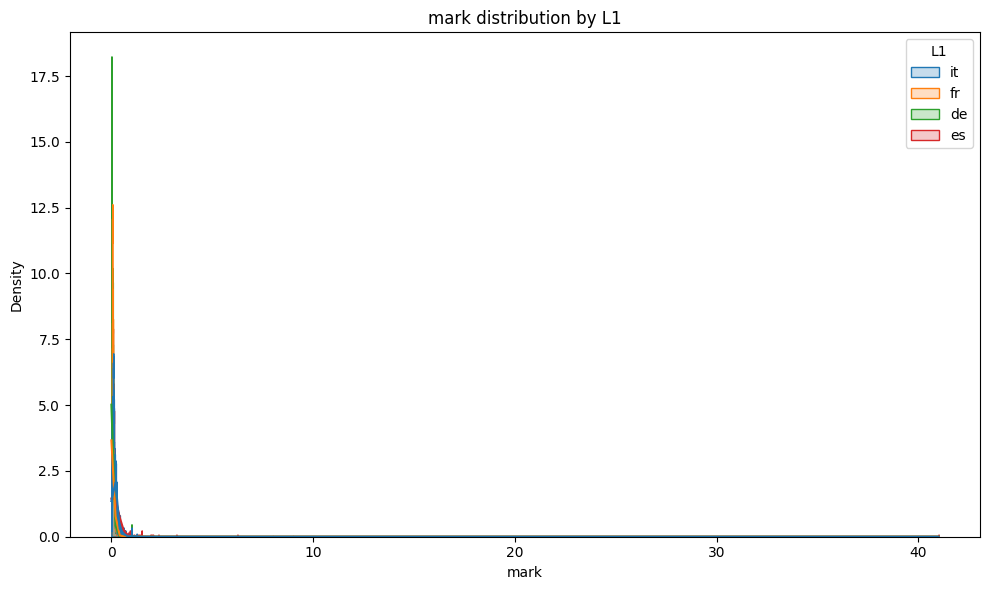

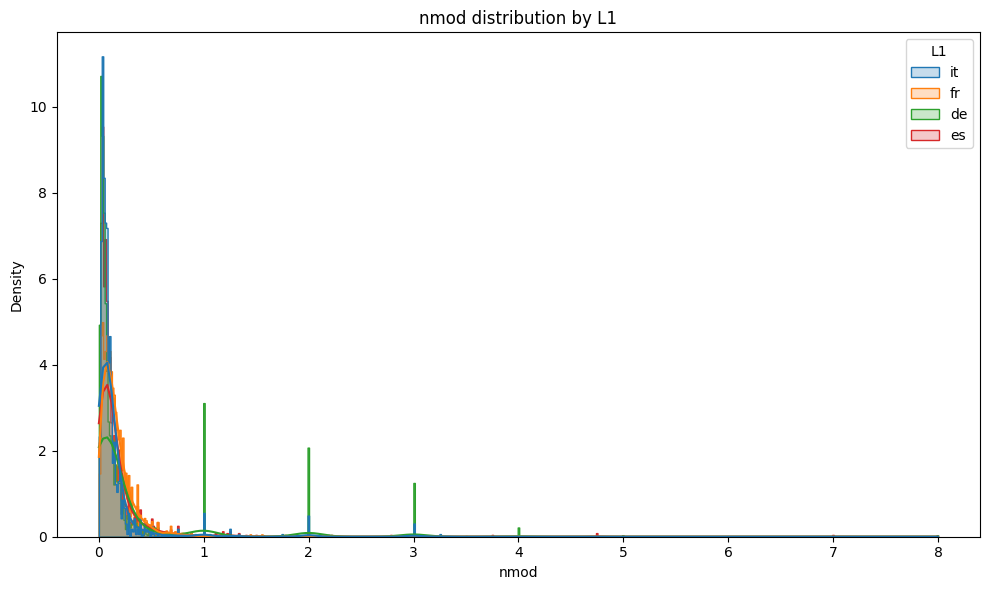

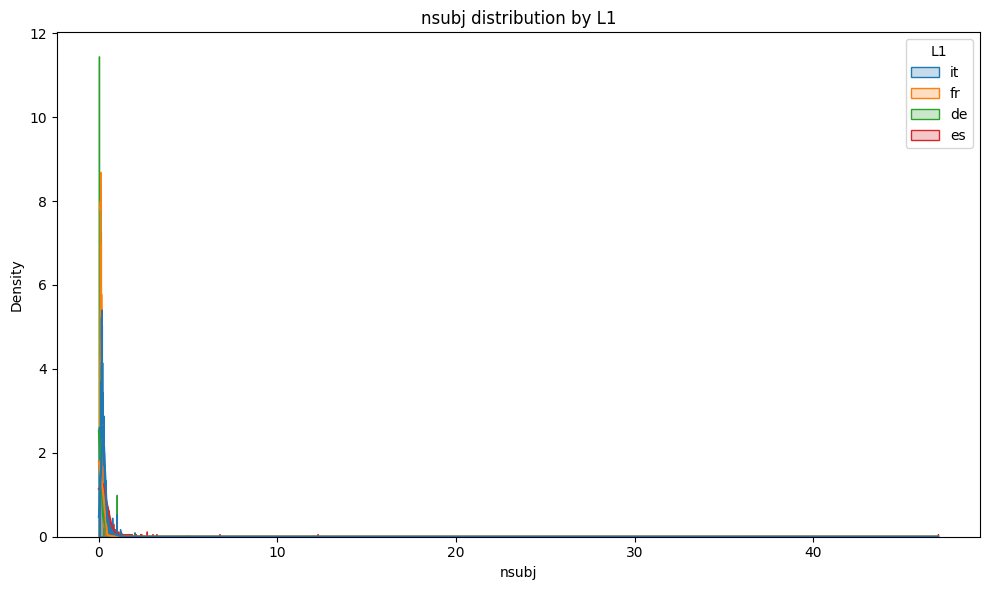

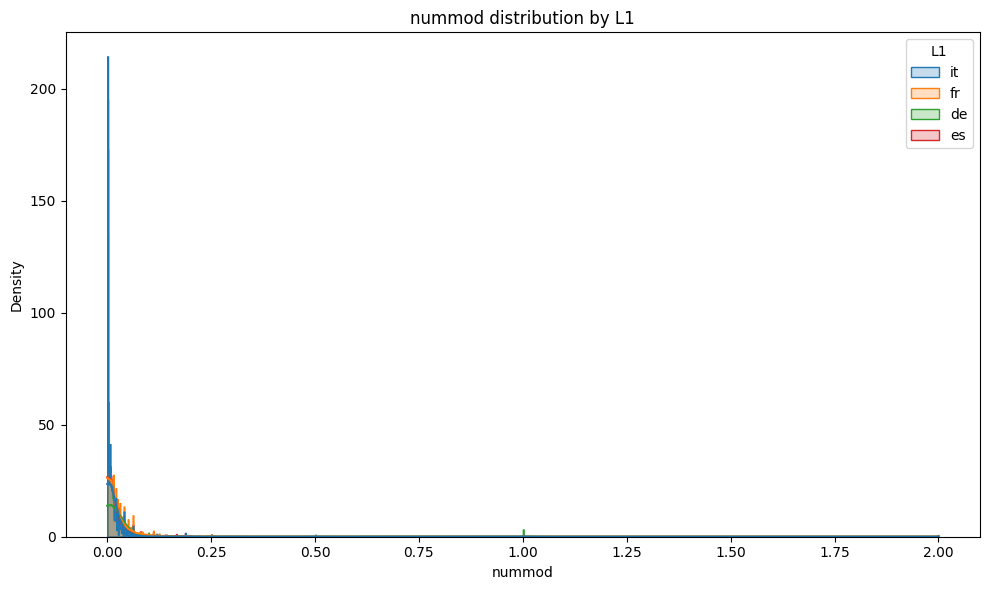

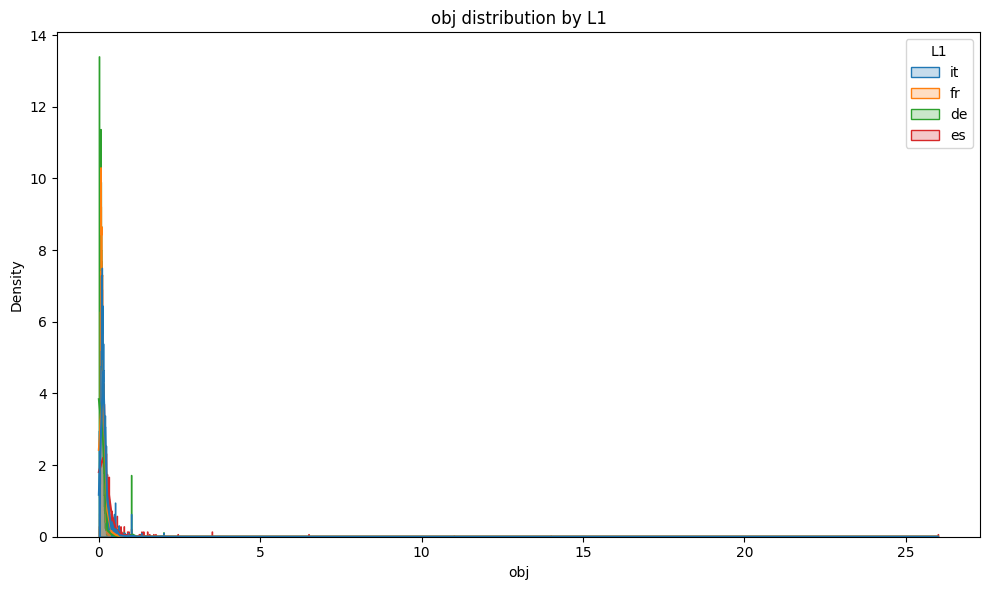

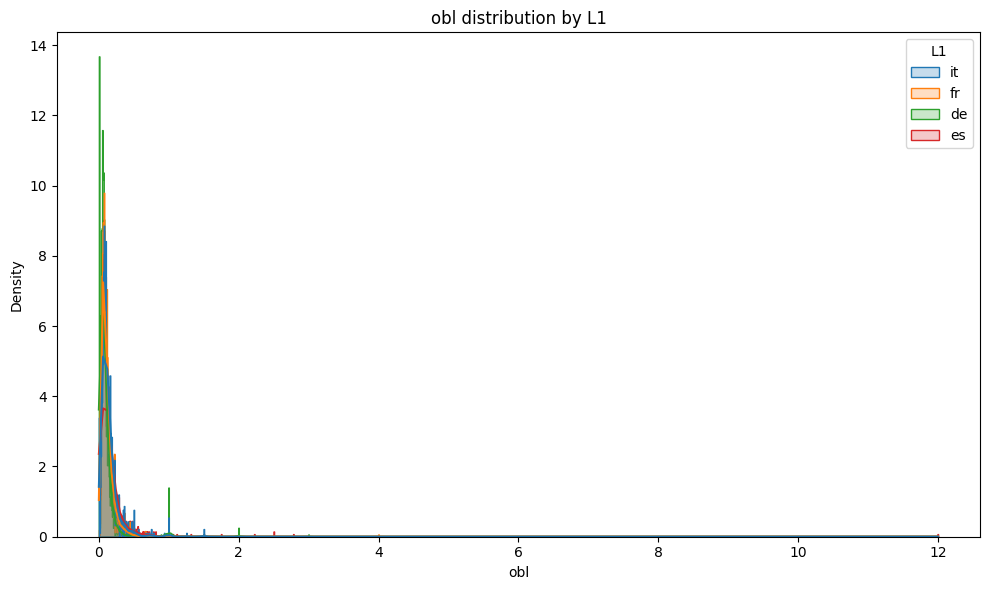

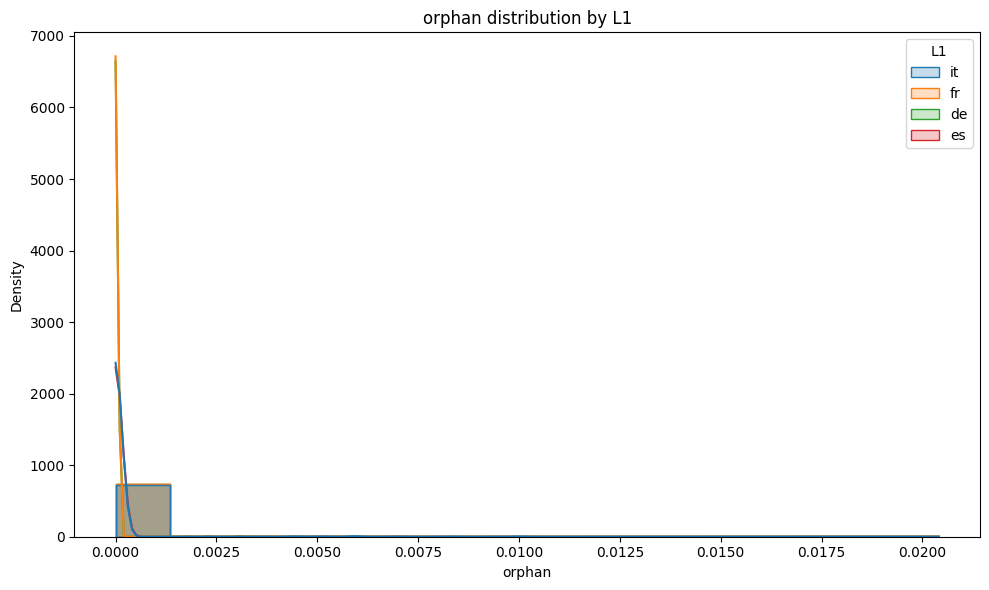

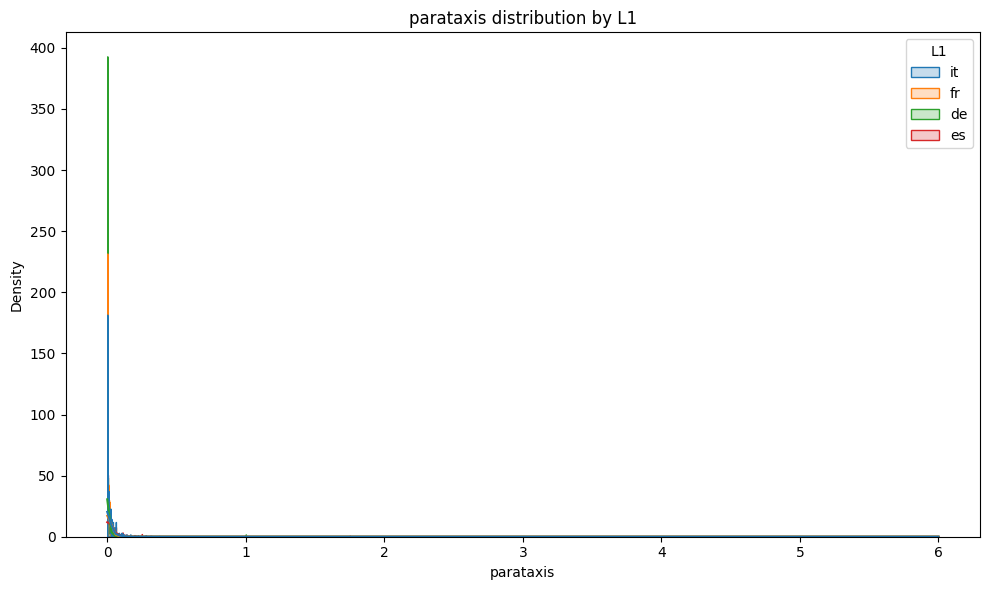

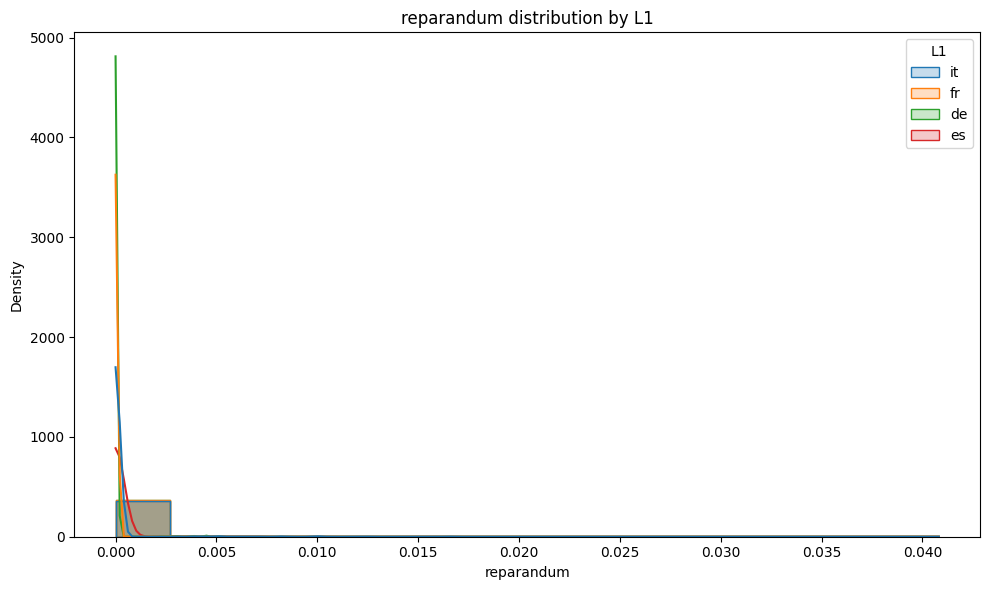

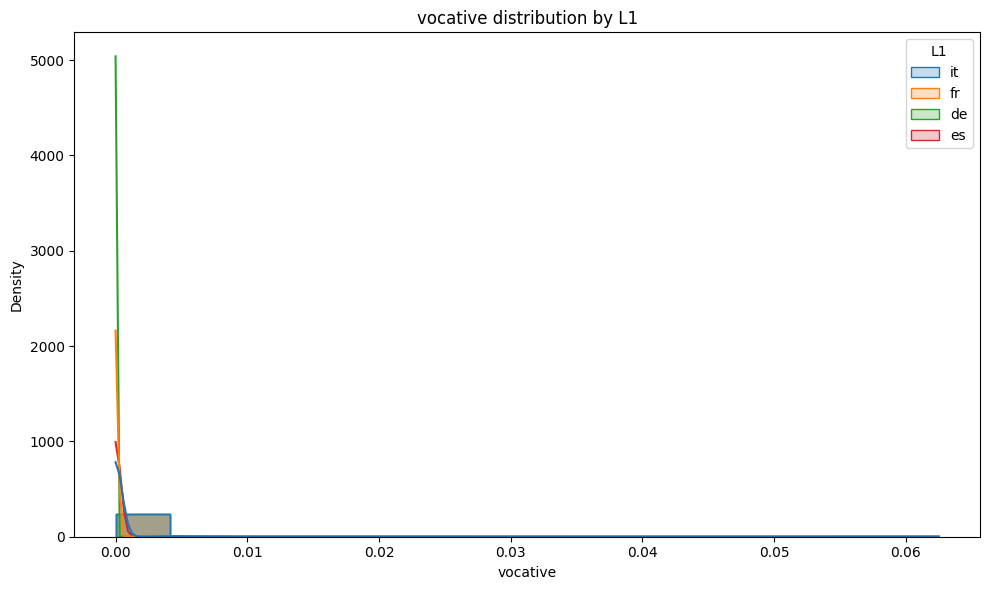

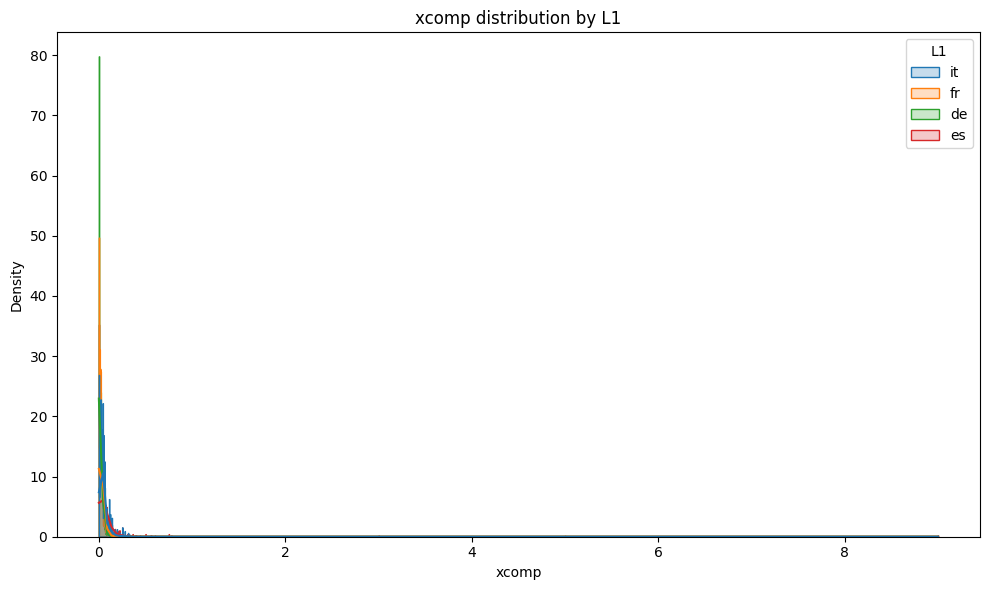

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# numeric columns
num_cols = df.select_dtypes(include='number').columns

# only the languages you want
l1_groups = ["es", "de", "fr", "it"]

for col in num_cols:
    plt.figure(figsize=(10, 6))
    try:
      sns.histplot(
          data=df[df["L1"].isin(l1_groups)],
          x=col,
          hue="L1",
          kde=True,
          element="step",
          stat="density",
          common_norm=False,
          label = l1_groups
      )
    except:
      sns.histplot(
          data=df[df["L1"].isin(l1_groups)],
          x=col,
          hue="L1",
          element="step",
          stat="density",
          common_norm=False,
          label = l1_groups
      )

    plt.title(f"{col} distribution by L1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()


In [62]:
#do standardsclar
# do PCA

#PCA

##PCA by L2 vs TR

<Axes: xlabel='n components=10', ylabel='cumulative variance'>

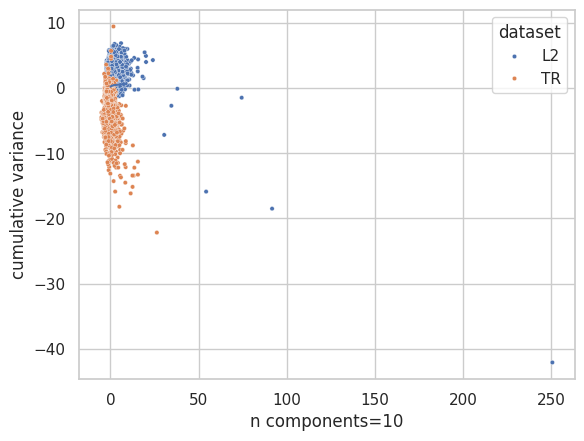

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = StandardScaler().fit_transform(df[num_cols])
pca = PCA(n_components=10).fit(X)
plt.plot(pca.explained_variance_ratio_.cumsum()); plt.xlabel('n components=10'); plt.ylabel('cumulative variance')
pc2 = PCA(n_components=2).fit_transform(X)
sns.scatterplot(x=pc2[:,0], y=pc2[:,1], hue=df['dataset'], s=10)


##PCA by L1

<Axes: xlabel='n components=10', ylabel='cumulative variance'>

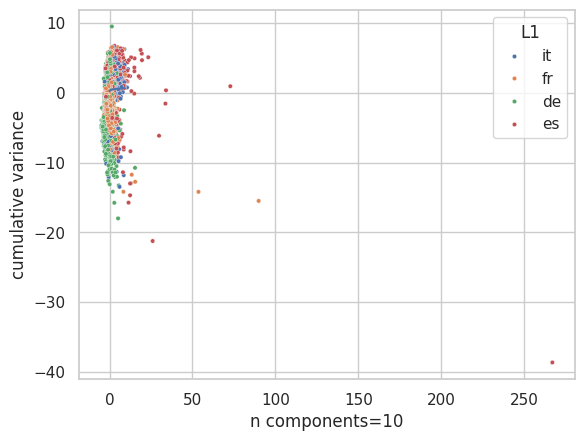

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = StandardScaler().fit_transform(df[num_cols])
pca = PCA(n_components=10).fit(X)
plt.plot(pca.explained_variance_ratio_.cumsum()); plt.xlabel('n components=10'); plt.ylabel('cumulative variance')
pc2 = PCA(n_components=2).fit_transform(X)
sns.scatterplot(x=pc2[:,0], y=pc2[:,1], hue=df['L1'], s=10)


#t-SNE / UMAP (Uniform Manifold Approximation and Projection), a non-linear dimensionality reduction technique.
reveal fine-grained clusters not visible with PCA.

<Axes: >

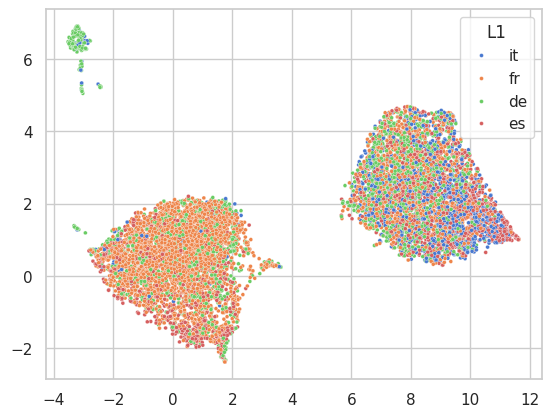

In [99]:
#t-SNE / UMAP for non-linear embedding
#Goal: reveal fine-grained clusters not visible with PCA.
import umap
embed = umap.UMAP(n_neighbors=15, min_dist=0.1).fit_transform(X)
sns.scatterplot(x=embed[:,0], y=embed[:,1], hue=df['L1'],  palette='muted',s=8)


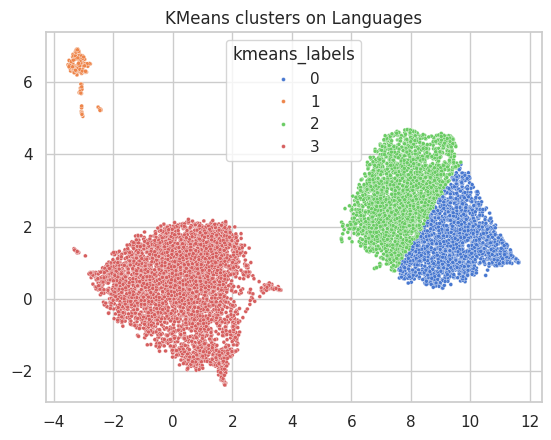

In [100]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# embed is your UMAP output (n_samples, 4)
kmeans = KMeans(n_clusters=4, random_state=42)  # k=2
labels = kmeans.fit_predict(embed)  # perform clustering

# Add KMeans labels to your dataframe (optional)
df['kmeans_labels'] = labels

# Visualize clusters on the UMAP embedding
sns.scatterplot(x=embed[:,0], y=embed[:,1], hue=df['kmeans_labels'], palette='muted', s=8)
plt.title("KMeans clusters on Languages")
plt.show()


<Axes: >

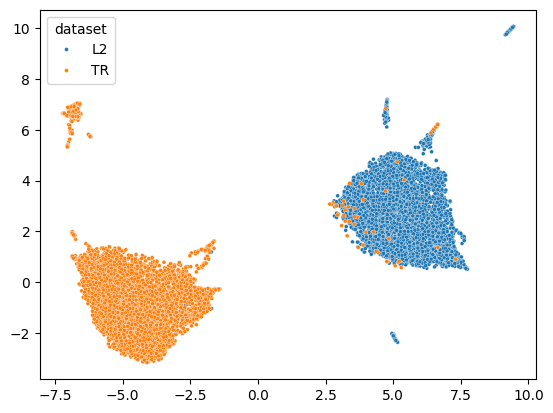

In [66]:
#t-SNE / UMAP for non-linear embedding
#Goal: reveal fine-grained clusters not visible with PCA.
import umap
embed = umap.UMAP(n_neighbors=15, min_dist=0.1).fit_transform(X)
sns.scatterplot(x=embed[:,0], y=embed[:,1], hue=df['dataset'], s=8)


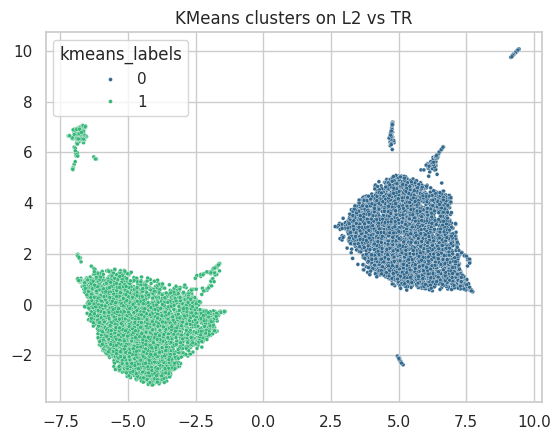

In [94]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# embed is your UMAP output (n_samples, 2)
kmeans = KMeans(n_clusters=2, random_state=42)  # k=2
labels = kmeans.fit_predict(embed)  # perform clustering

# Add KMeans labels to your dataframe (optional)
df['kmeans_labels'] = labels

# Visualize clusters on the UMAP embedding
sns.scatterplot(x=embed[:,0], y=embed[:,1], hue=df['kmeans_labels'], palette='viridis', s=8)
plt.title("KMeans clusters on L2 vs TR")
plt.show()


#Feature importance using a tree-based classifier

Text(0.5, 1.0, 'Top 20 Feature Importances')

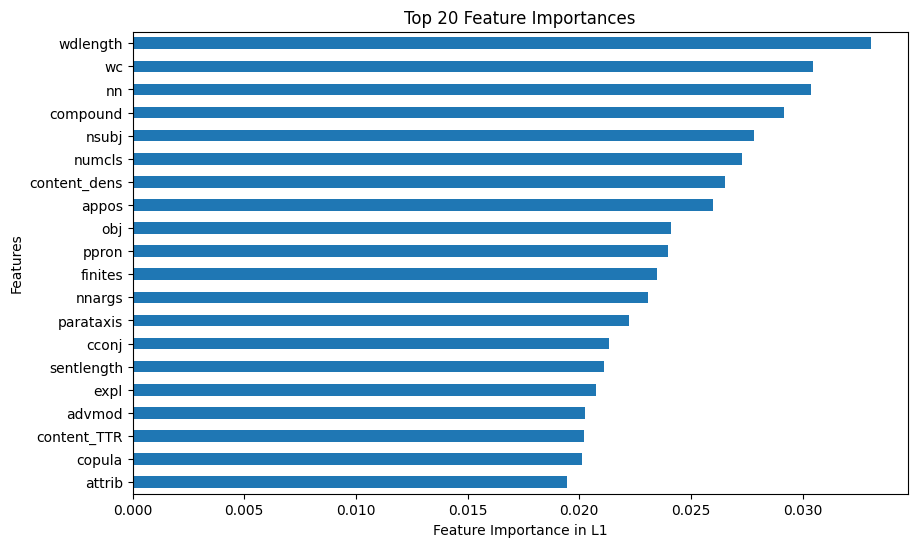

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[num_cols], df['L1'], stratify=df['L1'])
rf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=num_cols).sort_values(ascending=False)
top_features = importances.head(20)[::-1]# reverses the top 20 features for correct horizontal orientation

ax = top_features.plot.barh(figsize=(10,6))
ax.set_xlabel("Feature Importance in L1")   # X-axis label
ax.set_ylabel("Features")             # Y-axis label
ax.set_title("Top 20 Feature Importances")  # Optional: title


In [23]:
df.groupby('L1')['wdlength'].agg(['sum', 'mean', 'median', 'min', 'max', 'std', 'count'])


sum      mean    median       min        max       std  count
L1                                                                        
de  10156.251482  5.012957  4.840981  2.000000  12.151515  0.757433   2026
es   8334.279695  4.859638  4.672664  3.566246   8.668883  0.709663   1715
fr  20992.610268  5.263944  5.357311  3.563420   8.956329  0.628667   3988
it   5314.361044  4.507516  4.438222  3.664585  11.300000  0.488762   1179

Text(0.5, 1.0, 'Top 20 Feature Importances')

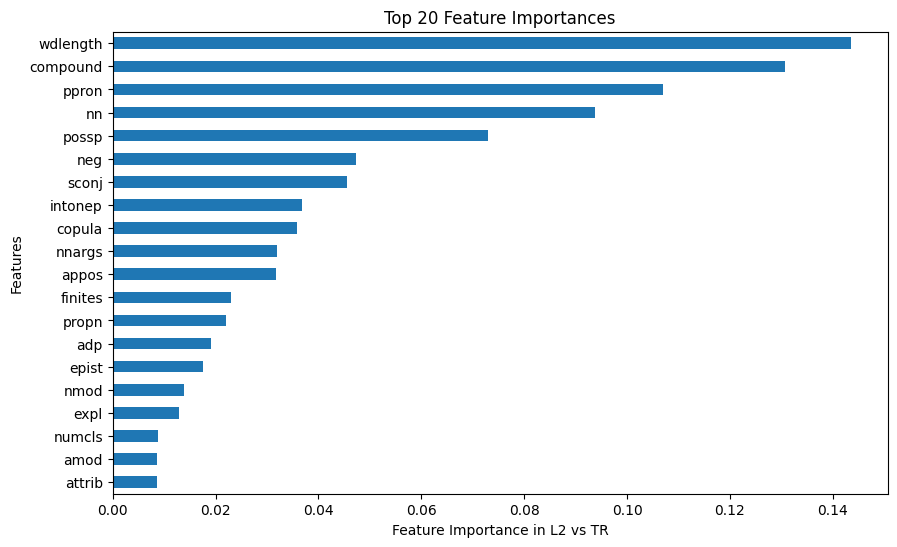

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[num_cols], df['dataset'], stratify=df['dataset'])
rf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=num_cols).sort_values(ascending=False)
top_features = importances.head(20)[::-1]# reverses the top 20 features for correct horizontal orientation

ax = top_features.plot.barh(figsize=(10,6))
ax.set_xlabel("Feature Importance in L2 vs TR")   # X-axis label
ax.set_ylabel("Features")             # Y-axis label
ax.set_title("Top 20 Feature Importances")  # Optional: title


In [25]:
df.groupby('dataset')['wdlength'].agg(['sum', 'mean', 'median', 'min', 'max', 'std', 'count'])


sum      mean    median       min        max       std  \
dataset                                                                    
L2       19643.903094  4.464523  4.453180  3.342851   6.175864  0.302289   
TR       25153.599395  5.579769  5.529053  2.000000  12.151515  0.537302   

         count  
dataset         
L2        4400  
TR        4508

#Outlier Detection


In [26]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01).fit(X)
df['anomaly'] = iso.predict(X)  # -1 is anomaly
df[df['anomaly']==-1]


/tmp/ipython-input-4001690911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly'] = iso.predict(X)  # -1 is anomaly


dataset  L1     wc  sents  sentlength  wdlength  interrog        nn  \
43        L2  es  341.0    6.0   56.833333  4.510994       0.0  0.143695   
67        L2  it  314.0    7.0   44.857143  4.249472       0.0  0.127389   
97        L2  es  372.0    4.0   93.000000  4.262888       0.0  0.177419   
201       L2  es  324.0    5.0   64.800000  4.033799       0.0  0.188272   
230       L2  es  250.0    4.0   62.500000  4.125154       0.0  0.168000   
...      ...  ..    ...    ...         ...       ...       ...       ...   
8494      TR  es  144.0    2.0   72.000000  5.718202       0.0  0.361111   
8509      TR  es  117.0    2.0   58.500000  5.794904       0.0  0.299145   
8642      TR  es  124.0    2.0   62.000000  5.314857       0.0  0.298387   
8713      TR  es  114.0    2.0   57.000000  5.095881       0.0  0.210526   
8728      TR  fr  136.0    2.0   68.000000  5.691090       0.0  0.191176   

           mhd       mdd  ...     nsubj    nummod       obj       obl  orphan  \
43    4.941294  1.827638  ...  0.944444  0.027778  0.777778  0.277778     0.0   
67    4.282375  2.154248  ...  0.673469  0.000000  0.469388  0.183673     0.0   
97    5.315398  2.352828  ...  2.312500  0.187500  1.375000  1.312500     0.0   
201   3.788417  1.805256  ...  0.960000  0.000000  0.920000  0.600000     0.0   
230   4.451870  2.414017  ...  1.687500  0.000000  1.375000  0.625000     0.0   
...        ...       ...  ...       ...       ...       ...       ...     ...   
8494  4.868838  2.772007  ...  1.000000  0.000000  1.750000  1.000000     0.0   
8509  4.569444  2.161111  ...  1.000000  0.250000  1.000000  0.500000     0.0   
8642  3.805195  2.885281  ...  0.750000  0.000000  1.000000  2.000000     0.0   
8713  5.094684  1.711148  ...  1.000000  0.000000  1.500000  1.250000     0.0   
8728  5.096644  2.210069  ...  1.000000  0.000000  1.750000  1.250000     0.0   

      parataxis  reparandum  vocative     xcomp  anomaly  
43     0.166667    0.027778       0.0  0.361111       -1  
67     0.020408    0.000000       0.0  0.102041       -1  
97     0.437500    0.000000       0.0  0.750000       -1  
201    0.280000    0.040000       0.0  0.400000       -1  
230    0.187500    0.000000       0.0  0.125000       -1  
...         ...         ...       ...       ...      ...  
8494   0.000000    0.000000       0.0  0.250000       -1  
8509   0.000000    0.000000       0.0  0.000000       -1  
8642   0.000000    0.000000       0.0  0.250000       -1  
8713   0.000000    0.000000       0.0  0.500000       -1  
8728   0.000000    0.000000       0.0  0.500000       -1  

[90 rows x 65 columns]

In [27]:
num=num_cols

In [28]:
#Multicollinearity check: VIF (variance inflation factor)
#Goal: quantify redundancy for regression models.
#Insight: drop or combine high-VIF features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[num].fillna(0)
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
vif.sort_values(ascending=False).head(20)


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


content_TTR     507.364577
content_dens    460.040059
sentlength      243.401997
mhd             228.539791
wdlength        174.456163
case            138.332614
nn              135.415130
mark            107.497308
wc               91.923813
mdd              83.495120
sents            79.948211
nmod             75.159187
nsubj            68.798979
numcls           50.439601
advcl            45.459386
adp              44.769564
ccomp            43.275587
nnargs           41.658794
propn            39.036345
finites          37.920651
dtype: float64

<Axes: >

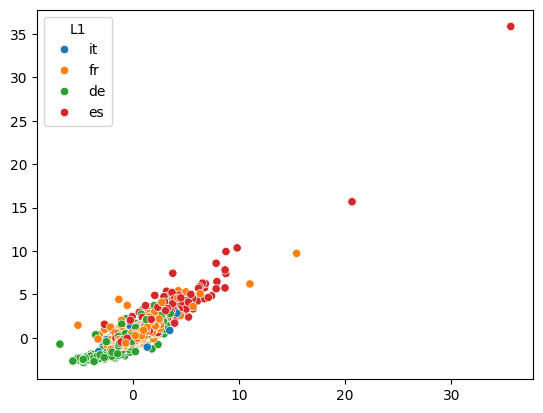

In [29]:
from sklearn.cross_decomposition import CCA
X1 = df[['mhd','mdd','numcls']]; X2 = df[['content_dens','wc','sentlength']]
cca = CCA(n_components=2).fit(X1, X2)
X1_c, X2_c = cca.transform(X1, X2)
sns.scatterplot(x=X1_c[:,0], y=X2_c[:,0], hue=df['L1'])


#Finding Optimal K


Text(0, 0.5, 'inertia')

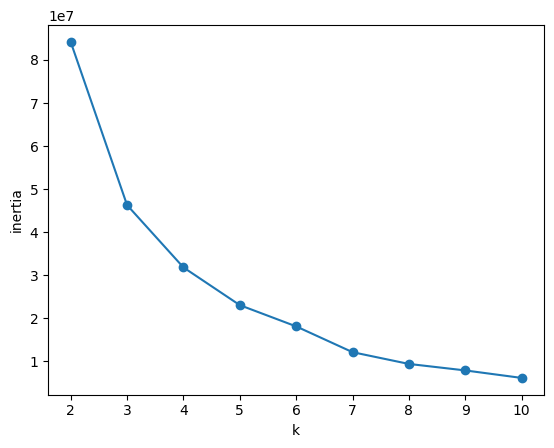

In [30]:
from sklearn.cluster import KMeans
inertia=[]
for k in range(2,11):
    inertia.append(KMeans(k, random_state=0).fit(X).inertia_)
plt.plot(range(2,11), inertia, '-o'); plt.xlabel('k'); plt.ylabel('inertia')


#K-means

In [103]:
X


array([[ 0.48327394,  0.45365436, -0.14385668, ..., -0.0842484 ,
        -0.18766887, -0.01059581],
       [ 0.06579093,  0.61816963, -0.66868712, ..., -0.09414984,
         0.09580835, -0.01059581],
       [ 0.54186805,  0.94720016, -0.52204363, ..., -0.170961  ,
        -0.07824309, -0.01059581],
       ...,
       [-0.46155604, -1.52052885,  4.38898916, ...,  0.38399961,
        -0.24725063, -0.01059581],
       [ 0.49059821,  0.12462382,  0.24779839, ..., -0.11433237,
        -0.2083401 , -0.01059581],
       [-2.36586453, -2.01407465, -2.39318742, ..., -0.170961  ,
        -0.24725063, -0.01059581]])

In [118]:
df

dataset  L1     wc  sents  sentlength  wdlength  interrog        nn  \
1         L2  it  393.0   16.0   24.562500  4.035603    0.3125  0.162850   
2         L2  fr  336.0   17.0   19.764706  4.416341    0.0000  0.175595   
3         L2  de  401.0   19.0   21.105263  4.737888    0.0000  0.182045   
4         L2  fr  317.0   12.0   26.416667  4.490074    0.0000  0.164038   
5         L2  fr  320.0   14.0   22.857143  4.517672    0.0000  0.228125   
...      ...  ..    ...    ...         ...       ...       ...       ...   
8904      TR  fr  229.0   11.0   20.818182  5.680689    0.0000  0.257642   
8905      TR  fr  272.0    8.0   34.000000  5.077423    0.0000  0.290441   
8906      TR  fr  264.0    4.0   66.000000  6.696915    0.0000  0.250000   
8907      TR  fr  394.0   14.0   28.142857  5.735727    0.0000  0.281726   
8908      TR  de    4.0    1.0    4.000000  6.250000    0.0000  0.500000   

           mhd       mdd  ...      nmod     nsubj    nummod       obj  \
1     3.130691  1.732166  ...  0.027344  0.089844  0.000000  0.042969   
2     3.672004  1.370112  ...  0.038062  0.076125  0.013841  0.086505   
3     3.530065  1.455148  ...  0.024931  0.108033  0.002770  0.060942   
4     3.913062  1.271200  ...  0.104167  0.159722  0.020833  0.125000   
5     3.608477  1.318029  ...  0.056122  0.132653  0.005102  0.096939   
...        ...       ...  ...       ...       ...       ...       ...   
8904  3.586701  1.368093  ...  0.115702  0.090909  0.016529  0.157025   
8905  4.134271  1.731578  ...  0.328125  0.218750  0.062500  0.171875   
8906  3.484211  0.957173  ...  0.900000  0.350000  0.200000  0.350000   
8907  3.673058  1.792418  ...  0.112245  0.051020  0.000000  0.066327   
8908  2.000000  1.000000  ...  0.000000  0.000000  0.000000  0.000000   

           obl  orphan  parataxis  reparandum  vocative     xcomp  
1     0.097656     0.0   0.007812    0.003906       0.0  0.007812  
2     0.048443     0.0   0.006920    0.000000       0.0  0.044983  
3     0.038781     0.0   0.000000    0.000000       0.0  0.022161  
4     0.138889     0.0   0.013889    0.000000       0.0  0.097222  
5     0.086735     0.0   0.000000    0.000000       0.0  0.030612  
...        ...     ...        ...         ...       ...       ...  
8904  0.074380     0.0   0.008264    0.000000       0.0  0.008264  
8905  0.234375     0.0   0.015625    0.000000       0.0  0.031250  
8906  0.400000     0.0   0.050000    0.000000       0.0  0.000000  
8907  0.112245     0.0   0.005102    0.000000       0.0  0.005102  
8908  0.000000     0.0   0.000000    0.000000       0.0  0.000000  

[8908 rows x 64 columns]

In [140]:
df[num_cols]

wc  sents  sentlength  wdlength  interrog        nn       mhd  \
1     393.0   16.0   24.562500  4.035603    0.3125  0.162850  3.130691   
2     336.0   17.0   19.764706  4.416341    0.0000  0.175595  3.672004   
3     401.0   19.0   21.105263  4.737888    0.0000  0.182045  3.530065   
4     317.0   12.0   26.416667  4.490074    0.0000  0.164038  3.913062   
5     320.0   14.0   22.857143  4.517672    0.0000  0.228125  3.608477   
...     ...    ...         ...       ...       ...       ...       ...   
8904  229.0   11.0   20.818182  5.680689    0.0000  0.257642  3.586701   
8905  272.0    8.0   34.000000  5.077423    0.0000  0.290441  4.134271   
8906  264.0    4.0   66.000000  6.696915    0.0000  0.250000  3.484211   
8907  394.0   14.0   28.142857  5.735727    0.0000  0.281726  3.673058   
8908    4.0    1.0    4.000000  6.250000    0.0000  0.500000  2.000000   

           mdd  content_dens  content_TTR  ...      nmod     nsubj    nummod  \
1     1.732166      0.404580     0.963636  ...  0.027344  0.089844  0.000000   
2     1.370112      0.461310     0.974843  ...  0.038062  0.076125  0.013841   
3     1.455148      0.481297     0.965000  ...  0.024931  0.108033  0.002770   
4     1.271200      0.419558     0.917241  ...  0.104167  0.159722  0.020833   
5     1.318029      0.487500     0.928571  ...  0.056122  0.132653  0.005102   
...        ...           ...          ...  ...       ...       ...       ...   
8904  1.368093      0.524017     0.975610  ...  0.115702  0.090909  0.016529   
8905  1.731578      0.463235     0.947368  ...  0.328125  0.218750  0.062500   
8906  0.957173      0.340909     0.891089  ...  0.900000  0.350000  0.200000   
8907  1.792418      0.474619     0.954082  ...  0.112245  0.051020  0.000000   
8908  1.000000      1.000000     1.000000  ...  0.000000  0.000000  0.000000   

           obj       obl  orphan  parataxis  reparandum  vocative     xcomp  
1     0.042969  0.097656     0.0   0.007812    0.003906       0.0  0.007812  
2     0.086505  0.048443     0.0   0.006920    0.000000       0.0  0.044983  
3     0.060942  0.038781     0.0   0.000000    0.000000       0.0  0.022161  
4     0.125000  0.138889     0.0   0.013889    0.000000       0.0  0.097222  
5     0.096939  0.086735     0.0   0.000000    0.000000       0.0  0.030612  
...        ...       ...     ...        ...         ...       ...       ...  
8904  0.157025  0.074380     0.0   0.008264    0.000000       0.0  0.008264  
8905  0.171875  0.234375     0.0   0.015625    0.000000       0.0  0.031250  
8906  0.350000  0.400000     0.0   0.050000    0.000000       0.0  0.000000  
8907  0.066327  0.112245     0.0   0.005102    0.000000       0.0  0.005102  
8908  0.000000  0.000000     0.0   0.000000    0.000000       0.0  0.000000  

[8908 rows x 62 columns]

#K-means for 2 classes (L2 vs TR)

In [144]:
numerical_cols = df.select_dtypes(include='number')
X = numerical_cols.values

# Apply KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# View cluster assignments
print(df)


     dataset  L1     wc  sents  sentlength  wdlength  interrog        nn  \
1         L2  it  393.0   16.0   24.562500  4.035603    0.3125  0.162850   
2         L2  fr  336.0   17.0   19.764706  4.416341    0.0000  0.175595   
3         L2  de  401.0   19.0   21.105263  4.737888    0.0000  0.182045   
4         L2  fr  317.0   12.0   26.416667  4.490074    0.0000  0.164038   
5         L2  fr  320.0   14.0   22.857143  4.517672    0.0000  0.228125   
...      ...  ..    ...    ...         ...       ...       ...       ...   
8904      TR  fr  229.0   11.0   20.818182  5.680689    0.0000  0.257642   
8905      TR  fr  272.0    8.0   34.000000  5.077423    0.0000  0.290441   
8906      TR  fr  264.0    4.0   66.000000  6.696915    0.0000  0.250000   
8907      TR  fr  394.0   14.0   28.142857  5.735727    0.0000  0.281726   
8908      TR  de    4.0    1.0    4.000000  6.250000    0.0000  0.500000   

           mhd       mdd  ...     nsubj    nummod       obj       obl  orphan  \
1     

Clustering Accuracy: 0.7158733722496632
Cluster    L2    TR
True               
L2       2849  1551
TR        980  3528


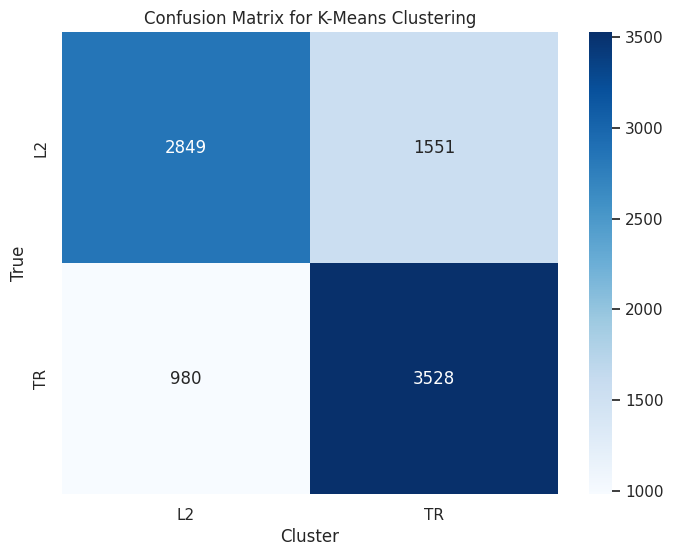

In [150]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# True labels (categorical strings)
y_true = df['dataset'].values
# Predicted clusters (0 or 1)
y_pred = df['cluster'].values

# Map clusters to the majority true label in that cluster
labels = np.empty_like(y_pred, dtype=object)
for cluster in np.unique(y_pred):
    mask = (y_pred == cluster)
    # Find the most common label in this cluster using np.unique
    unique_labels, counts = np.unique(y_true[mask], return_counts=True)
    majority_label = unique_labels[np.argmax(counts)]
    labels[mask] = majority_label

# Compute accuracy
accuracy = accuracy_score(y_true, labels)
print("Clustering Accuracy:", accuracy)

# Optional: confusion matrix
confusion_matrix = pd.crosstab(y_true, labels, rownames=['True'], colnames=['Cluster'])
print(confusion_matrix)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-Means Clustering: K=2')
plt.show()


#K-means for 4 classes (Languages)

In [157]:
numerical_cols = df.select_dtypes(include='number')
X = numerical_cols.values

# Apply KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# View cluster assignments
print(df)


     dataset  L1     wc  sents  sentlength  wdlength  interrog        nn  \
1         L2  it  393.0   16.0   24.562500  4.035603    0.3125  0.162850   
2         L2  fr  336.0   17.0   19.764706  4.416341    0.0000  0.175595   
3         L2  de  401.0   19.0   21.105263  4.737888    0.0000  0.182045   
4         L2  fr  317.0   12.0   26.416667  4.490074    0.0000  0.164038   
5         L2  fr  320.0   14.0   22.857143  4.517672    0.0000  0.228125   
...      ...  ..    ...    ...         ...       ...       ...       ...   
8904      TR  fr  229.0   11.0   20.818182  5.680689    0.0000  0.257642   
8905      TR  fr  272.0    8.0   34.000000  5.077423    0.0000  0.290441   
8906      TR  fr  264.0    4.0   66.000000  6.696915    0.0000  0.250000   
8907      TR  fr  394.0   14.0   28.142857  5.735727    0.0000  0.281726   
8908      TR  de    4.0    1.0    4.000000  6.250000    0.0000  0.500000   

           mhd       mdd  ...     nsubj    nummod       obj       obl  orphan  \
1     

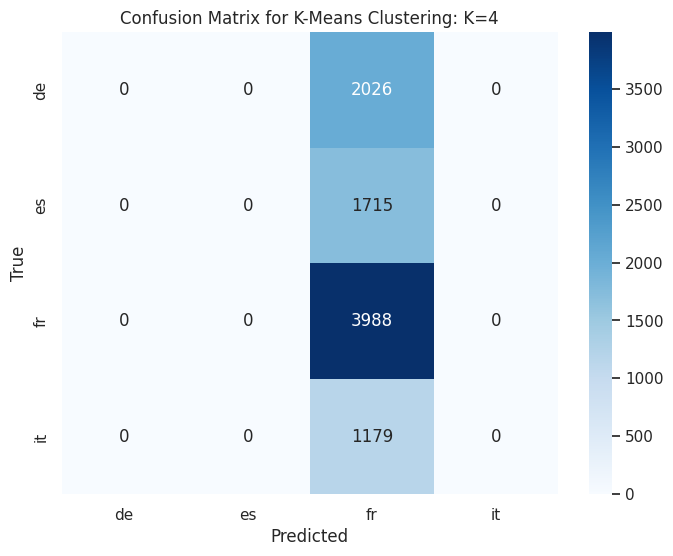


TP and FP per class:
       TP    FP
de     0  2026
es     0  1715
fr  3988     0
it     0  1179

Overall Accuracy: 0.44768747193533903


In [162]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# True labels
y_true = df['L1'].values
# Predicted clusters from k-means
y_pred = df['cluster'].values

# Map clusters to majority true label
cluster_to_label = {}
for cluster in np.unique(y_pred):
    mask = (y_pred == cluster)
    unique_labels, counts = np.unique(y_true[mask], return_counts=True)
    majority_label = unique_labels[np.argmax(counts)]
    cluster_to_label[cluster] = majority_label

# Map predicted clusters to majority label
y_mapped = np.array([cluster_to_label[c] for c in y_pred])

# Get all unique classes
classes = np.unique(y_true)

# Create confusion matrix and ensure all classes appear as columns
conf_matrix = pd.crosstab(y_true, y_mapped, rownames=['True'], colnames=['Predicted'])
conf_matrix = conf_matrix.reindex(index=classes, columns=classes, fill_value=0)

# Compute TP and FP per class
tp_fp_df = pd.DataFrame(columns=['TP', 'FP'])
for cls in classes:
    tp = conf_matrix.loc[cls, cls]          # True positives
    fp = conf_matrix.loc[cls].sum() - tp    # False positives (misclassified)
    tp_fp_df.loc[cls] = [tp, fp]

# Compute overall accuracy
accuracy = accuracy_score(y_true, y_mapped)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-Means Clustering: K=4')
plt.show()

print("\nTP and FP per class:\n", tp_fp_df)
print("\nOverall Accuracy:", accuracy)
